# **Process Mining and Clustering Analysis:</br>Discovering and Evaluating Process Models Using PM4Py and Scikit-Learn**

## Introduction

This project builds upon and extends the methodologies presented in previous research, particularly the studies titled "Analyzing Application Process for a Personal Loan or Overdraft of Dutch Financial Institute with Process Mining Techniques" by Chang Jae Kang et al., and "Process Mining Case Studies" by BPIC 2012 CKM Advisors. The original research applied process mining techniques to analyze and optimize business processes, focusing on identifying inefficiencies, bottlenecks, and compliance issues within real-world settings.

### Changes and Extensions

This project adheres to the foundational methodologies of the original studies but introduces several significant modifications and extensions to broaden the scope of the analysis and adapt it to new contexts:

1. **Diverse Dataset Application**:  
   Unlike the original studies, which focused on event logs from a specific financial institution, this project applies process mining techniques to a different dataset. This variation provides an opportunity to test the robustness and adaptability of process mining methodologies across different domains, uncovering new challenges and insights.

2. **Adoption of Python-Based Tools**:  
   The original research relied on proprietary tools such as DISCO and ProM for process mining. In contrast, this project leverages open-source Python libraries, particularly `pm4py`, to perform similar tasks. This shift demonstrates the viability of accessible, open-source solutions in both academic research and practical applications.

3. **Advanced Analytical Techniques**:  
   Beyond replicating the process discovery methods used in the original studies, this project incorporates advanced conformance checking and performance analysis. These enhancements provide a deeper understanding of process efficiency and effectiveness, offering more granular insights that can inform targeted optimization efforts.

4. **Emphasis on Actionable Outcomes**:  
   Building on the analysis, this project emphasizes the formulation of actionable optimization strategies. These strategies are derived from a combination of process mining insights and domain-specific knowledge, offering practical recommendations for improving business processes.

### Project Phases

The project is structured into two primary phases:

1. **Data Preparation and Initial Exploration**:  
   This phase involves preparing the dataset through preprocessing and exploratory data analysis, ensuring it is clean, consistent, and suitable for process mining tasks.

2. **Process Mining and Advanced Analysis**:  
   In this phase, various process mining techniques are applied to discover, analyze, and refine process models. This includes conformance checking, performance analysis, and the development of optimization strategies based on the insights gained.

The outcome of this project not only replicates key findings from the original studies but also expands on them, offering new insights and practical recommendations for enhancing business processes in diverse contexts.

# **Import Relevant Libraries and Packages**

In [1]:
# Process Mining Imports
import pm4py

# Importing event logs in XES format
from pm4py.objects.log.importer.xes import importer as xes_importer

# Utility functions for handling logs as dataframes
from pm4py.objects.log.util import dataframe_utils

# Converting logs to different formats
from pm4py.objects.conversion.log import converter as log_converter

# Heuristics Miner for discovering process models
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner

# Visualization tools for Heuristics Nets and Petri Nets
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.visualization.petri_net import visualizer as pn_visualizer

# Alpha Miner for discovering process models
from pm4py.algo.discovery.alpha import algorithm as alpha_miner

# Visualization for Process Trees
from pm4py.visualization.process_tree import visualizer as pt_visualizer

# Evaluation tools for generalization and simplicity of process models
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator

# Data Handling and Manipulation
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Regular Expressions
import re

# Tree Structures and Visualization
from anytree import Node, RenderTree, LevelOrderGroupIter
from anytree.exporter import DotExporter

# Display and Graph Visualization
from IPython.display import display, Image
import graphviz
from graphviz import render, Digraph

# Machine Learning - Clustering, Preprocessing, and Evaluation
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score

# **Load and Understand the Dataset**

In [2]:
# Import the event log from a XES file
# "BPI_Challenge_2012.xes" is the event log file containing process data
log = xes_importer.apply("BPI_Challenge_2012.xes")

/Users/shahriyar/miniconda3/envs/tensorflow/lib/python3.10/site-packages/pm4py/util/dt_parsing/parser.py:77: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(


parsing log, completed traces ::   0%|          | 0/13087 [00:00<?, ?it/s]

In [3]:
# Check the type of the 'log' object to understand its structure
type(log)

pm4py.objects.log.obj.EventLog

In [4]:
# Display the contents of the 'log' object
# This will show a summary or the full content of the event log depending on the data type and size
log

[{'attributes': {'REG_DATE': datetime.datetime(2011, 10, 1, 0, 38, 44, 546000, tzinfo=datetime.timezone.utc), 'concept:name': '173688', 'AMOUNT_REQ': '20000'}, 'events': [{'org:resource': '112', 'lifecycle:transition': 'COMPLETE', 'concept:name': 'A_SUBMITTED', 'time:timestamp': datetime.datetime(2011, 10, 1, 0, 38, 44, 546000, tzinfo=datetime.timezone.utc)}, '..', {'org:resource': '10629', 'lifecycle:transition': 'COMPLETE', 'concept:name': 'W_Valideren aanvraag', 'time:timestamp': datetime.datetime(2011, 10, 13, 10, 37, 37, 26000, tzinfo=datetime.timezone.utc)}]}, '....', {'attributes': {'REG_DATE': datetime.datetime(2012, 2, 29, 23, 51, 16, 799000, tzinfo=datetime.timezone.utc), 'concept:name': '214376', 'AMOUNT_REQ': '15000'}, 'events': [{'org:resource': '112', 'lifecycle:transition': 'COMPLETE', 'concept:name': 'A_SUBMITTED', 'time:timestamp': datetime.datetime(2012, 2, 29, 23, 51, 16, 799000, tzinfo=datetime.timezone.utc)}, '..', {'org:resource': '11169', 'lifecycle:transition': 

In [5]:
# Convert the event log to a pandas DataFrame
# This allows for easier manipulation and analysis using pandas' data analysis tools
df = log_converter.apply(log, variant=log_converter.Variants.TO_DATA_FRAME)

In [6]:
# Print the shape of the DataFrame to understand its dimensions
# This shows the number of rows (events) and columns (attributes) in the DataFrame
print("The shape of the dataframe is:", df.shape)

# Display the first 5 rows of the DataFrame
# This provides a preview of the data, showing the top 5 events and their corresponding attributes
df.head(5)

The shape of the dataframe is: (262200, 7)


org:resource lifecycle:transition            concept:name  \
0          112             COMPLETE             A_SUBMITTED   
1          112             COMPLETE       A_PARTLYSUBMITTED   
2          112             COMPLETE           A_PREACCEPTED   
3          112             SCHEDULE  W_Completeren aanvraag   
4          NaN                START  W_Completeren aanvraag   

                    time:timestamp                    case:REG_DATE  \
0 2011-10-01 00:38:44.546000+00:00 2011-10-01 00:38:44.546000+00:00   
1 2011-10-01 00:38:44.880000+00:00 2011-10-01 00:38:44.546000+00:00   
2 2011-10-01 00:39:37.906000+00:00 2011-10-01 00:38:44.546000+00:00   
3 2011-10-01 00:39:38.875000+00:00 2011-10-01 00:38:44.546000+00:00   
4 2011-10-01 11:36:46.437000+00:00 2011-10-01 00:38:44.546000+00:00   

  case:concept:name case:AMOUNT_REQ  
0            173688           20000  
1            173688           20000  
2            173688           20000  
3            173688           20000  
4            173688           20000

In [7]:
# Define the desired order of columns in the DataFrame
# These columns represent specific attributes in the event log, reordered for better readability or analysis
desired_order = ["case:concept:name", "concept:name", "lifecycle:transition", 
                 "org:resource", "case:REG_DATE", "time:timestamp", "case:AMOUNT_REQ"]

# Reorder the DataFrame columns according to the desired order
# This rearranges the columns to match the specified order
df = df[desired_order]

# Display the first 5 rows of the reordered DataFrame
# This provides a preview of the data with the columns arranged as specified
df.head(5)

case:concept:name            concept:name lifecycle:transition org:resource  \
0            173688             A_SUBMITTED             COMPLETE          112   
1            173688       A_PARTLYSUBMITTED             COMPLETE          112   
2            173688           A_PREACCEPTED             COMPLETE          112   
3            173688  W_Completeren aanvraag             SCHEDULE          112   
4            173688  W_Completeren aanvraag                START          NaN   

                     case:REG_DATE                   time:timestamp  \
0 2011-10-01 00:38:44.546000+00:00 2011-10-01 00:38:44.546000+00:00   
1 2011-10-01 00:38:44.546000+00:00 2011-10-01 00:38:44.880000+00:00   
2 2011-10-01 00:38:44.546000+00:00 2011-10-01 00:39:37.906000+00:00   
3 2011-10-01 00:38:44.546000+00:00 2011-10-01 00:39:38.875000+00:00   
4 2011-10-01 00:38:44.546000+00:00 2011-10-01 11:36:46.437000+00:00   

  case:AMOUNT_REQ  
0           20000  
1           20000  
2           20000  
3           20000  
4           20000

In [8]:
# Define a dictionary to map old column names to new, more descriptive names
# This improves readability and understanding of the DataFrame's attributes
new_column_names = {
    "case:concept:name": "Case_ID",
    "concept:name": "Activity",
    "lifecycle:transition": "Transition",
    "org:resource": "Resource",
    "case:REG_DATE": "Start_Timestamp",
    "time:timestamp": "Complete_Timestamp",
    "case:AMOUNT_REQ": "Amount_Request"
}

# Rename the DataFrame columns using the defined mapping
# This updates the DataFrame with the new column names for better clarity
df = df.rename(columns=new_column_names)

# Display the first 5 rows of the DataFrame with updated column names
# This provides a preview to ensure that the column renaming was applied correctly
df.head(5)

Case_ID                Activity Transition Resource  \
0  173688             A_SUBMITTED   COMPLETE      112   
1  173688       A_PARTLYSUBMITTED   COMPLETE      112   
2  173688           A_PREACCEPTED   COMPLETE      112   
3  173688  W_Completeren aanvraag   SCHEDULE      112   
4  173688  W_Completeren aanvraag      START      NaN   

                   Start_Timestamp               Complete_Timestamp  \
0 2011-10-01 00:38:44.546000+00:00 2011-10-01 00:38:44.546000+00:00   
1 2011-10-01 00:38:44.546000+00:00 2011-10-01 00:38:44.880000+00:00   
2 2011-10-01 00:38:44.546000+00:00 2011-10-01 00:39:37.906000+00:00   
3 2011-10-01 00:38:44.546000+00:00 2011-10-01 00:39:38.875000+00:00   
4 2011-10-01 00:38:44.546000+00:00 2011-10-01 11:36:46.437000+00:00   

  Amount_Request  
0          20000  
1          20000  
2          20000  
3          20000  
4          20000

In [9]:
# Save the DataFrame to a CSV file
# The file "BPI_Challenge_2012.csv" will contain the data with updated column names and reordered columns
df.to_csv("BPI_Challenge_2012.csv", index=False)

# **Data Preparation and Initial Analysis**

## **Dataset Overview**

### Data Description and Summary

In [10]:
# Define a list of categorical features in the DataFrame
# These features are categorical variables that might require special handling or encoding
categorical_features = ["Case_ID", "Activity", "Transition"]

In [11]:
# Count the occurrences of each unique Case_ID in the DataFrame
# This gives the number of logs associated with each case
case_id_counts = df["Case_ID"].value_counts().sort_values()

# Create a new DataFrame to hold the Case_IDs and their corresponding counts
# This DataFrame will have two columns: Case_ID and Number_of_Logs
result_df = pd.DataFrame({"Case_ID": case_id_counts.index, "Number_of_Logs": case_id_counts.values})

# Display the resulting DataFrame
# This shows the number of logs for each Case_ID, useful for understanding case distribution
result_df

Case_ID  Number_of_Logs
0      194055               3
1      213255               3
2      180989               3
3      181007               3
4      210647               3
...       ...             ...
13082  181799             161
13083  198232             163
13084  183175             167
13085  195247             170
13086  185548             175

[13087 rows x 2 columns]

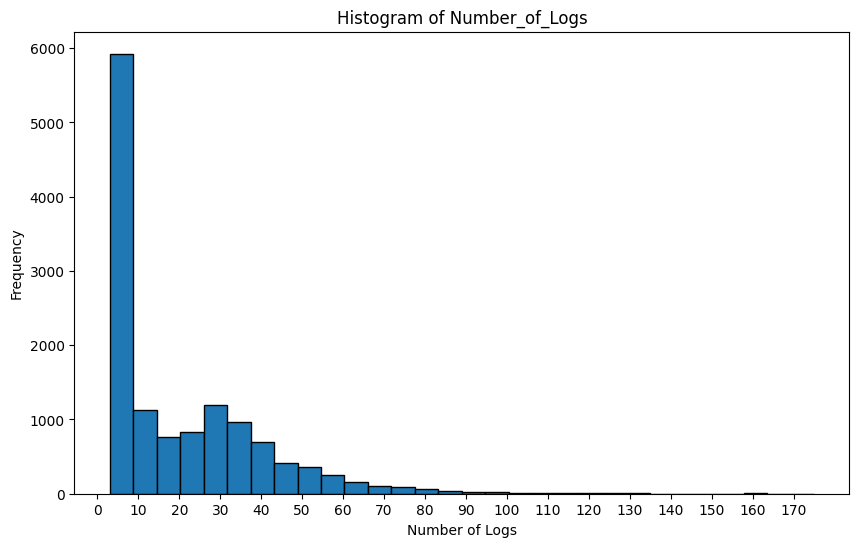

In [12]:
# Set the size of the figure for the histogram
# A size of (10, 6) makes the histogram larger and easier to read
plt.figure(figsize=(10, 6))

# Create a histogram of the "Number_of_Logs" column from result_df
# 30 bins are used to divide the range of "Number_of_Logs" into intervals
# Edgecolor 'black' is used to highlight the boundaries of the bins
plt.hist(result_df["Number_of_Logs"], bins=30, edgecolor='black')

# Set the title of the histogram
plt.title("Histogram of Number_of_Logs")

# Label the x-axis as "Number of Logs"
plt.xlabel("Number of Logs")

# Label the y-axis as "Frequency"
plt.ylabel("Frequency")

# Customize the x-axis ticks to show every 10 units
# This helps in improving readability by avoiding cluttered tick marks
plt.xticks(range(0, max(result_df["Number_of_Logs"])+1, 10))

# Display the histogram
plt.show()

In [13]:
# Initialize an empty DataFrame to store summary statistics for categorical features
# It will contain columns for Feature name, unique values, and their percentages
summary_table = pd.DataFrame(columns=["Feature", "Unique_Values", "Percentage"])

# Loop through each categorical feature (skipping the first one if needed)
for feature in categorical_features[1:]:
    
    # Count the occurrences of each unique value in the current feature
    # Sort by the index to maintain order
    value_counts = (df[feature].value_counts()).sort_index()
    
    # Calculate the percentage of each unique value relative to the total number of rows
    # Round to 3 decimal places for clarity
    percentages = round((value_counts / len(df)) * 100, 3)
    
    # Create a temporary DataFrame with the feature name, unique values, and their percentages
    # Concatenate it with the existing summary_table
    summary_table = pd.concat([summary_table, pd.DataFrame({
        "Feature": [feature] * len(value_counts),
        "Unique_Values": value_counts.index,
        "Percentage": percentages.values
    })], ignore_index=True)

# Remove duplicate feature names by replacing them with an empty string
# This keeps only the first occurrence of each feature name in the summary table
summary_table["Feature"] = summary_table["Feature"].where(~summary_table["Feature"].duplicated(), "")

# Display the summary table with feature statistics
summary_table

Feature                   Unique_Values  Percentage
0     Activity                      A_ACCEPTED       1.950
1                                  A_ACTIVATED       0.857
2                                   A_APPROVED       0.857
3                                  A_CANCELLED       1.071
4                                   A_DECLINED       2.912
5                                  A_FINALIZED       1.913
6                            A_PARTLYSUBMITTED       4.991
7                                A_PREACCEPTED       2.810
8                                 A_REGISTERED       0.857
9                                  A_SUBMITTED       4.991
10                                  O_ACCEPTED       0.855
11                                 O_CANCELLED       1.394
12                                   O_CREATED       2.681
13                                  O_DECLINED       0.306
14                                  O_SELECTED       2.681
15                                      O_SENT       2.681
16                                 O_SENT_BACK       1.317
17                          W_Afhandelen leads       6.318
18                         W_Beoordelen fraude       0.253
19                      W_Completeren aanvraag      20.919
20              W_Nabellen incomplete dossiers       9.607
21                         W_Nabellen offertes      19.838
22                        W_Valideren aanvraag       7.936
23                 W_Wijzigen contractgegevens       0.005
24  Transition                        COMPLETE      62.741
25                                    SCHEDULE      10.037
26                                       START      27.222

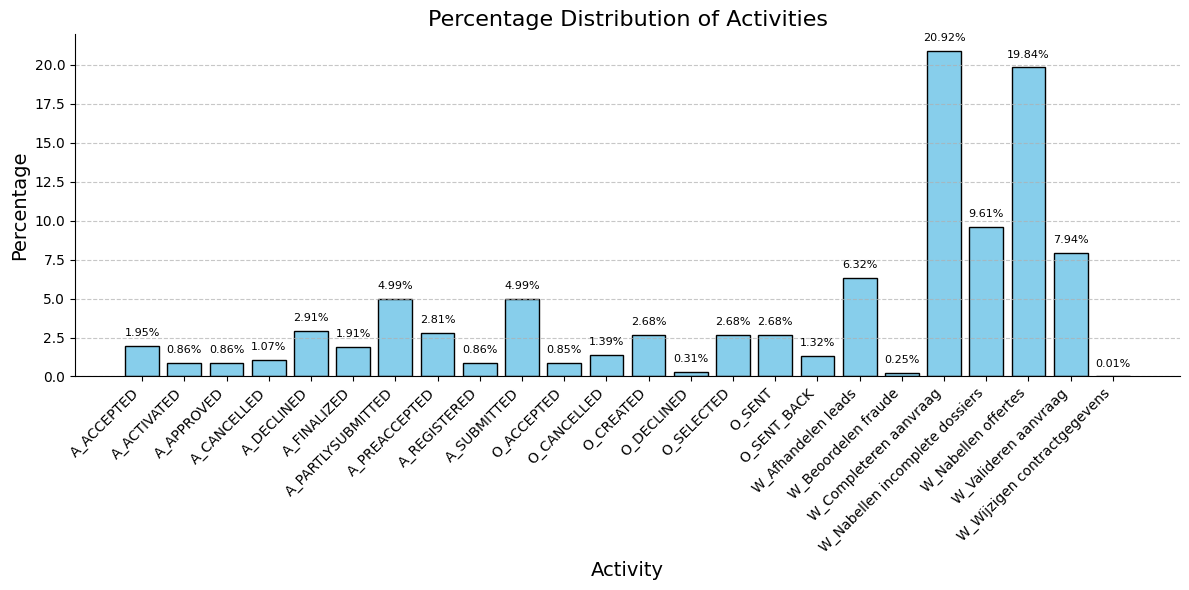

In [14]:
# Extract activity names and their corresponding percentages from the summary table
# Exclude the last three rows which might not be relevant for this plot
activities = summary_table.iloc[:-3, 1]
percentages = summary_table.iloc[:-3, 2]

# Create a figure and axis for the bar plot
# Set the size of the figure to make it larger and easier to read
fig, ax = plt.subplots(figsize=(12, 6))

# Create a bar plot for the percentage distribution of activities
# Use skyblue color for bars and black edge color for clarity
ax.bar(activities, percentages, color="skyblue", edgecolor="black")

# Set labels for the x-axis and y-axis
# Add a title to the plot
ax.set_xlabel("Activity", fontsize=14)
ax.set_ylabel("Percentage", fontsize=14)
ax.set_title("Percentage Distribution of Activities", fontsize=16)

# Customize x-axis ticks to match the number of activities
# Rotate tick labels for better readability and align them to the right
ax.set_xticks(range(len(activities)))
ax.set_xticklabels(activities, rotation=45, ha="right", fontsize=10)

# Add a grid line on the y-axis for better visual reference
# Use dashed lines and reduce opacity for a subtle effect
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Annotate each bar with its percentage value
# Position text slightly above each bar for clarity
for i, v in enumerate(percentages):
    ax.text(i, v + 0.5, f"{v:.2f}%", ha="center", va="bottom", fontsize=8)

# Hide the top and right spines of the plot for a cleaner look
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Adjust layout to ensure everything fits within the figure area
plt.tight_layout()

# Display the plot
plt.show()

In [15]:
# Print the total number of unique cases in the DataFrame
# This is determined by counting the number of distinct Case_IDs
print("Number of the cases are:", len(df["Case_ID"].value_counts()))

print()  # Print a blank line for separation

# Print the minimum value of Case_ID
# This provides the smallest Case_ID in the dataset
print("Minimum Case_ID:", df["Case_ID"].min())

# Print the maximum value of Case_ID
# This provides the largest Case_ID in the dataset
print("Maximum Case_ID:", df["Case_ID"].max())

Number of the cases are: 13087

Minimum Case_ID: 173688
Maximum Case_ID: 214376


In [16]:
# Convert the "Resource" column to numeric values (if possible) and drop any NaN values
# Count the number of unique resources by getting the length of the resulting value counts
print("Number of resources:", len(pd.to_numeric(df["Resource"].dropna()).value_counts()))

print()  # Print a blank line for separation

# Convert the "Resource" column to numeric values (if possible) and drop any NaN values
# Print the minimum value of the resources
# This provides the smallest numeric value among the resources
print("Minimum Resource:", pd.to_numeric(df["Resource"].dropna()).min())

# Convert the "Resource" column to numeric values (if possible) and drop any NaN values
# Print the maximum value of the resources
# This provides the largest numeric value among the resources
print("Maximum Resource:", pd.to_numeric(df["Resource"].dropna()).max())

Number of resources: 68

Minimum Resource: 112
Maximum Resource: 11339


In [17]:
# Convert the "Amount_Request" column to numeric values (if possible) and drop any NaN values
# Print the minimum value of the Amount_Request
# This provides the smallest numeric value among the amount requests
print("Minimum Amount_Request:", pd.to_numeric(df["Amount_Request"].dropna()).min())

# Convert the "Amount_Request" column to numeric values (if possible) and drop any NaN values
# Print the maximum value of the Amount_Request
# This provides the largest numeric value among the amount requests
print("Maximum Amount_Request:", pd.to_numeric(df["Amount_Request"].dropna()).max())

Minimum Amount_Request: 0
Maximum Amount_Request: 99999


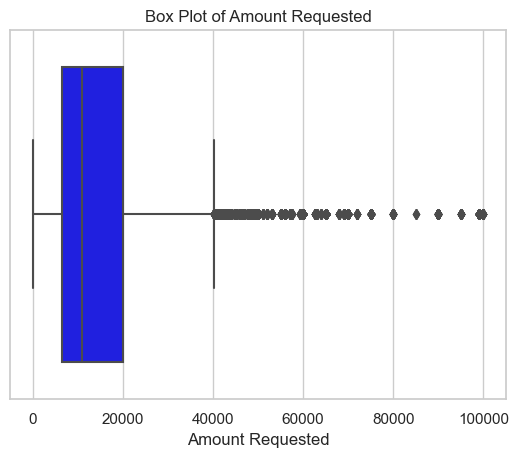

In [18]:
# Set the style of the seaborn plots to "whitegrid" for a cleaner look with gridlines
sns.set(style="whitegrid")

# Create a box plot for the "Amount_Request" column
# Convert to numeric and drop NaN values before plotting
# Set the color of the box plot to blue
sns.boxplot(x=pd.to_numeric(df["Amount_Request"].dropna()), color="blue")

# Label the x-axis as "Amount Requested"
plt.xlabel("Amount Requested")

# Set the title of the plot to "Box Plot of Amount Requested"
plt.title("Box Plot of Amount Requested")

# Display the plot
plt.show()

In [19]:
# Convert the "Amount_Request" column to numeric values and drop any NaN values
# Compute and display descriptive statistics for the Amount_Request data
# This includes count, mean, standard deviation, min, 25th percentile, median (50th percentile), 75th percentile, and max
(pd.to_numeric(df["Amount_Request"].dropna())).describe()

count    262200.000000
mean      15586.795381
std       12381.430915
min           0.000000
25%        6500.000000
50%       11000.000000
75%       20000.000000
max       99999.000000
Name: Amount_Request, dtype: float64

### Preprocessing Steps

In [20]:
# Calculate the percentage of non-missing values for each feature in the DataFrame
# `df.isnull().mean()` computes the proportion of missing values for each column
# Subtract from 100 to get the percentage of non-missing values
# Multiply by 100 to convert to percentage and round to 2 decimal places
non_missing_percentage = 100 - (df.isnull().mean() * 100).round(2)

# Create a DataFrame to store the percentage of non-missing values for each feature
# The DataFrame has two columns: "Feature" and "Non-Missing Percentage"
features_info = pd.DataFrame({
    "Feature": non_missing_percentage.index,
    "Non-Missing Percentage": non_missing_percentage.values
})

# Sort the features_info DataFrame by the "Non-Missing Percentage" column in descending order
# This arranges features from the highest to lowest percentage of non-missing values
features_info = features_info.sort_values(by="Non-Missing Percentage", ascending=False)

# Display the DataFrame with feature information
features_info

Feature  Non-Missing Percentage
0             Case_ID                  100.00
1            Activity                  100.00
2          Transition                  100.00
4     Start_Timestamp                  100.00
5  Complete_Timestamp                  100.00
6      Amount_Request                  100.00
3            Resource                   93.13

In [21]:
# Create a copy of the original DataFrame to avoid modifying the original data
df_filled = df.copy()

# Fill missing values in the "Resource" column based on the mode (most frequent value) for each "Activity"
# Group the DataFrame by "Activity"
# Apply a transformation to the "Resource" column within each group:
# Fill missing values with the mode (most frequent value) of the "Resource" column within that activity group
df_filled["Resource"] = df_filled.groupby("Activity")["Resource"].transform(
    lambda x: x.fillna(x.mode().iloc[0])
)

In [22]:
# Calculate the percentage of non-missing values for each feature in the filled DataFrame
# `df_filled.isnull().mean()` computes the proportion of missing values for each column
# Subtract from 100 to get the percentage of non-missing values
# Multiply by 100 to convert to percentage and round to 2 decimal places
non_missing_percentage = 100 - (df_filled.isnull().mean() * 100).round(2)

# Create a DataFrame to store the percentage of non-missing values for each feature
# The DataFrame has two columns: "Feature" and "Non-Missing Percentage"
features_info = pd.DataFrame({
    "Feature": non_missing_percentage.index,
    "Non-Missing Percentage": non_missing_percentage.values
})

# Sort the features_info DataFrame by the "Non-Missing Percentage" column in descending order
# This arranges features from the highest to lowest percentage of non-missing values
features_info = features_info.sort_values(by="Non-Missing Percentage", ascending=False)

# Display the DataFrame with feature information
features_info

Feature  Non-Missing Percentage
0             Case_ID                   100.0
1            Activity                   100.0
2          Transition                   100.0
3            Resource                   100.0
4     Start_Timestamp                   100.0
5  Complete_Timestamp                   100.0
6      Amount_Request                   100.0

In [23]:
# Define a function to check if the values in a column match a given regex pattern
# Parameters:
# - column: the column of data to check
# - pattern: the regex pattern to match against
# Returns:
# - A list of indices where the values do not match the pattern
def check_pattern(column, pattern):
    non_matching_indices = []  # List to store indices of non-matching values
    for index, value in enumerate(column):
        # Check if the value matches the regex pattern
        if not re.fullmatch(pattern, str(value)):
            non_matching_indices.append(index)  # Store index of non-matching value
    return non_matching_indices

# Define the regex pattern for a complete timestamp
# Format: YYYY-MM-DD HH:MM:SS.ssssss+HH:MM
pattern = r"^\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}.\d{6}\+\d{2}:\d{2}$"

# Get indices of records where "Start_Timestamp" does not match the pattern
non_matching_indices_start = check_pattern(df["Start_Timestamp"], pattern)

# Get indices of records where "Complete_Timestamp" does not match the pattern
non_matching_indices_complete = check_pattern(df["Complete_Timestamp"], pattern)

# Combine indices from both non-matching checks and retrieve the corresponding records
non_matching_records = df.iloc[non_matching_indices_start + non_matching_indices_complete]

# Print the number of records with incomplete timestamps and display the first 5 records
print(f"{non_matching_records.shape[0]} records do not have the complete timestamp for start or completion:")
display(non_matching_records.head(5))

770 records do not have the compelete timestamp for start or completion:


Case_ID           Activity Transition Resource  \
1539   173907        A_SUBMITTED   COMPLETE      112   
1540   173907  A_PARTLYSUBMITTED   COMPLETE      112   
1541   173907         A_DECLINED   COMPLETE      112   
19876  176539        A_SUBMITTED   COMPLETE      112   
19877  176539  A_PARTLYSUBMITTED   COMPLETE      112   

                Start_Timestamp               Complete_Timestamp  \
1539  2011-10-02 16:53:33+00:00        2011-10-02 16:53:33+00:00   
1540  2011-10-02 16:53:33+00:00 2011-10-02 16:53:33.152000+00:00   
1541  2011-10-02 16:53:33+00:00 2011-10-02 16:54:13.473000+00:00   
19876 2011-10-12 19:06:15+00:00        2011-10-12 19:06:15+00:00   
19877 2011-10-12 19:06:15+00:00 2011-10-12 19:06:15.115000+00:00   

      Amount_Request  
1539            5000  
1540            5000  
1541            5000  
19876          15000  
19877          15000

In [24]:
# Extract the unique activities from the records where "Start_Timestamp" does not match the pattern
# Use .iloc to access rows with non-matching start timestamps
# The set() function retrieves unique values from the "Activity" column
set(df.iloc[non_matching_indices_start]["Activity"])

{'A_ACCEPTED',
 'A_ACTIVATED',
 'A_APPROVED',
 'A_CANCELLED',
 'A_DECLINED',
 'A_FINALIZED',
 'A_PARTLYSUBMITTED',
 'A_PREACCEPTED',
 'A_REGISTERED',
 'A_SUBMITTED',
 'O_ACCEPTED',
 'O_CANCELLED',
 'O_CREATED',
 'O_SELECTED',
 'O_SENT',
 'O_SENT_BACK',
 'W_Afhandelen leads',
 'W_Completeren aanvraag',
 'W_Nabellen incomplete dossiers',
 'W_Nabellen offertes',
 'W_Valideren aanvraag'}

In [25]:
# Extract the unique activities from the records where "Complete_Timestamp" does not match the pattern
# Use .iloc to access rows with non-matching complete timestamps
# The set() function retrieves unique values from the "Activity" column
set(df.iloc[non_matching_indices_complete]["Activity"])

{'A_ACCEPTED',
 'A_ACTIVATED',
 'A_APPROVED',
 'A_CANCELLED',
 'A_DECLINED',
 'A_FINALIZED',
 'A_PARTLYSUBMITTED',
 'A_PREACCEPTED',
 'A_REGISTERED',
 'A_SUBMITTED',
 'O_ACCEPTED',
 'O_CANCELLED',
 'O_CREATED',
 'O_SELECTED',
 'O_SENT',
 'O_SENT_BACK',
 'W_Afhandelen leads',
 'W_Completeren aanvraag',
 'W_Nabellen incomplete dossiers',
 'W_Nabellen offertes',
 'W_Valideren aanvraag'}

### Initial Findings

In [26]:
# Define a list of activities with specific names
# These activities represent different stages or actions in a process
activities = [
    "A_SUBMITTED",       # Activity: Submitted
    "A_PARTLYSUBMITTED", # Activity: Partly Submitted
    "A_PREACCEPTED",     # Activity: Pre-Accepted
    "A_ACCEPTED",        # Activity: Accepted
    "A_FINALIZED",      # Activity: Finalized
    "A_APPROVED",        # Activity: Approved
    "A_REGISTERED",      # Activity: Registered
    "A_ACTIVATED",       # Activity: Activated
    "A_CANCELLED",       # Activity: Cancelled
    "A_DECLINED",        # Activity: Declined
    
    "O_SELECTED",        # Activity: Selected
    "O_CREATED",         # Activity: Created
    "O_SENT",            # Activity: Sent
    "O_SENT_BACK",       # Activity: Sent Back
    "O_ACCEPTED",        # Activity: Accepted
    "O_CANCELLED",       # Activity: Cancelled
    "O_DECLINED",        # Activity: Declined
    
    "W_Afhandelen leads",   # Activity: Handling Leads
    "W_Completeren aanvraag", # Activity: Completing Application
    "W_Nabellen offertes",   # Activity: Follow-Up on Quotes
    "W_Valideren aanvraag",  # Activity: Validating Application
    "W_Nabellen incomplete dossiers", # Activity: Follow-Up on Incomplete Files
    "W_Beoordelen fraude",   # Activity: Fraud Assessment
    "W_Wijzigen contractgegevens" # Activity: Changing Contract Details
]

In [27]:
# Create a mapping of activity names to single-letter codes
# `activities` is a list of activity names
# `[chr(97 + i) for i in range(len(activities))]` generates a list of letters from 'a' to 'z' (or more if there are more activities)
# `zip()` pairs each activity name with a corresponding letter
# `dict()` converts the pairs into a dictionary
activities_map = dict(zip(activities, [chr(97 + i) for i in range(len(activities))]))

# Display the resulting dictionary mapping activities to letters
activities_map

{'A_SUBMITTED': 'a',
 'A_PARTLYSUBMITTED': 'b',
 'A_PREACCEPTED': 'c',
 'A_ACCEPTED': 'd',
 'A_FINALIZED': 'e',
 'A_APPROVED': 'f',
 'A_REGISTERED': 'g',
 'A_ACTIVATED': 'h',
 'A_CANCELLED': 'i',
 'A_DECLINED': 'j',
 'O_SELECTED': 'k',
 'O_CREATED': 'l',
 'O_SENT': 'm',
 'O_SENT_BACK': 'n',
 'O_ACCEPTED': 'o',
 'O_CANCELLED': 'p',
 'O_DECLINED': 'q',
 'W_Afhandelen leads': 'r',
 'W_Completeren aanvraag': 's',
 'W_Nabellen offertes': 't',
 'W_Valideren aanvraag': 'u',
 'W_Nabellen incomplete dossiers': 'v',
 'W_Beoordelen fraude': 'w',
 'W_Wijzigen contractgegevens': 'x'}

In [28]:
# Replace activity names in the DataFrame with their corresponding single-letter codes using the activities_map dictionary
# `df.replace(activities_map)` applies the mapping to the DataFrame, replacing activity names with codes
cat_df = df.replace(activities_map)

# Display the first 5 rows of the updated DataFrame to verify the replacement
cat_df.head(5)

Case_ID Activity Transition Resource                  Start_Timestamp  \
0  173688        a   COMPLETE      112 2011-10-01 00:38:44.546000+00:00   
1  173688        b   COMPLETE      112 2011-10-01 00:38:44.546000+00:00   
2  173688        c   COMPLETE      112 2011-10-01 00:38:44.546000+00:00   
3  173688        s   SCHEDULE      112 2011-10-01 00:38:44.546000+00:00   
4  173688        s      START      NaN 2011-10-01 00:38:44.546000+00:00   

                Complete_Timestamp Amount_Request  
0 2011-10-01 00:38:44.546000+00:00          20000  
1 2011-10-01 00:38:44.880000+00:00          20000  
2 2011-10-01 00:39:37.906000+00:00          20000  
3 2011-10-01 00:39:38.875000+00:00          20000  
4 2011-10-01 11:36:46.437000+00:00          20000

In [29]:
# Define a function to concatenate activity codes for each case into a single string
# Parameters:
# - group: a DataFrame group (grouped by "Case_ID")
# Returns:
# - A single string with activity codes concatenated together
def concat_activities(group):
    return "".join(group["Activity"])

# Apply the concat_activities function to each group of activities within the same case
# Group by "Case_ID", concatenate the activity codes, and convert the result to a list
variant_list = cat_df.groupby("Case_ID").apply(concat_activities).tolist()

# Create a new DataFrame to store case IDs and their corresponding activity sequence (variants)
variant_df = pd.DataFrame(columns=["Case_ID", "Variant"])

# Assign unique case IDs from the original DataFrame to the new DataFrame
variant_df["Case_ID"] = list(cat_df["Case_ID"].unique())

# Assign the concatenated activity sequences (variants) to the new DataFrame
variant_df["Variant"] = variant_list

# Display the first 5 rows of the variant DataFrame to check the results
variant_df.head(5)

Case_ID                                            Variant
0  173688                         abcssdkelmtstttttnutugfohu
1  173691            abcssssdeklmtstttkplmtttttnutuuuuuofghu
2  173694  abcssssssssdeklmtstkplmtttttttttkplmtttttttttt...
3  173697                                                abj
4  173700                                                abj

In [30]:
# Initialize an empty list to store the start event of each variant
start = []

# Iterate over each variant in the DataFrame
for i in list(variant_df["Variant"]):
    # Append the first character of each variant string to the start list
    start.append(i[0])

# Add the start events to the variant DataFrame as a new column "Start_Event"
variant_df["Start_Event"] = start

# Display the first 5 rows of the updated variant DataFrame to verify the new column
variant_df.head(5)

Case_ID                                            Variant Start_Event
0  173688                         abcssdkelmtstttttnutugfohu           a
1  173691            abcssssdeklmtstttkplmtttttnutuuuuuofghu           a
2  173694  abcssssssssdeklmtstkplmtttttttttkplmtttttttttt...           a
3  173697                                                abj           a
4  173700                                                abj           a

In [31]:
# Initialize an empty list to store the end event of each variant
end = []

# Iterate over each variant in the DataFrame
for i in list(variant_df["Variant"]):
    # Append the last character of each variant string to the end list
    end.append(i[-1])

# Add the end events to the variant DataFrame as a new column "End_Event"
variant_df["End_Event"] = end

# Display the first 5 rows of the updated variant DataFrame to verify the new column
variant_df.head(5)

Case_ID                                            Variant Start_Event  \
0  173688                         abcssdkelmtstttttnutugfohu           a   
1  173691            abcssssdeklmtstttkplmtttttnutuuuuuofghu           a   
2  173694  abcssssssssdeklmtstkplmtttttttttkplmtttttttttt...           a   
3  173697                                                abj           a   
4  173700                                                abj           a   

  End_Event  
0         u  
1         u  
2         x  
3         j  
4         j

In [32]:
# Create a copy of the variant DataFrame for modifications
simple_df = variant_df.copy()

# Replace specific characters in the 'Variant' column based on the provided mapping
# The regex=True parameter allows for string replacement using regular expressions
simple_df["Variant"] = simple_df["Variant"].replace({"b": "a", "f": "g", "h": "g", "k": "l", "m": "l"}, regex=True)

# Specify the characters to be removed from the 'Variant' strings
characters_to_remove = ["r", "s", "t", "u", "v", "t"]  # Note: "t" is listed twice, which is redundant

# Remove specified characters from each 'Variant' string
# Uses a lambda function to filter out unwanted characters
simple_df["Variant"] = simple_df["Variant"].apply(lambda x: "".join(char for char in x if char not in characters_to_remove))

# Define a function to extract unique characters while preserving their sequence
def extract_unique_chars(s):
    unique_chars = []  # List to store unique characters
    result_string = ""  # String to build the result with unique characters
    
    for char in s:
        if char not in unique_chars:
            unique_chars.append(char)  # Add new unique character to the list
            result_string += char  # Append it to the result string
    
    return result_string

# Apply the extract_unique_chars function to the 'Variant' column
# This ensures that only the first occurrence of each character is kept
simple_df["Variant"] = simple_df["Variant"].apply(lambda x: extract_unique_chars(x))

# Display the first 5 rows of the updated DataFrame to verify changes
simple_df.head(5)

Case_ID     Variant Start_Event End_Event
0  173688    acdlengo           a         u
1  173691   acdelpnog           a         u
2  173694  acdelpnogx           a         x
3  173697          aj           a         j
4  173700          aj           a         j

In [33]:
# Create a DataFrame to count the occurrences of each unique variant
# `simple_df["Variant"].value_counts()` counts how many times each variant appears
# `reset_index()` converts the Series into a DataFrame
trace_table = simple_df["Variant"].value_counts().reset_index()

# Rename the columns of the DataFrame for clarity
# The original column from value_counts() is named "Variant" and its counts are renamed to "Iterations"
trace_table.columns = ["Variant", "Iterations"]

# Display the DataFrame with variant counts and their corresponding iteration frequencies
trace_table

Variant  Iterations
0           aj        5654
1          aci        1097
2          acj        1083
3      acdlepi         528
4     acdlenog         495
..         ...         ...
85  acdelpnwog           1
86  acdelnpgox           1
87          ai           1
88  acdelpnwqj           1
89        awcj           1

[90 rows x 2 columns]

In [34]:
# Initialize an empty dictionary to store variant counts
trace = {}

# Populate the dictionary with variant counts
# Iterate over the rows of trace_table using zip to combine the "Variant" and "Iterations" columns
for i, j in zip(trace_table["Variant"], trace_table["Iterations"]):
    # Add each variant as a key and its count as the value in the dictionary
    trace[i] = j

In [35]:
# Define a list of event labels
event = ["a", "c", "d", "e", "g", "l", "n", "o", "p", "q", "w", "i", "j"]

# Create a dictionary to map each event label to a unique integer
event_title = {
    'a': 0,
    'c': 1,
    'd': 2,
    'e': 3,
    'g': 4,
    'l': 5,
    'n': 6,
    'o': 7,
    'p': 8,
    'q': 9,
    'w': 10,
    'i': 11,
    'j': 12
}

# Initialize two matrices with zeros
# `directly_follow_m` will track direct follow relationships between events
# `dependency_m` will track dependencies between events
directly_follow_m = np.zeros((13, 13))
dependency_m = np.zeros((13, 13))

# Create a DataFrame from the `directly_follow_m` matrix
# Rows and columns are labeled with event names for easier interpretation
pd.DataFrame(directly_follow_m, columns=event, index=event)

a    c    d    e    g    l    n    o    p    q    w    i    j
a  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
c  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
d  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
e  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
g  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
l  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
n  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
o  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
p  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
q  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
w  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
i  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
j  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [36]:
# Iterate through each pair of events to create a pattern
for i in event:
    for j in event:
        # Create a pattern by concatenating the events i and j
        k = i + j
        
        # Iterate through each trace to find occurrences of the pattern
        for h in trace:
            # Check if the pattern k exists in the current trace
            if k in h:
                # Update the directly_follow_m matrix based on the count of the trace
                # Increment the count of direct follow from event i to event j
                directly_follow_m[event_title[i]][event_title[j]] += trace[h]

# Display the updated directly_follow_m matrix as a DataFrame
# Rows and columns are labeled with event names for easier interpretation
pd.DataFrame(directly_follow_m, columns=event, index=event)

a       c       d       e       g       l       n       o       p      q  \
a  0.0  7360.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0   
c  0.0     0.0  5111.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0   
d  0.0     0.0     0.0  2108.0     0.0  2907.0     0.0     0.0     0.0    0.0   
e  0.0     0.0     0.0     0.0     0.0  2108.0  1412.0     0.0  1056.0   10.0   
g  0.0     0.0     0.0     0.0     0.0     0.0     0.0   998.0     0.0    0.0   
l  0.0     0.0     0.0  2907.0     0.0     0.0  1021.0     0.0   753.0    6.0   
n  0.0     0.0     0.0     0.0   928.0     0.0     0.0  1156.0   207.0  388.0   
o  0.0     0.0     0.0     0.0  1245.0     0.0     0.0     0.0     0.0    0.0   
p  0.0     0.0     0.0     0.0    60.0     0.0   820.0    77.0     0.0   10.0   
q  0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0   
w  0.0     7.0     2.0     0.0    12.0     0.0     0.0    11.0     4.0    5.0   
i  0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   640.0    0.0   
j  0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  383.0   

      w       i       j  
a  72.0     1.0  5654.0  
c   3.0  1100.0  1084.0  
d   0.0    66.0    29.0  
e   0.0   334.0    10.0  
g   0.0     0.0     0.0  
l   0.0   255.0     7.0  
n  33.0   106.0   351.0  
o   0.0     0.0     0.0  
p   0.0   945.0    14.0  
q   0.0     0.0   419.0  
w   0.0     0.0    67.0  
i   0.0     0.0     0.0  
j   0.0     0.0     0.0

In [37]:
# Iterate through each pair of events by their indices
for i in range(0, 13):
    for j in range(0, 13):
        # Check if the events are different (i != j)
        if i != j:
            # Calculate the dependency value between different events
            # Dependency is computed as: 
            # (directly_follow_m[i][j] - directly_follow_m[j][i]) / (directly_follow_m[i][j] + directly_follow_m[j][i] + 1)
            # Add 1 to the denominator to avoid division by zero
            # Round the result to 3 decimal places
            dependency_m[i][j] = round(((directly_follow_m[i][j]) - (directly_follow_m[j][i])) / (((directly_follow_m[i][j]) + (directly_follow_m[j][i])) + 1), 3)
        else:
            # Calculate the dependency value for the diagonal elements (i == j)
            # Dependency is computed as:
            # directly_follow_m[i][i] / (directly_follow_m[i][i] + 1)
            # Add 1 to the denominator to avoid division by zero
            # Round the result to 3 decimal places
            dependency_m[i][j] = round(((directly_follow_m[i][j]) / (directly_follow_m[i][j] + 1)), 3)

# Display the updated dependency matrix as a DataFrame
# Rows and columns are labeled with event names for easier interpretation
pd.DataFrame(dependency_m, columns=event, index=event)

a      c      d      e      g      l      n      o      p      q  \
a  0.000  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
c -1.000  0.000  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
d  0.000 -1.000  0.000  1.000  0.000  1.000  0.000  0.000  0.000  0.000   
e  0.000  0.000 -1.000  0.000  0.000 -0.159  0.999  0.000  0.999  0.909   
g  0.000  0.000  0.000  0.000  0.000  0.000 -0.999 -0.110 -0.984  0.000   
l  0.000  0.000 -1.000  0.159  0.000  0.000  0.999  0.000  0.999  0.857   
n  0.000  0.000  0.000 -0.999  0.999 -0.999  0.000  0.999 -0.596  0.997   
o  0.000  0.000  0.000  0.000  0.110  0.000 -0.999  0.000 -0.987  0.000   
p  0.000  0.000  0.000 -0.999  0.984 -0.999  0.596  0.987  0.000  0.909   
q  0.000  0.000  0.000 -0.909  0.000 -0.857 -0.997  0.000 -0.909  0.000   
w -0.986  0.364  0.667  0.000  0.923  0.000 -0.971  0.917  0.800  0.833   
i -0.500 -0.999 -0.985 -0.997  0.000 -0.996 -0.991  0.000 -0.192  0.000   
j -1.000 -0.999 -0.967 -0.909  0.000 -0.875 -0.997  0.000 -0.933 -0.045   

       w      i      j  
a  0.986  0.500  1.000  
c -0.364  0.999  0.999  
d -0.667  0.985  0.967  
e  0.000  0.997  0.909  
g -0.923  0.000  0.000  
l  0.000  0.996  0.875  
n  0.971  0.991  0.997  
o -0.917  0.000  0.000  
p -0.800  0.192  0.933  
q -0.833  0.000  0.045  
w  0.000  0.000  0.985  
i  0.000  0.000  0.000  
j -0.985  0.000  0.000

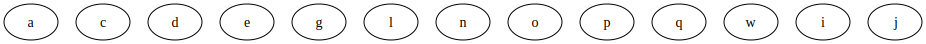

In [38]:
# Create a new directed graph using Graphviz
# 'Directly Follow Graph' is the name of the graph
graph = graphviz.Digraph('Directly Follow Graph')

# Add nodes to the graph for each event
for i in event:
    # Add a node with label i, where i is the event label
    graph.node(i, i)

# Render the graph
# 'view=False' means the graph will not be automatically opened; it will be saved as a file
graph.render(view=False)

# Display the graph object (Note: This will not display the graph directly in Jupyter Notebook)
graph

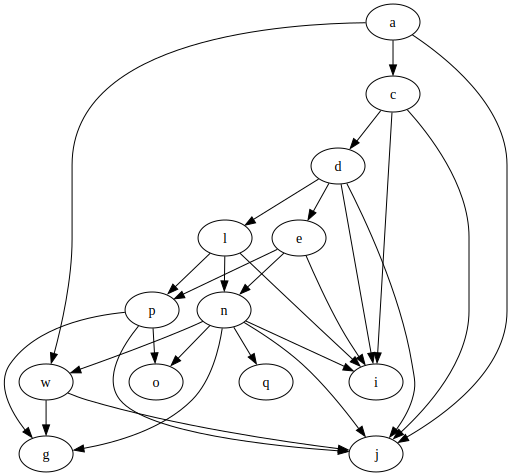

In [39]:
# Create a new directed graph using Graphviz
# This will represent dependencies between events with strong dependency values
graph = graphviz.Digraph('Dependency Graph')

# Iterate through each pair of events
for i in event:
    for j in event:
        # Check if the dependency value between events i and j is greater than 0.92
        if dependency_m[event_title[i]][event_title[j]] > 0.92:
            # Add an edge from event i to event j in the graph
            # 'constraint=True' indicates that the edge should be included in the layout constraints
            graph.edge(i, j, constraint='True')

# Render the graph
# 'view=False' means the graph will not be automatically opened; it will be saved as a file
graph.render(view=False)

# Display the graph object (Note: This will not display the graph directly in Jupyter Notebook)
graph

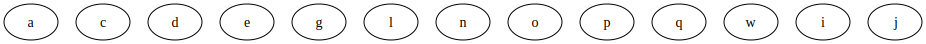

In [40]:
# Create a new directed graph using Graphviz
# This graph will represent direct follow relationships between events
graph = graphviz.Digraph('Directly Follow Graph')

# Add nodes to the graph for each event
for i in event:
    # Add a node with label i, where i is the event label
    graph.node(i, i)

# Render the graph
# 'view=False' means the graph will be saved as a file but not opened automatically
graph.render(view=False)

# Display the graph object (Note: This will not display the graph directly in Jupyter Notebook)
graph

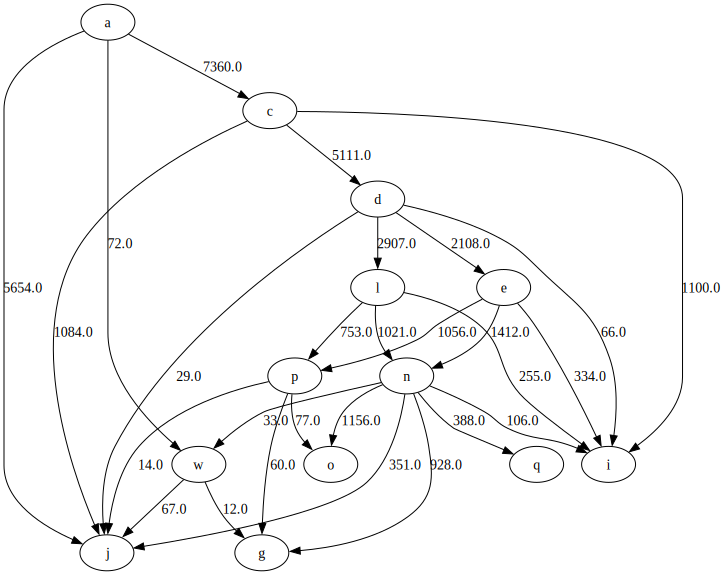

In [41]:
# Create a new directed graph using Graphviz
# This graph will represent dependencies between events with strong dependency values
graph = graphviz.Digraph('Dependency Graph')

# Iterate through each pair of events
for i in event:
    for j in event:
        # Check if the dependency value between events i and j is greater than 0.92
        if dependency_m[event_title[i]][event_title[j]] > 0.92:
            # Add an edge from event i to event j in the graph
            # The edge label shows the count of direct follows between i and j
            # 'constraint=True' ensures the edge is included in the layout constraints
            graph.edge(str(i), str(j), label=str(directly_follow_m[event_title[i]][event_title[j]]), constraint='True')

# Render the graph
# 'view=False' means the graph will be saved as a file but not opened automatically
graph.render(view=False)

# Display the graph object (Note: This will not display the graph directly in Jupyter Notebook)
graph

## **Exploratory Data Analysis**

### Distribution Analysis

In [42]:
# Extract the 'Amount_Request' values for each unique case from the cat_df DataFrame
# Drop duplicate rows based on 'Case_ID' to ensure each case is represented only once
amount_requests = list(cat_df.drop_duplicates("Case_ID")["Amount_Request"])

# Convert the 'Amount_Request' values to floats for numerical processing
amount_requests = [float(value) for value in amount_requests]

# Add the 'Amount_Request' values to the variant_df DataFrame
# This associates each variant with its corresponding amount request
variant_df["Amount_Request"] = amount_requests

# Display the first 5 rows of the updated variant_df DataFrame
variant_df.head(5)

Case_ID                                            Variant Start_Event  \
0  173688                         abcssdkelmtstttttnutugfohu           a   
1  173691            abcssssdeklmtstttkplmtttttnutuuuuuofghu           a   
2  173694  abcssssssssdeklmtstkplmtttttttttkplmtttttttttt...           a   
3  173697                                                abj           a   
4  173700                                                abj           a   

  End_Event  Amount_Request  
0         u         20000.0  
1         u          5000.0  
2         x          7000.0  
3         j         15000.0  
4         j          5000.0

In [43]:
def check_characters(string):
    """
    Check if the string contains the character 'o' and if so, ensure that
    none of the characters 'i', 'p', 'j', or 'q' appear after the last 'o' in the string.
    
    Parameters:
    string (str): The input string to check.
    
    Returns:
    bool: True if the condition is met, False otherwise.
    """
    # Check if 'o' is in the string
    if "o" in string:
        # Split the string at 'o' and check if any of 'i', 'p', 'j', or 'q'
        # are present in the substring after the last 'o'
        return all(char not in string.split("o")[-1] for char in ['i', 'p', 'j', 'q'])
    else:
        # Return False if 'o' is not in the string
        return False

# Apply the check_characters function to the 'Variant' column
# This creates a new column 'Accepted' that indicates whether each variant meets the specified condition
variant_df['Accepted'] = variant_df['Variant'].apply(check_characters)

# Display the first 5 rows of the updated variant_df DataFrame
variant_df.head(5)

Case_ID                                            Variant Start_Event  \
0  173688                         abcssdkelmtstttttnutugfohu           a   
1  173691            abcssssdeklmtstttkplmtttttnutuuuuuofghu           a   
2  173694  abcssssssssdeklmtstkplmtttttttttkplmtttttttttt...           a   
3  173697                                                abj           a   
4  173700                                                abj           a   

  End_Event  Amount_Request  Accepted  
0         u         20000.0      True  
1         u          5000.0      True  
2         x          7000.0      True  
3         j         15000.0     False  
4         j          5000.0     False

In [44]:
def check_characters(string):
    """
    Check if the string meets specific conditions based on the presence and positions of characters 'j' and 'q',
    and ensure certain characters do not appear after them in the string.
    
    Parameters:
    string (str): The input string to check.
    
    Returns:
    bool: True if the condition is met, False otherwise.
    """
    # Check if 'j' is in the string and 'q' is not in the string
    if "j" in string and "q" not in string:
        # Check if none of 'i', 'p', or 'o' appear after the last 'j' in the string
        return all(char not in string.split("j")[-1] for char in ['i', 'p', 'o'])
    
    # Check if 'q' is in the string and 'j' is not in the string
    elif "q" in string and "j" not in string:
        # Check if none of 'i', 'p', or 'o' appear after the last 'q' in the string
        return all(char not in string.split("q")[-1] for char in ['i', 'p', 'o'])
    
    # Check if both 'j' and 'q' are in the string
    elif "q" in string and "j" in string:
        # Compare positions of last occurrences of 'j' and 'q'
        if string.rfind("j") < string.rfind("q"):
            # If the last 'j' appears before the last 'q', check characters after the last 'q'
            return all(char not in string.split("q")[-1] for char in ['i', 'p', 'o'])
        else:
            # If the last 'q' appears before or at the same position as the last 'j', check characters after the last 'j'
            return all(char not in string.split("j")[-1] for char in ['i', 'p', 'o'])
    
    # Return False if none of the above conditions are met
    else:
        return False

# Apply the check_characters function to the 'Variant' column
# This creates a new column 'Declined' indicating whether each variant meets the specified conditions
variant_df['Declined'] = variant_df['Variant'].apply(check_characters)

# Display the first 5 rows of the updated variant_df DataFrame
variant_df.head(5)

Case_ID                                            Variant Start_Event  \
0  173688                         abcssdkelmtstttttnutugfohu           a   
1  173691            abcssssdeklmtstttkplmtttttnutuuuuuofghu           a   
2  173694  abcssssssssdeklmtstkplmtttttttttkplmtttttttttt...           a   
3  173697                                                abj           a   
4  173700                                                abj           a   

  End_Event  Amount_Request  Accepted  Declined  
0         u         20000.0      True     False  
1         u          5000.0      True     False  
2         x          7000.0      True     False  
3         j         15000.0     False      True  
4         j          5000.0     False      True

In [45]:
def check_characters(string):
    """
    Check if the string meets specific conditions based on the presence and positions of characters 'i' and 'p',
    and ensure certain characters do not appear after them in the string.
    
    Parameters:
    string (str): The input string to check.
    
    Returns:
    bool: True if the condition is met, False otherwise.
    """
    # Check if 'i' is in the string and 'p' is not in the string
    if "i" in string and "p" not in string:
        # Ensure none of 'j', 'q', or 'o' appear after the last 'i' in the string
        return all(char not in string.split("i")[-1] for char in ['j', 'q', 'o'])
    
    # Check if 'p' is in the string and 'i' is not in the string
    elif "p" in string and "i" not in string:
        # Ensure none of 'j', 'q', or 'o' appear after the last 'p' in the string
        return all(char not in string.split("p")[-1] for char in ['j', 'q', 'o'])
    
    # Check if both 'i' and 'p' are in the string
    elif "i" in string and "p" in string:
        # Compare positions of last occurrences of 'i' and 'p'
        if string.rfind("i") < string.rfind("p"):
            # If the last 'i' appears before the last 'p', check characters after the last 'p'
            return all(char not in string.split("p")[-1] for char in ['j', 'q', 'o'])
        else:
            # If the last 'p' appears before or at the same position as the last 'i', check characters after the last 'i'
            return all(char not in string.split("i")[-1] for char in ['j', 'q', 'o'])
    
    # Return False if none of the above conditions are met
    else:
        return False

# Apply the check_characters function to the 'Variant' column
# This creates a new column 'Cancelled' indicating whether each variant meets the specified conditions
variant_df['Cancelled'] = variant_df['Variant'].apply(check_characters)

# Display the first 5 rows of the updated variant_df DataFrame
variant_df.head(5)

Case_ID                                            Variant Start_Event  \
0  173688                         abcssdkelmtstttttnutugfohu           a   
1  173691            abcssssdeklmtstttkplmtttttnutuuuuuofghu           a   
2  173694  abcssssssssdeklmtstkplmtttttttttkplmtttttttttt...           a   
3  173697                                                abj           a   
4  173700                                                abj           a   

  End_Event  Amount_Request  Accepted  Declined  Cancelled  
0         u         20000.0      True     False      False  
1         u          5000.0      True     False      False  
2         x          7000.0      True     False      False  
3         j         15000.0     False      True      False  
4         j          5000.0     False      True      False

In [46]:
# Create a new column 'No_Decision' to indicate if none of the 'Accepted', 'Declined', or 'Cancelled' conditions are met
# The '~' operator is used to negate the boolean values, so 'No_Decision' will be True if none of 'Accepted', 'Declined', or 'Cancelled' are True
variant_df['No_Decision'] = ~variant_df[['Accepted', 'Declined', 'Cancelled']].any(axis=1)

# Display the first 5 rows of the updated variant_df DataFrame, including the new 'No_Decision' column
variant_df.head(5)

Case_ID                                            Variant Start_Event  \
0  173688                         abcssdkelmtstttttnutugfohu           a   
1  173691            abcssssdeklmtstttkplmtttttnutuuuuuofghu           a   
2  173694  abcssssssssdeklmtstkplmtttttttttkplmtttttttttt...           a   
3  173697                                                abj           a   
4  173700                                                abj           a   

  End_Event  Amount_Request  Accepted  Declined  Cancelled  No_Decision  
0         u         20000.0      True     False      False        False  
1         u          5000.0      True     False      False        False  
2         x          7000.0      True     False      False        False  
3         j         15000.0     False      True      False        False  
4         j          5000.0     False      True      False        False

In [47]:
# Create a DataFrame to summarize statistics for different statuses
# The DataFrame has columns for Status, Min, Mean, Median, and Max of 'Amount_Request'
summary_df = pd.DataFrame(columns=["Status", "Min", "Mean", "Median", "Max"])

# Define the statuses to summarize
statuses = ["Accepted", "Declined", "Cancelled", "No_Decision"]
summary_df["Status"] = statuses

# Loop through each status to calculate statistics
for status in statuses:
    
    # Get the index of the current status
    idx = statuses.index(status)
    
    # Filter the variant_df for the current status where it is True
    filtered_df = variant_df[variant_df[status] == True]
    
    # Calculate and assign statistics to the corresponding row in summary_df
    summary_df.iloc[idx, 1] = filtered_df["Amount_Request"].min()       # Minimum value of 'Amount_Request'
    summary_df.iloc[idx, 2] = filtered_df["Amount_Request"].mean()      # Mean value of 'Amount_Request'
    summary_df.iloc[idx, 3] = filtered_df["Amount_Request"].median()    # Median value of 'Amount_Request'
    summary_df.iloc[idx, 4] = filtered_df["Amount_Request"].max()       # Maximum value of 'Amount_Request'

# Display the summary DataFrame with statistics for each status
summary_df

Status     Min          Mean   Median      Max
0     Accepted  1000.0  15705.456086  13000.0  99000.0
1     Declined     1.0  12191.029208   8000.0  99999.0
2    Cancelled     0.0  15280.777512  10000.0  99999.0
3  No_Decision   300.0  16314.876325  10000.0  55000.0

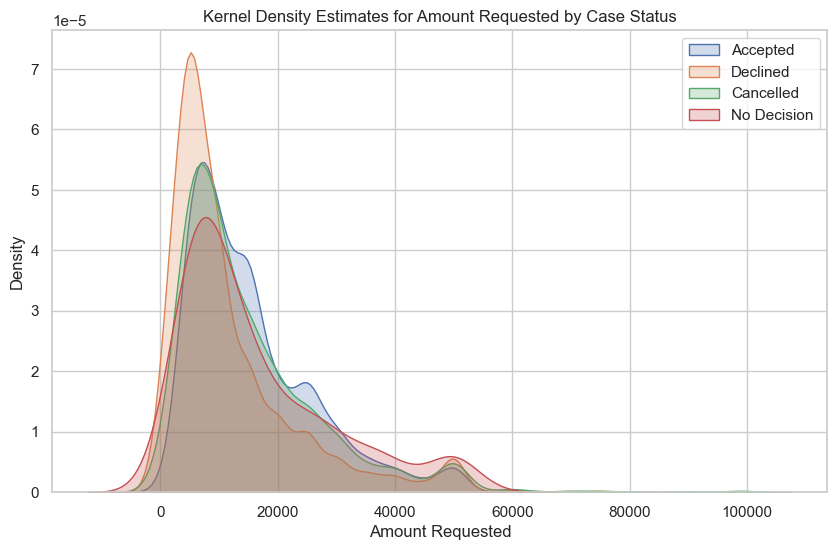

In [48]:
# Extract the 'Amount_Request' data for each status
# This is done by filtering the variant_df DataFrame based on the respective status
accepted_data = variant_df[variant_df['Accepted'] == True]['Amount_Request']
declined_data = variant_df[variant_df['Declined'] == True]['Amount_Request']
cancelled_data = variant_df[variant_df['Cancelled'] == True]['Amount_Request']
no_decision_data = variant_df[variant_df['No_Decision'] == True]['Amount_Request']

# Create a figure for plotting
plt.figure(figsize=(10, 6))

# Plot Kernel Density Estimates (KDE) for each status
# KDE is used to estimate the probability density function of the continuous variable 'Amount_Request'
sns.kdeplot(accepted_data, label='Accepted', fill=True)
sns.kdeplot(declined_data, label='Declined', fill=True)
sns.kdeplot(cancelled_data, label='Cancelled', fill=True)
sns.kdeplot(no_decision_data, label='No Decision', fill=True)

# Add labels and title to the plot
plt.xlabel('Amount Requested')  # Label for the x-axis
plt.ylabel('Density')            # Label for the y-axis
plt.title('Kernel Density Estimates for Amount Requested by Case Status')  # Title of the plot

# Add a legend to the plot to distinguish between different statuses
plt.legend()

# Display the plot
plt.show()

In [49]:
# Get the unique end events from the 'End_Event' column
unique_end_events = set(variant_df["End_Event"])

# Initialize an empty list to store DataFrames for each end event
dfs = []

# Iterate over each unique end event
for end_event in unique_end_events:
    # Filter the variant_df DataFrame for the current end event
    end_event_df = variant_df[variant_df["End_Event"] == end_event]
    
    # Calculate statistics for 'Amount_Request' for the current end event
    min_amount = round(end_event_df["Amount_Request"].min(), 2)     # Minimum amount requested
    mean_amount = round(end_event_df["Amount_Request"].mean(), 2)   # Mean amount requested
    max_amount = round(end_event_df["Amount_Request"].max(), 2)     # Maximum amount requested
    ratio = round(len(end_event_df) / len(variant_df) * 100, 2)    # Ratio of cases with this end event as a percentage
    
    # Create a DataFrame to store the results for the current end event
    result_df = pd.DataFrame({
        "End_Event": [end_event], 
        "Min_Amount_Request": [min_amount],
        "Mean_Amount_Request": [mean_amount],
        "Max_Amount_Request": [max_amount],
        "Ratio": [ratio]
    })
    
    # Append the result DataFrame to the list of DataFrames
    dfs.append(result_df)

# Concatenate all result DataFrames into a single DataFrame
amount_df = pd.concat(dfs, ignore_index=True)

# Display the final DataFrame with statistics for each end event
amount_df

End_Event  Min_Amount_Request  Mean_Amount_Request  Max_Amount_Request  \
0          x              6000.0             12000.00             25000.0   
1          j                12.0             10868.21             99999.0   
2          i                 0.0             14962.89             75000.0   
3          r                 1.0             10864.57             99000.0   
4          g             20000.0             20000.00             20000.0   
5          t               500.0             14933.30             99000.0   
6          v              1000.0             16811.28             65000.0   
7          w               500.0             11012.70             49350.0   
8          u                25.0             15889.02             99000.0   
9          s                10.0             15802.73             99999.0   
10         p              2000.0             15943.60             90000.0   

    Ratio  
0    0.03  
1   26.20  
2    5.00  
3   17.07  
4    0.01  
5    9.86  
6    3.45  
7    0.44  
8   20.99  
9   14.82  
10   2.13

### Correlation Analysis

In [50]:
# Define a list of selected activities to filter the DataFrame
selected_activities = ['i', 'p', 'j', 'q', 'o']

# Filter the cat_df DataFrame to include only rows where the 'Activity' column matches one of the selected activities
filtered_df = cat_df[cat_df['Activity'].isin(selected_activities)]

# Display the filtered DataFrame
filtered_df

Case_ID Activity Transition Resource                  Start_Timestamp  \
23      173688        o   COMPLETE    10629 2011-10-01 00:38:44.546000+00:00   
44      173691        p   COMPLETE    11120 2011-10-01 08:08:58.256000+00:00   
60      173691        o   COMPLETE    10809 2011-10-01 08:08:58.256000+00:00   
85      173694        p   COMPLETE    11201 2011-10-01 08:10:30.287000+00:00   
98      173694        p   COMPLETE    10861 2011-10-01 08:10:30.287000+00:00   
...        ...      ...        ...      ...                              ...   
262137  214361        q   COMPLETE    10138 2012-02-29 23:11:37.974000+00:00   
262155  214364        p   COMPLETE    11003 2012-02-29 23:22:24.570000+00:00   
262170  214367        j   COMPLETE      112 2012-02-29 23:28:41.098000+00:00   
262175  214370        j   COMPLETE    11169 2012-02-29 23:28:55.349000+00:00   
262198  214376        j   COMPLETE    11169 2012-02-29 23:51:16.799000+00:00   

                     Complete_Timestamp Amount_Request  
23     2011-10-13 10:37:29.226000+00:00          20000  
44     2011-10-03 16:56:17.731000+00:00           5000  
60     2011-10-10 14:17:26.306000+00:00           5000  
85     2011-10-03 13:44:17.619000+00:00           7000  
98     2011-10-17 19:43:53.587000+00:00           7000  
...                                 ...            ...  
262137 2012-03-13 11:21:42.128000+00:00           5000  
262155 2012-03-02 10:14:42.057000+00:00           5000  
262170 2012-02-29 23:29:21.958000+00:00            500  
262175 2012-03-01 09:28:18.168000+00:00          20000  
262198 2012-03-01 09:27:37.118000+00:00          15000  

[17142 rows x 7 columns]

In [51]:
# Count the occurrences of each activity in the filtered DataFrame
activity_counts = filtered_df['Activity'].value_counts()

# Print a header for clarity
print("Activity Counts:")

# Convert the activity counts Series to a DataFrame for better readability and display it
pd.DataFrame(activity_counts)

Activity Counts:


Activity
j      7635
p      3655
i      2807
o      2243
q       802

In [52]:
# Calculate the ratio of each resource's occurrence within each activity
# This is done by dividing the count of each (Activity, Resource) pair by the total count of the activity
resource_activity_ratio = filtered_df.groupby(['Activity', 'Resource']).size() / filtered_df.groupby('Activity').size()

# Convert the ratio Series into a DataFrame for better readability
resource_df = pd.DataFrame(resource_activity_ratio, columns=['Resource_Activity_Ratio'])

# Display the DataFrame showing the ratio of resources for each activity
resource_df

0
Activity Resource          
i        10138     0.001781
         10228     0.000713
         10609     0.001781
         10629     0.000356
         10779     0.003919
...                     ...
q        11259     0.001247
         11289     0.068579
         11299     0.001247
         11309     0.001247
         11339     0.001247

[229 rows x 1 columns]

## **Process Mining Techniques**

### Process Discovery

In [53]:
# Calculate the throughput time for each case
# Group by 'Case_ID' and aggregate to find the maximum 'Complete_Timestamp' and minimum 'Start_Timestamp' for each case
time_diff_per_case = df.groupby("Case_ID")[["Complete_Timestamp", "Start_Timestamp"]].agg({
    "Complete_Timestamp": "max",
    "Start_Timestamp": "min"
})

# Compute the throughput time by subtracting the start timestamp from the complete timestamp
time_diff_per_case["Throughput_Time"] = time_diff_per_case["Complete_Timestamp"] - time_diff_per_case["Start_Timestamp"]

# Merge the computed throughput time with the variant_df DataFrame
# This adds the 'Throughput_Time' column to variant_df based on matching 'Case_ID'
variant_df = pd.merge(variant_df, time_diff_per_case["Throughput_Time"], left_on="Case_ID", right_index=True, how="left")

# Display the updated variant_df DataFrame with the new 'Throughput_Time' column
variant_df

Case_ID                                            Variant Start_Event  \
0      173688                         abcssdkelmtstttttnutugfohu           a   
1      173691            abcssssdeklmtstttkplmtttttnutuuuuuofghu           a   
2      173694  abcssssssssdeklmtstkplmtttttttttkplmtttttttttt...           a   
3      173697                                                abj           a   
4      173700                                                abj           a   
...       ...                                                ...         ...   
13082  214364                      abcssssdeklmtstkplmtttttttnut           a   
13083  214367                                                abj           a   
13084  214370                                             abrrjr           a   
13085  214373                                  abrrcsrsdkelmtstt           a   
13086  214376                                             abrrjr           a   

      End_Event  Amount_Request  Accepted  Declined  Cancelled  No_Decision  \
0             u         20000.0      True     False      False        False   
1             u          5000.0      True     False      False        False   
2             x          7000.0      True     False      False        False   
3             j         15000.0     False      True      False        False   
4             j          5000.0     False      True      False        False   
...         ...             ...       ...       ...        ...          ...   
13082         t          5000.0     False     False       True        False   
13083         j           500.0     False      True      False        False   
13084         r         20000.0     False      True      False        False   
13085         t          8500.0     False     False      False         True   
13086         r         15000.0     False      True      False        False   

               Throughput_Time  
0      12 days 09:58:52.480000  
1       9 days 06:08:36.377000  
2     137 days 04:18:56.012000  
3       0 days 00:00:37.555000  
4       0 days 00:00:41.143000  
...                        ...  
13082   8 days 11:39:23.786000  
13083   0 days 00:00:40.860000  
13084   0 days 09:59:25.879000  
13085   9 days 13:07:45.115000  
13086   0 days 09:36:24.526000  

[13087 rows x 10 columns]

In [54]:
# Convert the 'Throughput_Time' column to a Timedelta type for accurate time calculations
variant_df['Throughput_Time'] = pd.to_timedelta(variant_df['Throughput_Time'])

# Convert 'Throughput_Time' to a float value representing the number of days
# This is done by converting the Timedelta to total seconds, then dividing by the number of seconds in a day (3600 * 24)
variant_df['Throughput_Float'] = variant_df['Throughput_Time'].dt.total_seconds()
variant_df['Throughput_Float'] = variant_df['Throughput_Float'] / (3600 * 24)

# Display the first 5 rows of the updated variant_df DataFrame
variant_df.head(5)

Case_ID                                            Variant Start_Event  \
0  173688                         abcssdkelmtstttttnutugfohu           a   
1  173691            abcssssdeklmtstttkplmtttttnutuuuuuofghu           a   
2  173694  abcssssssssdeklmtstkplmtttttttttkplmtttttttttt...           a   
3  173697                                                abj           a   
4  173700                                                abj           a   

  End_Event  Amount_Request  Accepted  Declined  Cancelled  No_Decision  \
0         u         20000.0      True     False      False        False   
1         u          5000.0      True     False      False        False   
2         x          7000.0      True     False      False        False   
3         j         15000.0     False      True      False        False   
4         j          5000.0     False      True      False        False   

           Throughput_Time  Throughput_Float  
0  12 days 09:58:52.480000         12.415885  
1   9 days 06:08:36.377000          9.255977  
2 137 days 04:18:56.012000        137.179815  
3   0 days 00:00:37.555000          0.000435  
4   0 days 00:00:41.143000          0.000476

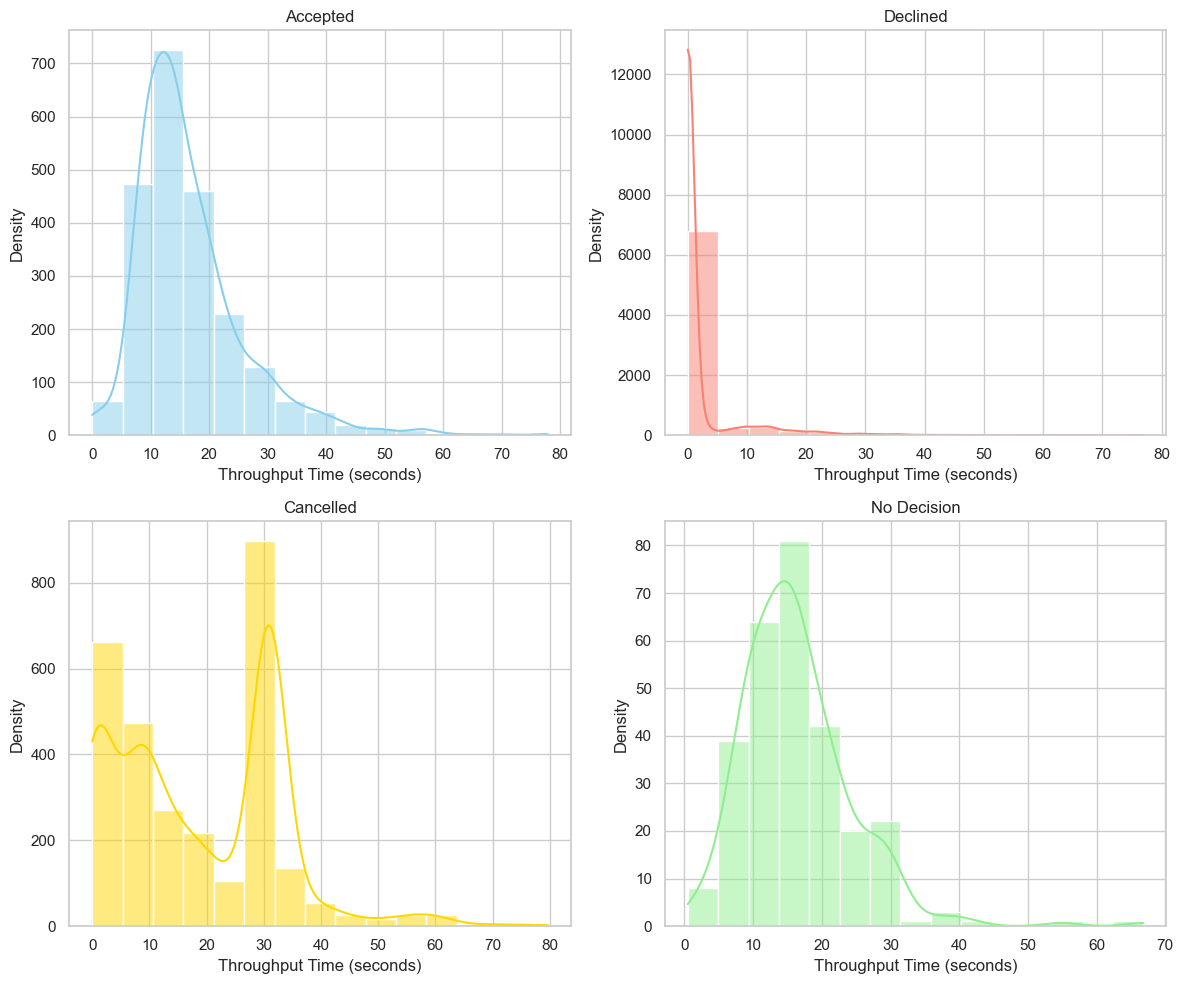

In [55]:
# Define a threshold for filtering the data
threshold = 80

# Filter the DataFrame to include only records where 'Throughput_Float' is less than the threshold
filtered_data = variant_df[variant_df['Throughput_Float'] < threshold]

# Create a 2x2 grid of subplots for visualizing the throughput times by status
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot histogram with KDE for 'Accepted' cases
sns.histplot(filtered_data[filtered_data['Accepted']]['Throughput_Float'], bins=15, kde=True, color="skyblue", ax=axes[0, 0])
axes[0, 0].set_title('Accepted')

# Plot histogram with KDE for 'Declined' cases
sns.histplot(filtered_data[filtered_data['Declined']]['Throughput_Float'], bins=15, kde=True, color="salmon", ax=axes[0, 1])
axes[0, 1].set_title('Declined')

# Plot histogram with KDE for 'Cancelled' cases
sns.histplot(filtered_data[filtered_data['Cancelled']]['Throughput_Float'], bins=15, kde=True, color="gold", ax=axes[1, 0])
axes[1, 0].set_title('Cancelled')

# Plot histogram with KDE for 'No Decision' cases
sns.histplot(filtered_data[filtered_data['No_Decision']]['Throughput_Float'], bins=15, kde=True, color="lightgreen", ax=axes[1, 1])
axes[1, 1].set_title('No Decision')

# Set common labels for all subplots
for ax in axes.flat:
    ax.set(xlabel='Throughput Time (days)', ylabel='Density')

# Adjust the layout to prevent overlap and improve appearance
plt.tight_layout()

# Display the plots
plt.show()

In [56]:
# Create a DataFrame that counts the number of iterations for each variant
trace_table = variant_df["Variant"].value_counts().reset_index()
trace_table.columns = ["Variant", "Iterations"]

# Calculate the mean throughput time for each variant
mean_throughput = variant_df.groupby("Variant")["Throughput_Float"].mean().reset_index()
mean_throughput.columns = ["Variant", "Mean_Throughput_Float"]

# Merge the count of iterations with the mean throughput time for each variant
trace_table = trace_table.merge(mean_throughput, on="Variant", how="left")

# Sort the table by the number of iterations in descending order and display the top 10 variants
trace_table.sort_values("Iterations", ascending=False).head(10)

Variant  Iterations  Mean_Throughput_Float
0             abj        3429               0.000446
1          abrrjr        1872               0.215596
2        abrrrrjr         271               0.288694
3      abrrcsrsjs         209               0.324235
4         abcssjs         160               0.262061
5         abcssis         134               0.269430
6    abrrcsrsssjs         126               0.889164
7       abcssssjs          93               0.558446
8       abcssssis          87               0.555870
9  abrrcsrsssssjs          74               1.257155

<Axes: xlabel='Mean_Throughput_Float', ylabel='Count'>

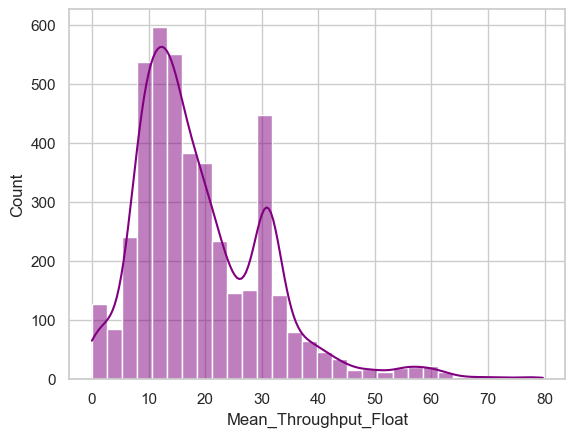

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the threshold for filtering variants
threshold = 80

# Create a histogram of the mean throughput times for variants where the mean throughput time is less than the threshold
sns.histplot(
    trace_table[trace_table['Mean_Throughput_Float'] < threshold]['Mean_Throughput_Float'],  # Data to plot
    bins=30,  # Number of bins in the histogram
    kde=True,  # Overlay a kernel density estimate (KDE) on the histogram
    color="purple"  # Color of the histogram
)

# Add labels and title to the plot
plt.xlabel('Mean Throughput Time (days)')
plt.ylabel('Density')
plt.title('Histogram of Mean Throughput Times for Variants')

# Show the plot
plt.show()

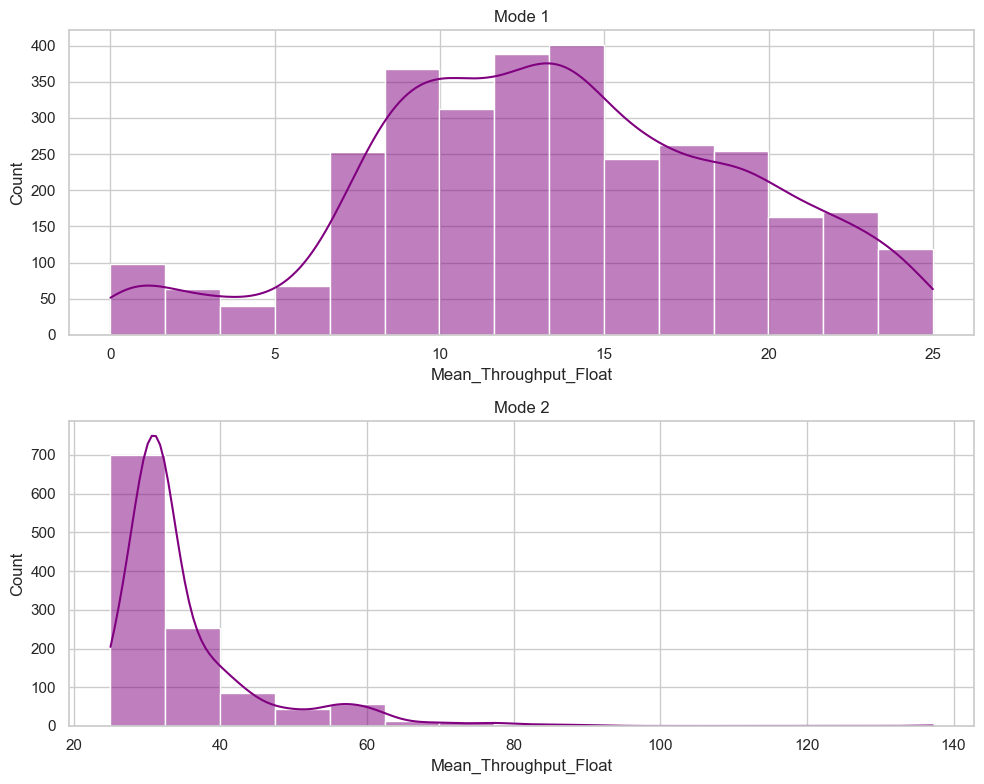

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the threshold for splitting the data into two modes
threshold = 25

# Split the data based on the threshold
data_mode1 = trace_table[trace_table['Mean_Throughput_Float'] < threshold]['Mean_Throughput_Float']
data_mode2 = trace_table[trace_table['Mean_Throughput_Float'] >= threshold]['Mean_Throughput_Float']

# Create a figure with two subplots (one column, two rows)
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot histogram for data below the threshold (Mode 1)
sns.histplot(
    data_mode1,  # Data to plot
    bins=15,  # Number of bins in the histogram
    kde=True,  # Overlay a kernel density estimate (KDE) on the histogram
    color="purple",  # Color of the histogram
    ax=axs[0]  # Specify the subplot for this histogram
)
axs[0].set_title('Mode 1')  # Set the title for the first subplot

# Plot histogram for data equal to or above the threshold (Mode 2)
sns.histplot(
    data_mode2,  # Data to plot
    bins=15,  # Number of bins in the histogram
    kde=True,  # Overlay a kernel density estimate (KDE) on the histogram
    color="purple",  # Color of the histogram
    ax=axs[1]  # Specify the subplot for this histogram
)
axs[1].set_title('Mode 2')  # Set the title for the second subplot

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [59]:
# Print the mean of the throughput times for the applications
print("The mean of the applications' throughput times is: ", variant_df["Throughput_Time"].mean())

The mean of the applications' throughput times is:  8 days 14:55:16.341417208


In [60]:
# Create an empty DataFrame to store duration statistics for each end event
duration_df = pd.DataFrame(columns=["End_Event", "Min_Duration", "Mean_Duration", "Max_Duration", "Occurrences", "Ratio"])

# Initialize lists to store duration statistics and occurrence information
min_duration = []
mean_duration = []
max_duration = []
occurrences = []
ratio = []

# Loop over each unique end event to compute statistics
for end in list(variant_df["End_Event"].unique()):
    # Filter the DataFrame for the current end event
    end_df = variant_df[variant_df["End_Event"] == end]
    
    # Compute duration statistics
    end_min = end_df["Throughput_Time"].min()
    end_mean = end_df["Throughput_Time"].mean()
    end_max = end_df["Throughput_Time"].max()
    
    # Append statistics to the lists
    min_duration.append(end_min)
    mean_duration.append(end_mean)
    max_duration.append(end_max)
    
    # Compute occurrences and ratio
    occurrences.append(end_df.shape[0])
    ratio.append(round(((end_df.shape[0])/(variant_df.shape[0]))*100, 2))

# Populate the DataFrame with the computed statistics
duration_df["End_Event"] = list(variant_df["End_Event"].unique())
duration_df["Min_Duration"] = min_duration
duration_df["Mean_Duration"] = mean_duration
duration_df["Max_Duration"] = max_duration
duration_df["Occurrences"] = occurrences
duration_df["Ratio"] = ratio

# Sort the DataFrame by mean duration in descending order and reset index
duration_df_sorted = duration_df.sort_values("Mean_Duration", ascending=False).reset_index(drop=True)

# Display the sorted DataFrame
duration_df_sorted

End_Event            Min_Duration              Mean_Duration  \
0          x 10 days 01:33:45.029000    51 days 15:56:08.999000   
1          p  2 days 18:51:53.401000 33 days 13:51:19.174577061   
2          i  0 days 00:48:25.214000 31 days 22:31:42.223638168   
3          v  0 days 05:48:32.664000 20 days 17:37:51.176376106   
4          u  0 days 00:11:48.376000 16 days 15:42:21.382077539   
5          t  0 days 00:08:27.914000 16 days 04:52:09.690982170   
6          g 12 days 20:59:32.871000    12 days 20:59:32.871000   
7          s  0 days 00:01:06.618000  2 days 21:21:10.724641567   
8          w  0 days 00:52:08.010000  2 days 14:52:10.877333333   
9          r  0 days 00:01:17.481000  0 days 05:52:55.881317815   
10         j  0 days 00:00:01.855000  0 days 00:00:38.524777486   

               Max_Duration  Occurrences  Ratio  
0  137 days 04:18:56.012000            4   0.03  
1   71 days 10:45:53.799000          279   2.13  
2   91 days 09:55:36.161000          655   5.00  
3   84 days 06:41:26.256000          452   3.45  
4   85 days 21:02:24.197000         2747  20.99  
5   82 days 18:34:27.246000         1290   9.86  
6   12 days 20:59:32.871000            1   0.01  
7   32 days 15:17:09.137000         1939  14.82  
8   12 days 23:38:32.096000           57   0.44  
9    6 days 16:47:40.875000         2234  17.07  
10   0 days 00:01:59.934000         3429  26.20

### Heuristics Miner Application

In [61]:
# Replace activity codes in the DataFrame using the activity mapping dictionary
df_filled = df_filled.replace(activities_map)

# Filter the DataFrame to include only rows where the transition is either 'START' or 'COMPLETE'
# Then group the filtered DataFrame by 'Case_ID'
grouped_by_case = df_filled[df_filled["Transition"].isin(["START", "COMPLETE"])].groupby("Case_ID")

# Initialize lists to store results for each case
maximum_duration_per_act = {
    "Case_ID": [],          # Case ID
    "Activity": [],         # Activity name
    "Maximum_Duration": [], # Maximum duration for the activity
    "Resource": []          # Resource used
}
# Sets to track problematic records
problematic_records_with_two_complete = set()  # Records with two 'COMPLETE' transitions
problematic_records_with_last_start = set()    # Records with 'START' as the last transition

# Iterate over each group of case data
for case_id, group_df in grouped_by_case:
    # Get unique activities where the transition is 'START'
    have_start_acts = set(group_df[group_df["Transition"] == "START"]["Activity"].unique())
    
    # Process each activity that has a 'START' transition
    for act in have_start_acts:
        # Filter the DataFrame for the current activity
        act_df = group_df[group_df["Activity"] == act]

        if len(act_df) % 2 == 0:
            # If the number of transitions is even, calculate the duration between 'START' and 'COMPLETE'
            # durations is a Series of differences between 'COMPLETE' timestamps
            durations = act_df["Complete_Timestamp"].diff().iloc[1::2]
            max_duration_index = durations.idxmax()  # Index of the maximum duration
            max_duration = durations.max()            # Maximum duration
        else:
            # If the number of transitions is odd, handle cases where the last transition is 'START'
            if list(act_df["Transition"])[-1] == "START":
                # Drop the last 'START' transition
                act_df = act_df.drop(act_df.index[-1])
                if len(act_df) > 0:
                    durations = act_df["Complete_Timestamp"].diff().iloc[1::2]
                    max_duration_index = durations.idxmax()
                    max_duration = durations.max()
                    problematic_records_with_last_start.add(case_id)  # Track case with problematic 'START'
                else:
                    continue
            else:
                # Drop the last 'COMPLETE' transition
                act_df = act_df.drop(act_df.index[-2])
                durations = act_df["Complete_Timestamp"].diff().iloc[1::2]
                max_duration_index = durations.idxmax()
                max_duration = durations.max()
                problematic_records_with_two_complete.add(case_id)  # Track case with problematic 'COMPLETE'

        # Append results to the lists
        maximum_duration_per_act["Case_ID"].append(case_id)
        maximum_duration_per_act["Activity"].append(act)
        maximum_duration_per_act["Maximum_Duration"].append(max_duration)
        maximum_duration_per_act["Resource"].append(group_df.loc[max_duration_index, "Resource"])

# Convert the dictionary of results to a DataFrame
maximum_duration_per_act_df = pd.DataFrame(maximum_duration_per_act)

# Convert the 'Maximum_Duration' column to timedelta format
maximum_duration_per_act_df["Maximum_Duration"] = pd.to_timedelta(maximum_duration_per_act_df["Maximum_Duration"])

# Display the DataFrame with maximum durations
maximum_duration_per_act_df

In [62]:
# Print the number of records with the last activity not finished
print(f"There are {len(problematic_records_with_last_start)} numbers of records with the last activity not finished.")

# Print the number of records with duplicate activities in the last transition
print(f"There are {len(problematic_records_with_two_complete)} numbers of records with duplicate activities in the last.")

There are 2 numbers of records with the last activity not finished.
There are 1031 numbers of records with duplicate activities in the last.


In [63]:
# Display the first 10 rows of the DataFrame showing maximum durations per activity
maximum_duration_per_act_df.head(10)

Case_ID Activity       Maximum_Duration Resource
0  173688        t 0 days 00:05:03.166000    10913
1  173688        s 0 days 00:08:27.480000      112
2  173688        u 0 days 00:32:10.101000    10629
3  173691        t 0 days 00:01:37.938000    11180
4  173691        s 0 days 00:07:51.016000      112
5  173691        u 0 days 00:18:18.281000    10809
6  173694        t 0 days 00:04:41.872000    11119
7  173694        s 0 days 00:11:36.687000    11201
8  173694        u 0 days 00:40:39.578000    10609
9  173703        s 0 days 00:21:45.599000    10912

In [64]:
# Print the unique activities that are considered time-consuming
print("Only these activities are time-consuming and others are considered milestones:")
print(maximum_duration_per_act_df["Activity"].unique())

Only these activities are time consuming and others are considered milestones:
['t' 's' 'u' 'r' 'v' 'w']


In [65]:
# Print the number of unique case IDs that have time-consuming activities
print(f"{len(maximum_duration_per_act_df['Case_ID'].unique())} numbers of case IDs have activities with time.")

9657 numbers of case ids have activities with time.


In [66]:
# Find the indices of the maximum duration for each case_id.
# We group by 'Case_ID' and then find the index of the row with the maximum 'Maximum_Duration' for each group.
max_duration_indices = maximum_duration_per_act_df.groupby("Case_ID")["Maximum_Duration"].idxmax()

# Use the indices obtained to select the rows from 'maximum_duration_per_act_df' that correspond to the maximum duration for each 'Case_ID'.
# This results in a DataFrame 'result_df' that contains only the rows with the maximum duration for each case.
result_df = maximum_duration_per_act_df.loc[max_duration_indices]

# Display the resulting DataFrame to show the activities with the longest durations for each case.
result_df

Case_ID Activity       Maximum_Duration Resource
2      173688        u 0 days 00:32:10.101000    10629
5      173691        u 0 days 00:18:18.281000    10809
8      173694        u 0 days 00:40:39.578000    10609
9      173703        s 0 days 00:21:45.599000    10912
11     173706        s 0 days 00:09:36.365000      112
...       ...      ...                    ...      ...
22081  214361        u 0 days 00:18:45.315000    10138
22083  214364        s 0 days 00:16:36.274000    11003
22084  214370        r 0 days 00:02:41.819000    11169
22087  214373        s 0 days 00:11:26.396000    10933
22088  214376        r 0 days 00:00:54.589000    11169

[9657 rows x 4 columns]

In [67]:
# Convert the 'Maximum_Duration' column from timedelta to a more readable timedelta format
result_df['Maximum_Duration'] = pd.to_timedelta(result_df['Maximum_Duration'])

# Convert 'Maximum_Duration' from timedelta to total seconds as a float for easier analysis
result_df['Maximum_Duration_Float'] = result_df['Maximum_Duration'].dt.total_seconds()

# Convert 'Maximum_Duration_Float' from seconds to minutes for a more interpretable unit
result_df['Maximum_Duration_Float'] = result_df['Maximum_Duration_Float'] / 60

# Display the first 5 rows of the updated DataFrame to check the results
result_df.head(5)

Case_ID Activity       Maximum_Duration Resource  Maximum_Duration_Float
2   173688        u 0 days 00:32:10.101000    10629               32.168350
5   173691        u 0 days 00:18:18.281000    10809               18.304683
8   173694        u 0 days 00:40:39.578000    10609               40.659633
9   173703        s 0 days 00:21:45.599000    10912               21.759983
11  173706        s 0 days 00:09:36.365000      112                9.606083

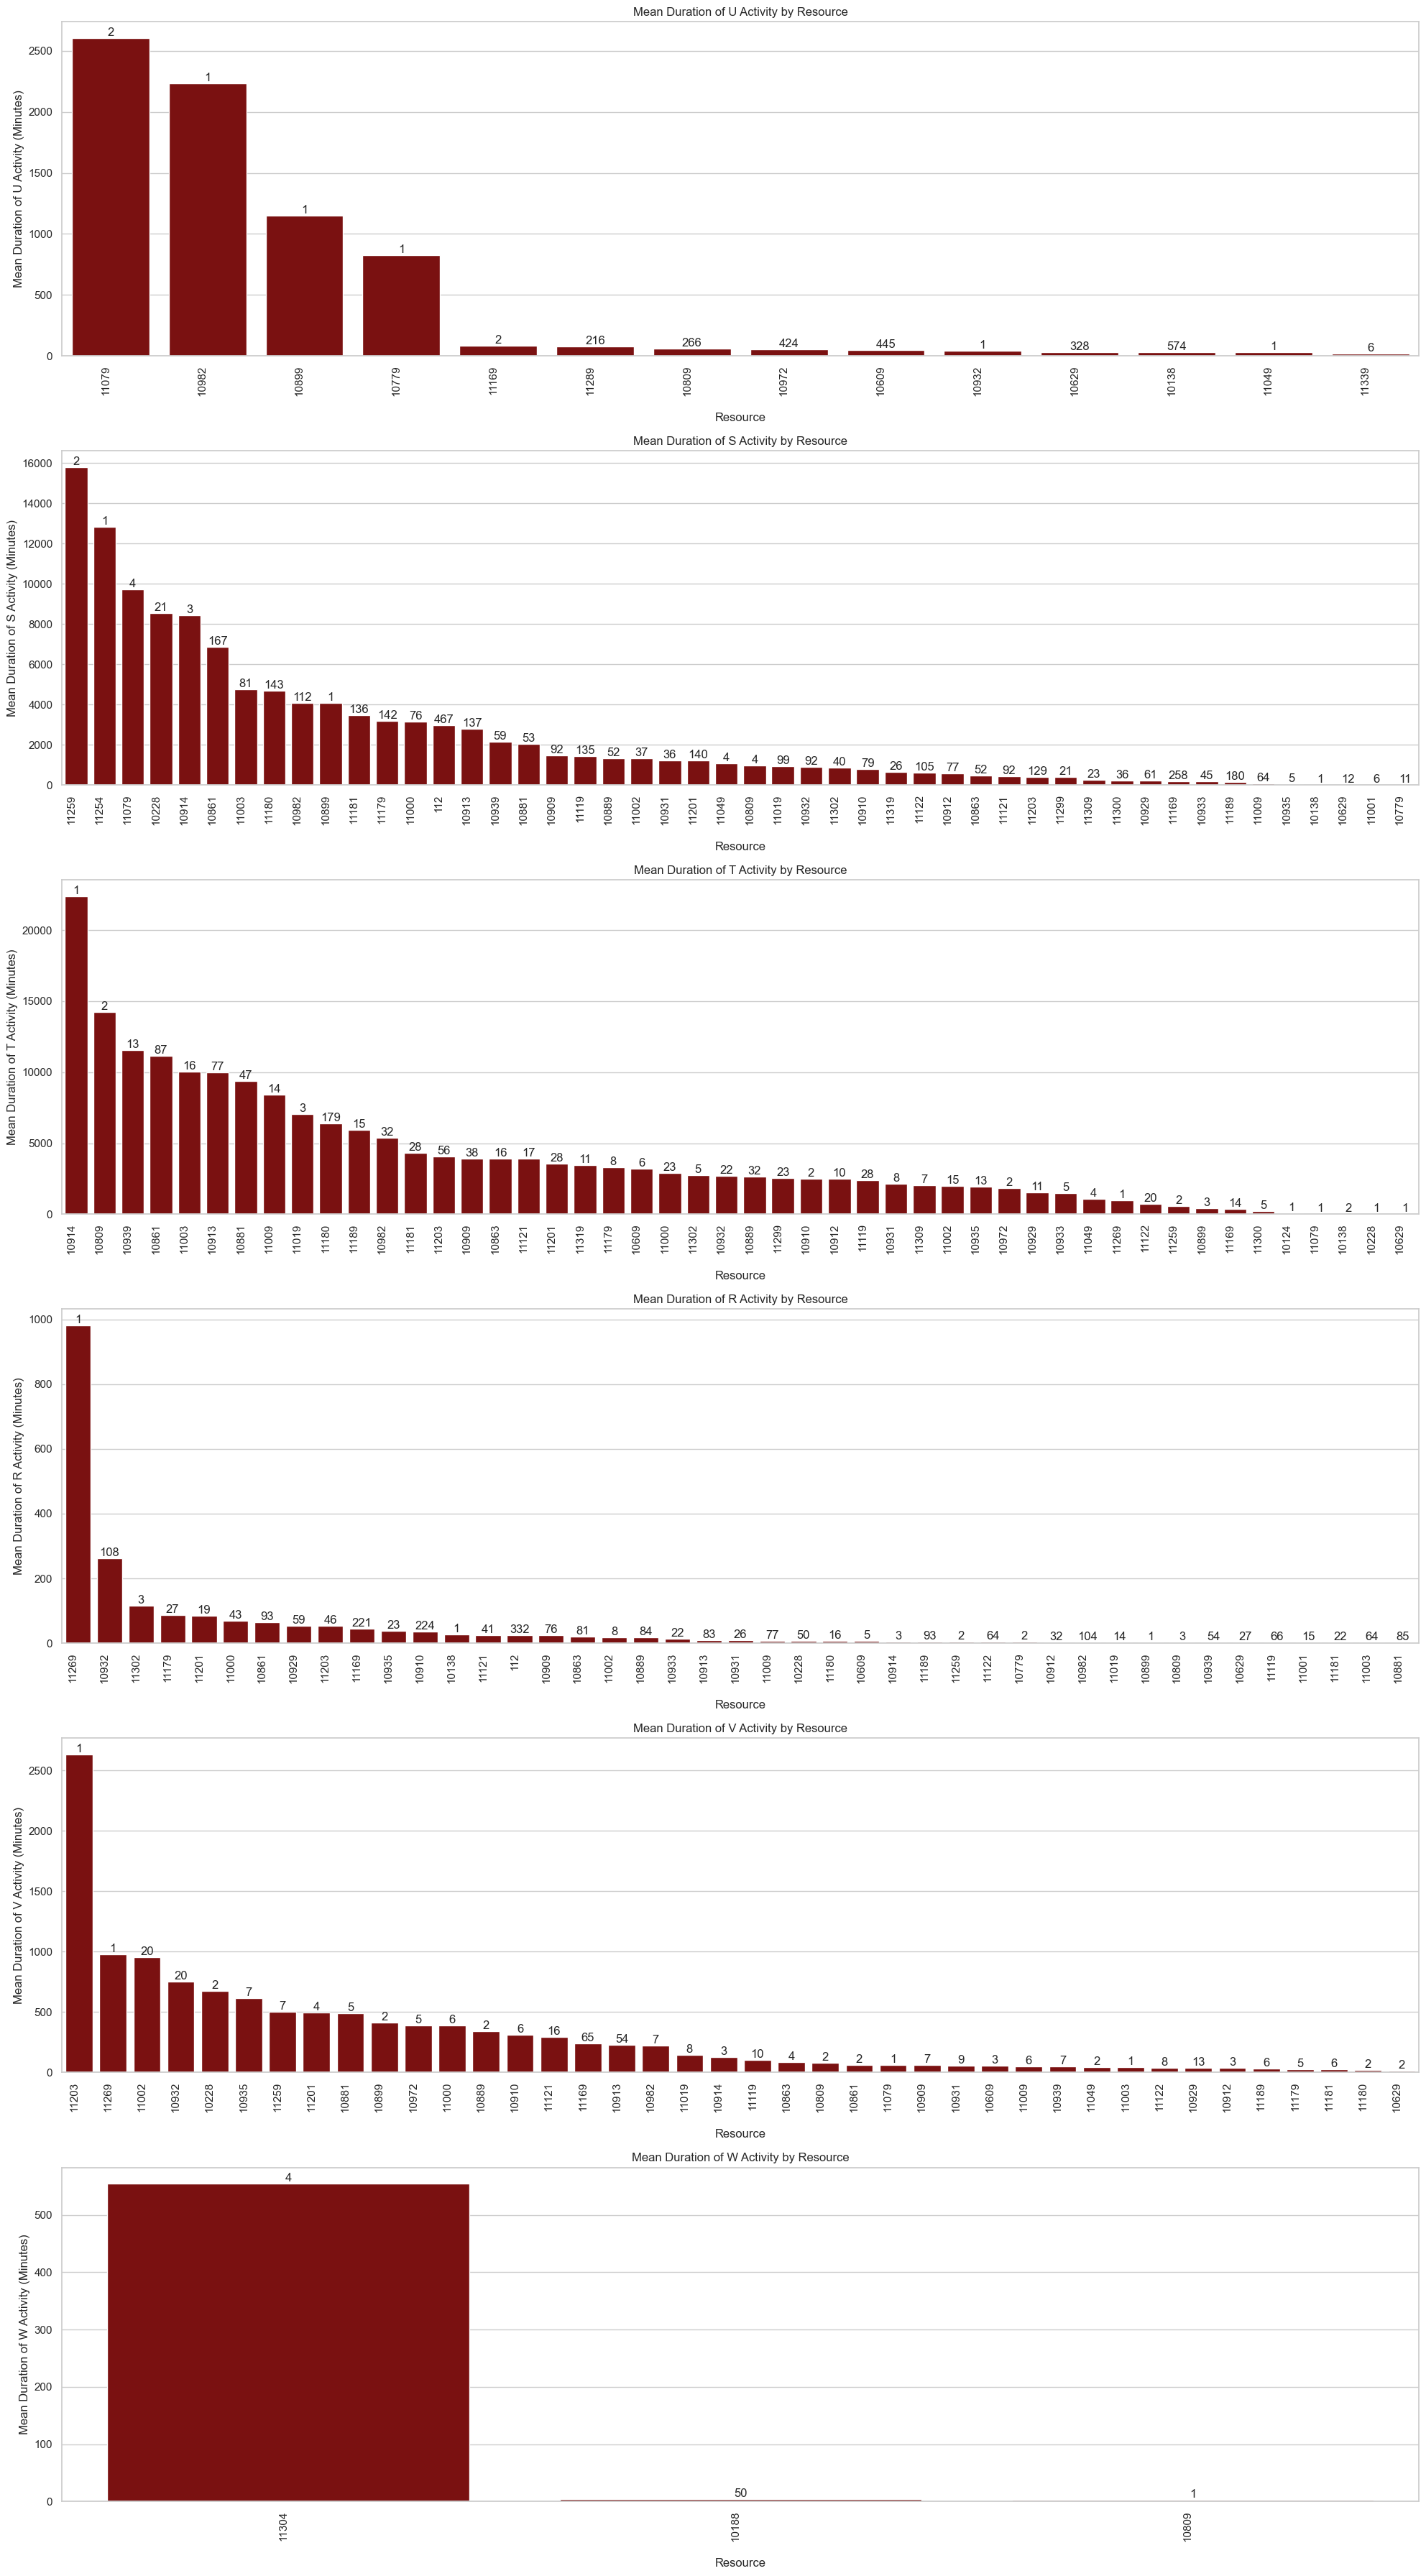

In [68]:
# List of activities to analyze
activities = ['u', 's', 't', 'r', 'v', 'w']

# Create a subplot grid with one row for each activity
fig, axes = plt.subplots(nrows=len(activities), ncols=1, figsize=(20, 6 * len(activities)))

# Loop through each activity to create individual plots
for i, activity in enumerate(activities):
    
    # Filter the DataFrame for the current activity
    activity_df = result_df[result_df["Activity"] == activity]
    
    # Calculate the mean duration of the activity by resource
    mean_durations = activity_df.groupby('Resource')['Maximum_Duration_Float'].mean()
    
    # Count the number of occurrences of each resource for the current activity
    resource_counts = activity_df['Resource'].value_counts()

    # Sort mean durations in descending order for better visualization
    mean_durations = mean_durations.sort_values(ascending=False)

    # Create a bar plot for the mean duration of the activity by resource
    sns.barplot(x=mean_durations.index, y=mean_durations.values, color='darkred', ax=axes[i])
    
    # Set the title, x-label, and y-label for each subplot
    axes[i].set_title(f'Mean Duration of {activity.upper()} Activity by Resource')
    axes[i].set_xlabel('\nResource')
    axes[i].set_ylabel(f'Mean Duration of {activity.upper()} Activity (Minutes)')
    
    # Rotate x-tick labels for better readability
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, ha='right')
    
    # Annotate each bar with the number of occurrences
    for bar, count in zip(axes[i].patches, resource_counts[mean_durations.index]):
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width() / 2, height, f'{count}', ha='center', va='bottom')

# Adjust layout to prevent overlapping elements
plt.tight_layout()
# Display the plots
plt.show()

In [69]:
# Group the DataFrame by 'Activity' and calculate the mean for all numeric columns
result_df.groupby('Activity').mean(numeric_only=True)

Maximum_Duration_Float
Activity                        
r                      35.836227
s                    2054.772755
t                    5678.005224
u                      50.696471
v                     293.149063
w                      43.937544

## **Alpha Miner Implementation**

### Petri Net Heuristic Miner

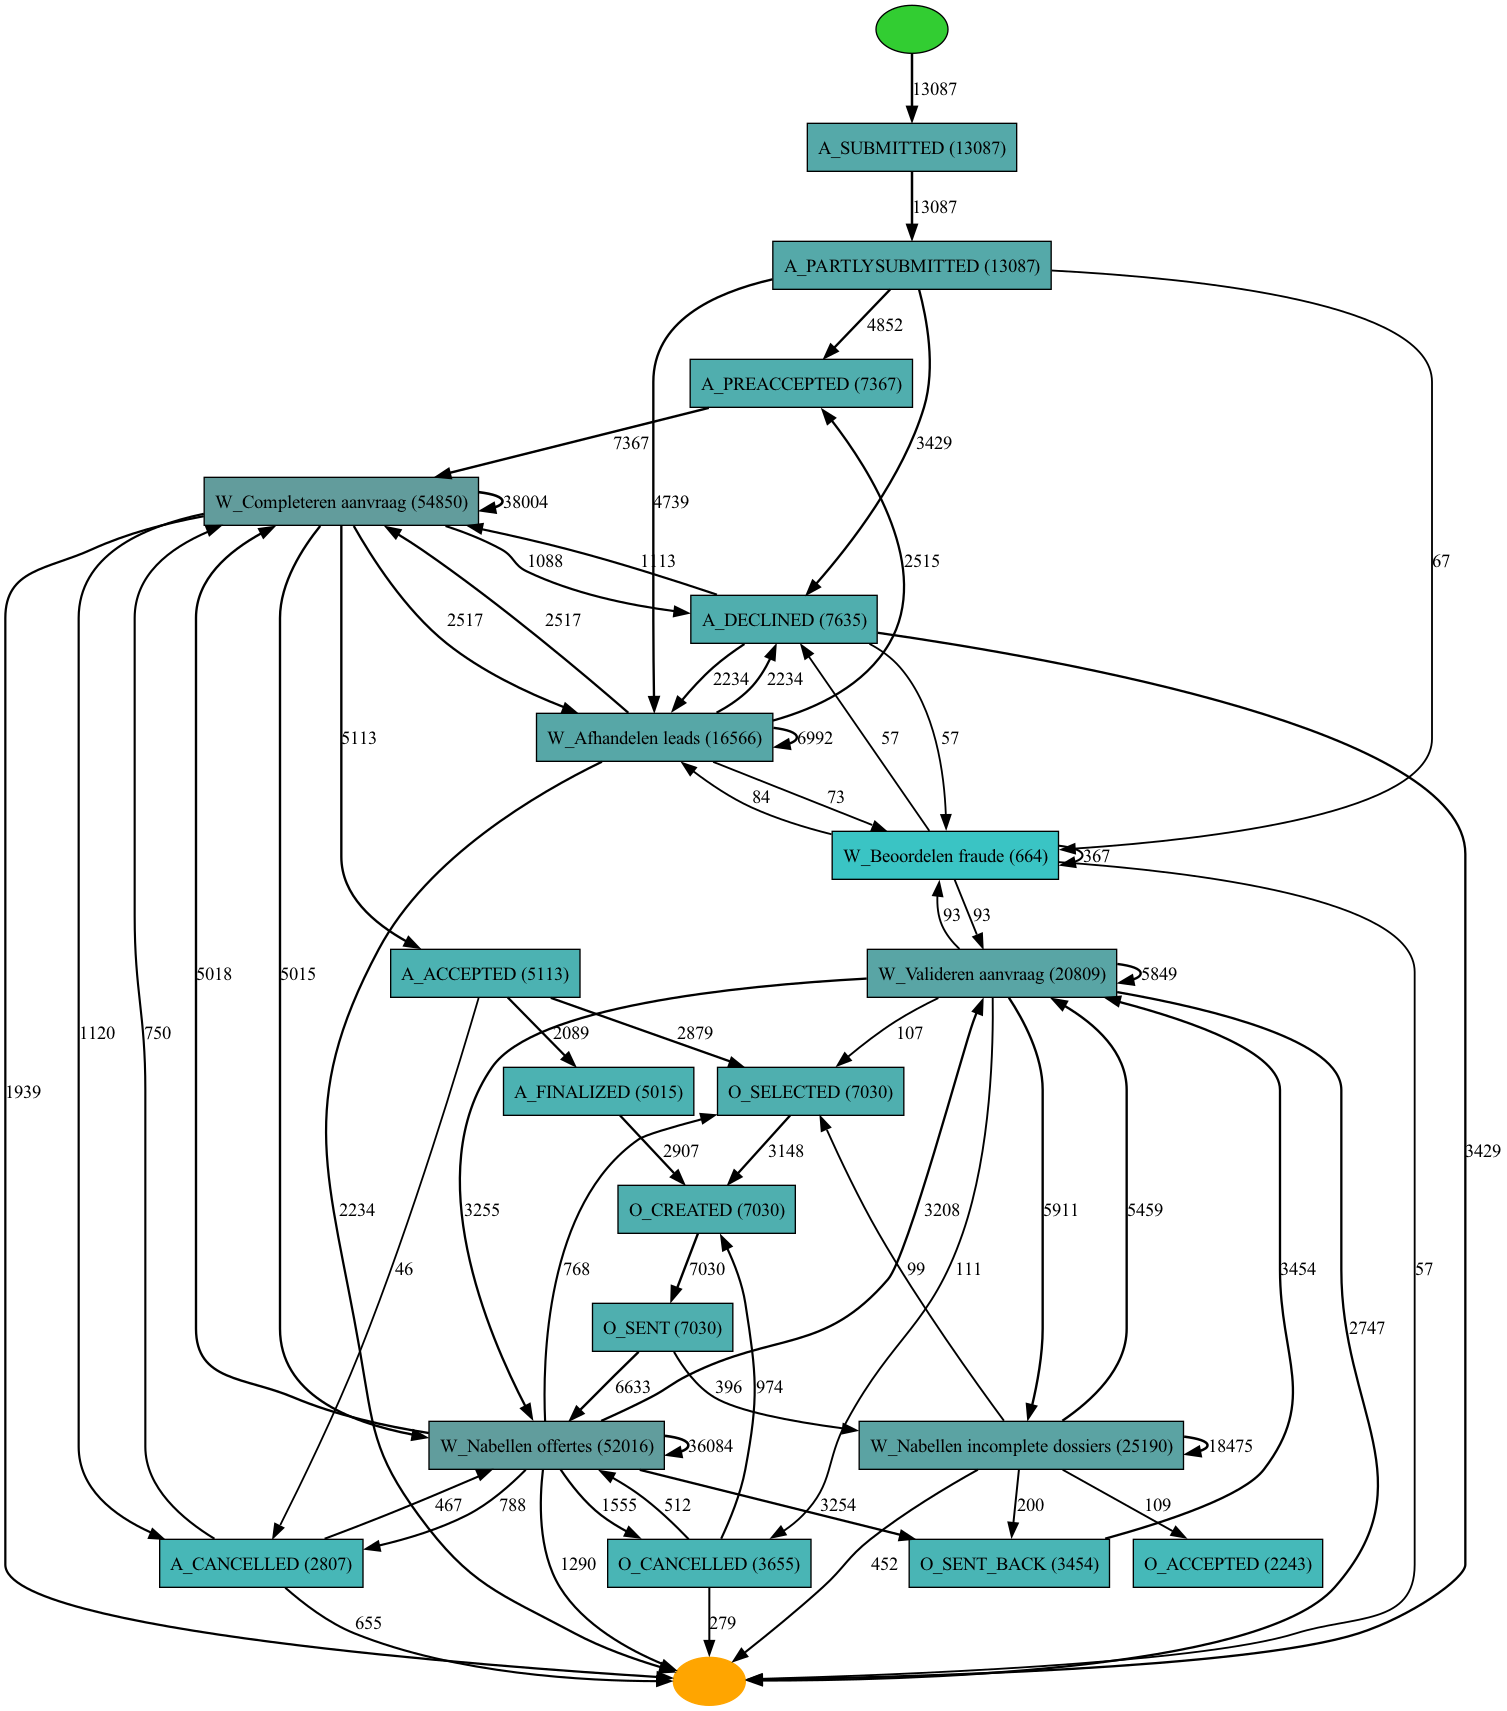

In [70]:
# Apply the Heuristic Miner algorithm to discover a process model from the event log.
# The parameters specify thresholds for different measures used by the algorithm.
heu_net = heuristics_miner.apply_heu(
    log, 
    parameters={
        # Dependency threshold: a pair of activities is considered dependent if their 
        # dependency measure is above this threshold.
        heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.92, 
        
        # AND measure threshold: this parameter determines the minimum threshold 
        # for the AND measure used to identify AND-splits.
        heuristics_miner.Variants.CLASSIC.value.Parameters.AND_MEASURE_THRESH: 0.95, 
        
        # Minimum DFG occurrences: only those edges in the directly-follows graph (DFG)
        # that occur at least this number of times are considered.
        heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_DFG_OCCURRENCES: 40,
        
        # DFG pre-cleaning noise threshold: edges in the DFG with a frequency lower 
        # than this threshold are considered noise and are removed.
        heuristics_miner.Variants.CLASSIC.value.Parameters.DFG_PRE_CLEANING_NOISE_THRESH: 0.02
    }
)

# Visualize the discovered process model using the Heuristic Net (HeuNet) model.
gviz = hn_visualizer.apply(heu_net)

# Display the visualization of the process model.
hn_visualizer.view(gviz)

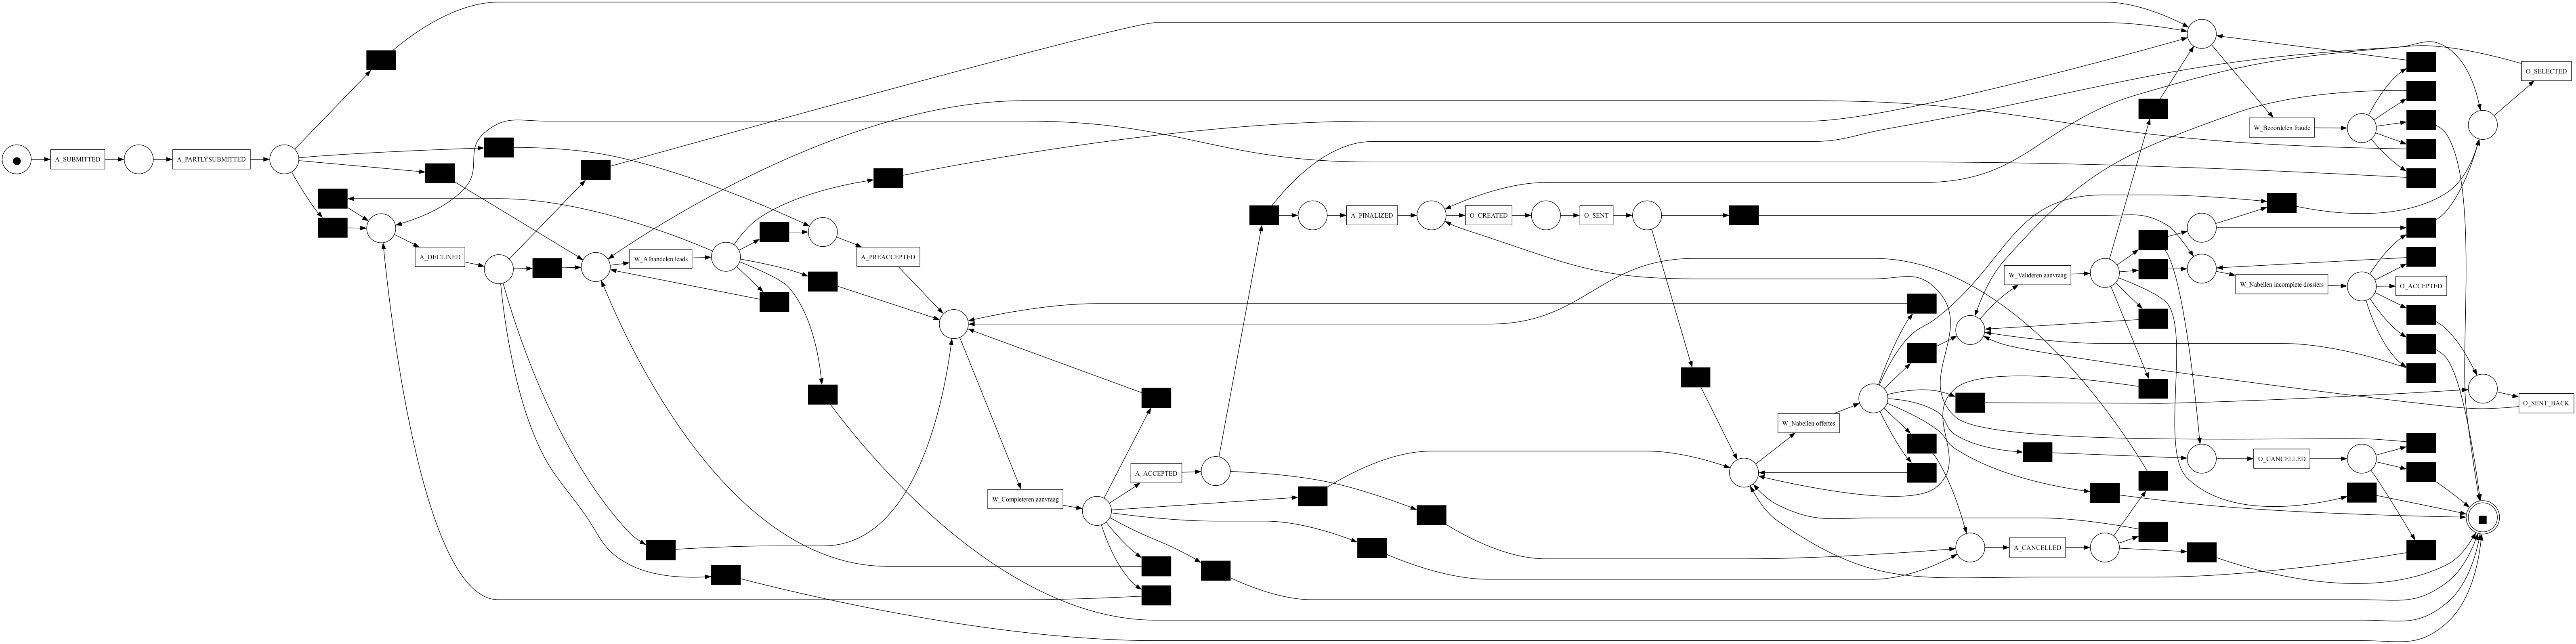

In [71]:
# Apply the Heuristic Miner algorithm to discover a process model from the event log.
# This method returns a process model, an initial marking, and a final marking.
net, im, fm = heuristics_miner.apply(
    log, 
    parameters={
        # Dependency threshold: a pair of activities is considered dependent if their 
        # dependency measure is above this threshold.
        heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.92, 
        
        # AND measure threshold: this parameter determines the minimum threshold 
        # for the AND measure used to identify AND-splits.
        heuristics_miner.Variants.CLASSIC.value.Parameters.AND_MEASURE_THRESH: 0.95, 
        
        # Minimum DFG occurrences: only those edges in the directly-follows graph (DFG)
        # that occur at least this number of times are considered.
        heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_DFG_OCCURRENCES: 40,
        
        # DFG pre-cleaning noise threshold: edges in the DFG with a frequency lower 
        # than this threshold are considered noise and are removed.
        heuristics_miner.Variants.CLASSIC.value.Parameters.DFG_PRE_CLEANING_NOISE_THRESH: 0.02
    }
)

# Visualize the discovered process model, including the Petri net, initial marking, and final marking.
gviz = pn_visualizer.apply(net, im, fm)

# Display the visualization of the Petri net model.
pn_visualizer.view(gviz)

/Users/shahriyar/miniconda3/envs/tensorflow/lib/python3.10/site-packages/pm4py/utils.py:538: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


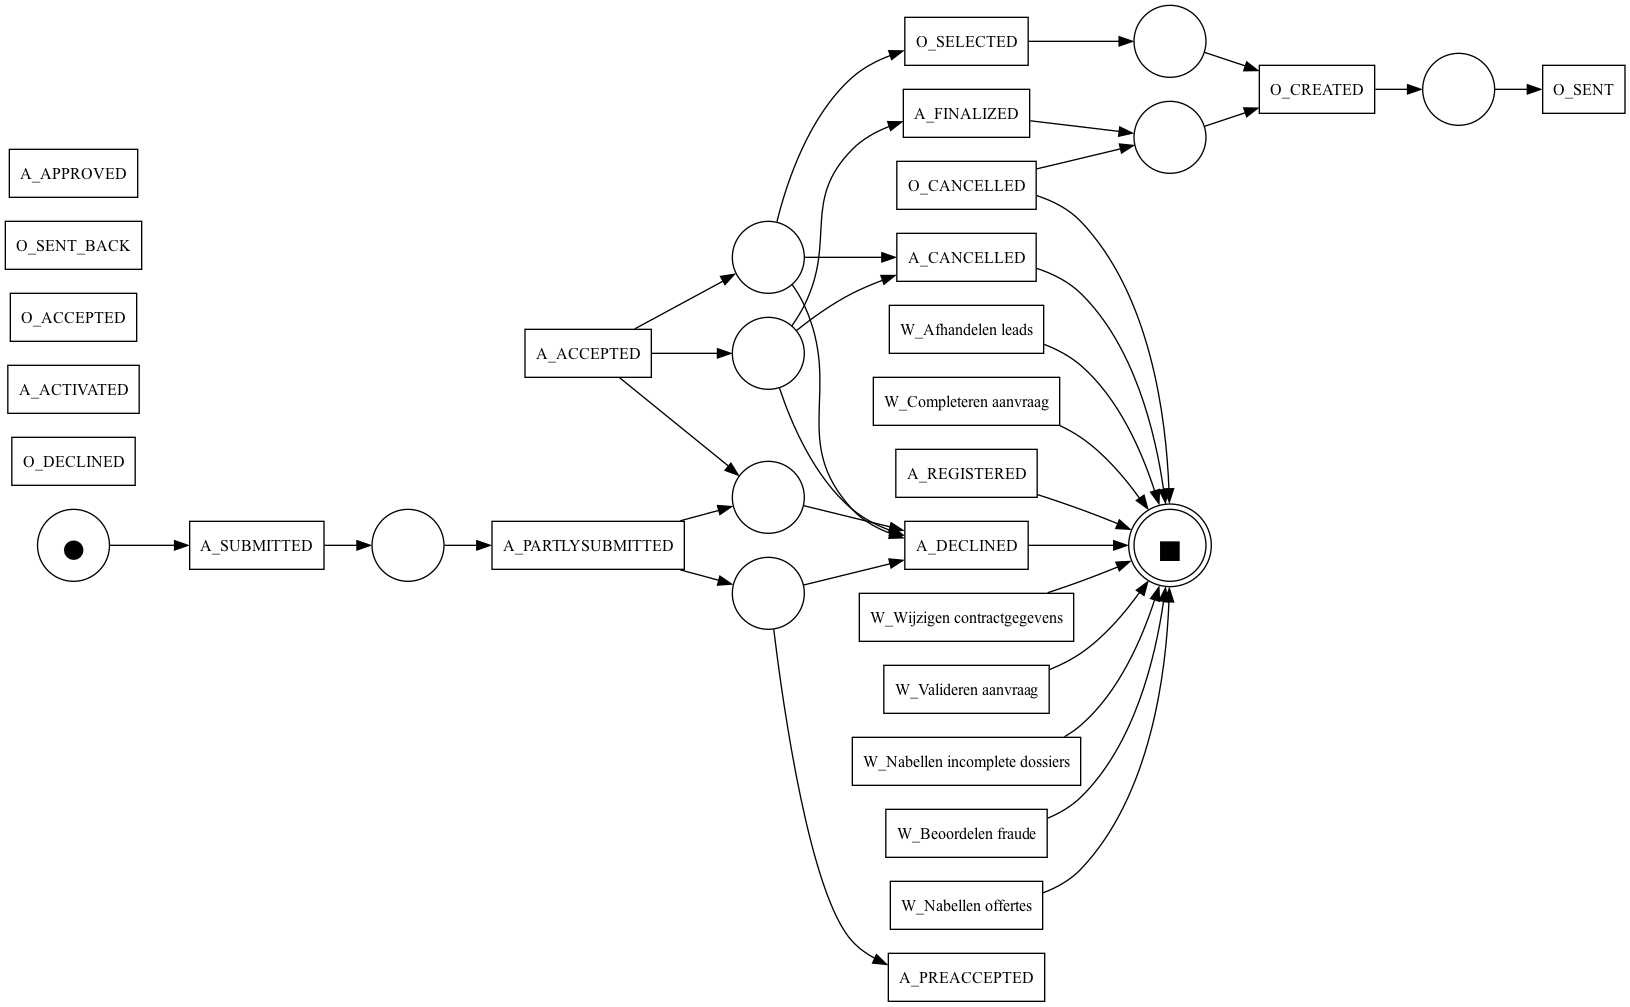

In [72]:
# Discover a Petri net from the event log using the Alpha Miner algorithm.
# This method returns a Petri net, an initial marking, and a final marking.
net2, im2, fm2 = pm4py.discover_petri_net_alpha(log)

# Visualize the discovered Petri net, including the Petri net, initial marking, and final marking.
pm4py.view_petri_net(net2, im2, fm2)

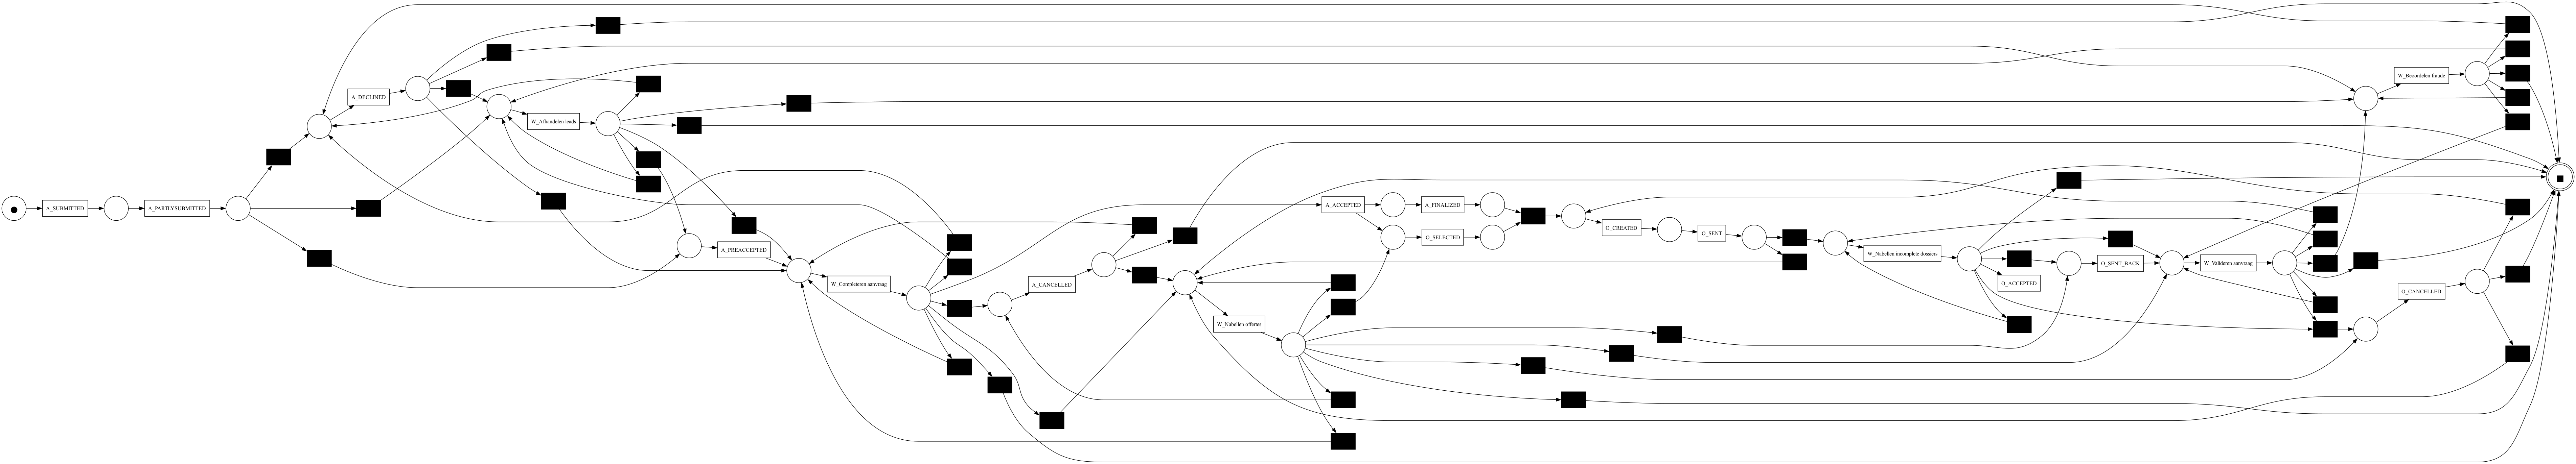

In [73]:
# Discover a Petri net from the event log using the Heuristic Miner algorithm.
# The dependency threshold is set to 0.99, which determines the minimum dependency value
# to consider for the process model. This method returns a Petri net, an initial marking, and a final marking.
net3, im3, fm3 = pm4py.discover_petri_net_heuristics(log, dependency_threshold=0.99)

# Visualize the discovered Petri net, including the Petri net, initial marking, and final marking.
pm4py.view_petri_net(net3, im3, fm3)

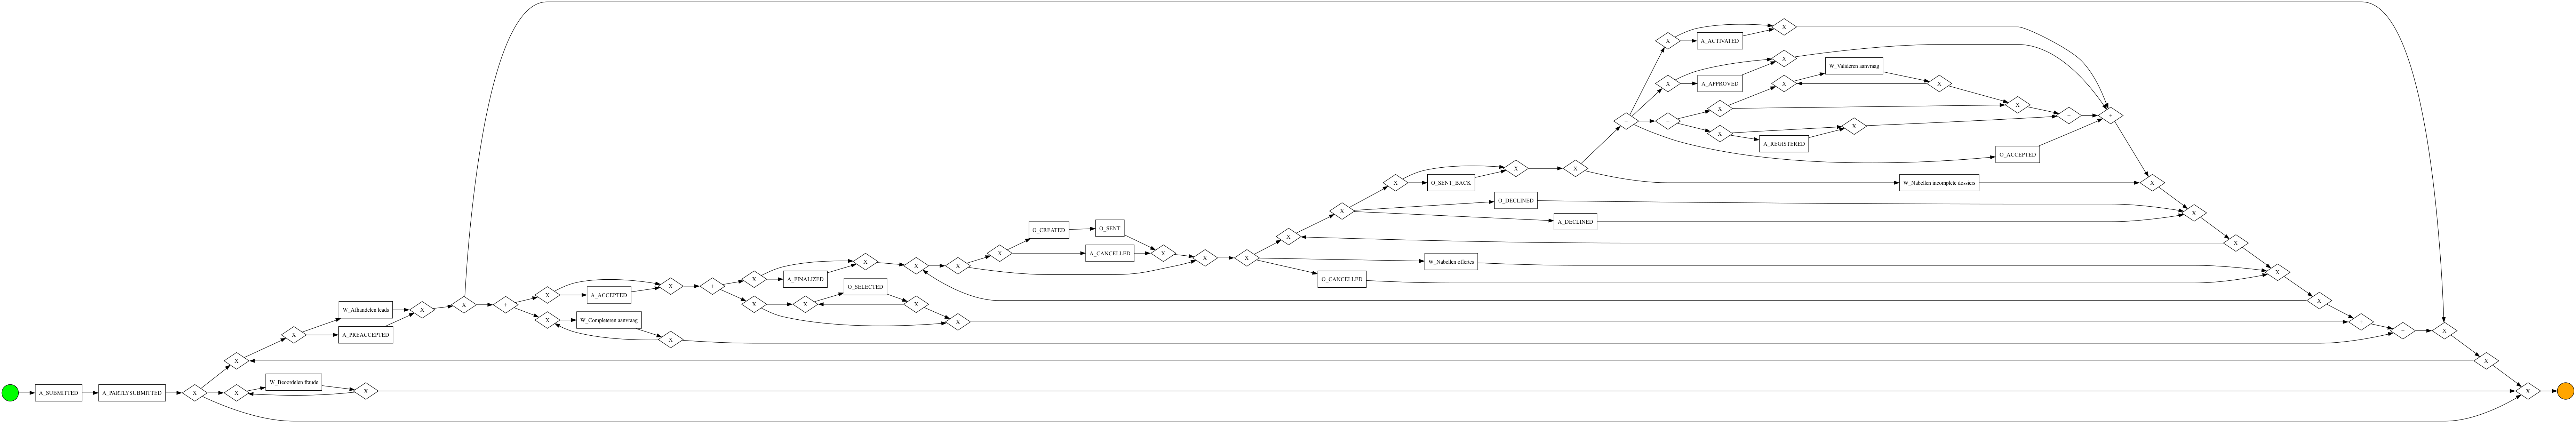

In [74]:
# Discover a BPMN model from the event log using the Inductive Miner algorithm.
# The parameter '0.4' is a threshold used by the algorithm, which influences the discovery process.
BPMN_model = pm4py.discover_bpmn_inductive(log, 0.4)

# Visualize the discovered BPMN model.
pm4py.view_bpmn(BPMN_model)

**Heuristics Miner**

In [75]:
# Calculate the fitness of a Petri net model using alignment-based fitness measures.
# This measures how well the Petri net model (net) aligns with the event log (log) based on the initial marking (im) and the final marking (fm).
fitness = pm4py.fitness_alignments(log, net, im, fm)

aligning log, completed variants ::   0%|          | 0/4366 [00:00<?, ?it/s]

In [79]:
# Print the fitness result to understand how well the Petri net model fits the event log
print(fitness)

{'percFitTraces': 61.26690609001299,
 'averageFitness': 0.9475025189043477,
 'percentage_of_fitting_traces': 61.26690609001299,
 'average_trace_fitness': 0.9475025189043477,
 'log_fitness': 0.916433074023081}

In [76]:
# Calculate precision of the Petri net model against the event log
precision = pm4py.precision_alignments(log, net, im, fm)

computing precision with alignments, completed variants ::   0%|          | 0/56841 [00:00<?, ?it/s]

In [80]:
# Print the precision result to understand the model's precision
print(precision)

0.42610534229197017

In [77]:
# Calculate the generalization of the Petri net model against the event log
generalization = generalization_evaluator.apply(log, net, im, fm)

replaying log with TBR, completed variants ::   0%|          | 0/4366 [00:00<?, ?it/s]

In [81]:
# Print the generalization result to understand the model's generalization
print(generalization)

0.9466933445774113

In [83]:
# Calculate the simplicity of the Petri net model
simplicity = simplicity_evaluator.apply(net)

In [84]:
# Print the simplicity result to understand the model's simplicity
print(simplicity)

0.5360824742268041

**Alpha Miner**

In [87]:
# Calculate the generalization of the Petri net model
generalization = generalization_evaluator.apply(log, net2, im2, fm2)

# Print the generalization result
print(generalization)

replaying log with TBR, completed variants ::   0%|          | 0/4366 [00:00<?, ?it/s]

0.9735932409545103

In [89]:
# Calculate the simplicity of the Petri net model
simplicity = simplicity_evaluator.apply(net2)

# Print the simplicity result
print(simplicity)

0.9444444444444446

**Petri Net Heuristic Miner**

In [90]:
# Calculate the fitness of the Petri net model
fitness = pm4py.fitness_evaluator.apply(log, net3, im3, fm3)

# Print the fitness result
print(fitness)

aligning log, completed variants ::   0%|          | 0/4366 [00:00<?, ?it/s]

{'percFitTraces': 62.076870176511044,
 'averageFitness': 0.9716590723642332,
 'percentage_of_fitting_traces': 62.076870176511044,
 'average_trace_fitness': 0.9716590723642332,
 'log_fitness': 0.9493165804491537}

In [91]:
# Calculate the precision of the Petri net model using the event log
precision = pm4py.precision_alignments(log, net3, im3, fm3)

# Print the precision value to evaluate how well the model aligns with the log
print(precision)

computing precision with alignments, completed variants ::   0%|          | 0/56841 [00:00<?, ?it/s]

0.45983863460758034

In [92]:
# Calculate the generalization of the Petri net model.
# Generalization evaluates how well the model generalizes to unseen cases.
generalization = generalization_evaluator.apply(log, net3, im3, fm3)

# Print the generalization score of the Petri net model, reflecting its ability to handle new, unseen cases.
print(generalization)

replaying log with TBR, completed variants ::   0%|          | 0/4366 [00:00<?, ?it/s]

0.9562067611239506

In [94]:
# Evaluate the simplicity of the Petri net model.
# Simplicity assesses how straightforward and understandable the model is, usually considering the number of elements and transitions.
simplicity = simplicity_evaluator.apply(net3)

# Print the simplicity score of the Petri net model, indicating its complexity in terms of structure.
print(simplicity)

0.551912568306011

### Performance Analysis

In [95]:
# Count the occurrences of each variant in the 'Variant' column and reset the index to create a DataFrame.
# 'Variant' represents different sequences of activities, and 'Iterations' is the count of each sequence.
trace_table = variant_df["Variant"].value_counts().reset_index()
trace_table.columns = ["Variant", "Iterations"]

# Sort the DataFrame by 'Iterations' in ascending order.
trace_table = trace_table.sort_values("Iterations")

# Calculate the cumulative percentage of each variant in relation to the total number of cases (13087).
# This helps in understanding the distribution of variants and identifying the most frequent patterns.
trace_table['Cumulative_Percentage'] = trace_table['Iterations'].cumsum() / 13087

# Display the DataFrame showing variants, their iteration counts, and their cumulative percentages.
trace_table

Variant  Iterations  \
2182                          abrrcsrsssdeklmtsttpit           1   
2901  abrrcsrsssdkelmtstttttttttttttttttttttttttttpi           1   
2902      abcssssssssssssssdkelmtstttttttttnutuofghu           1   
2903               abrrcsrsdkelmtstttttttttttnutujqu           1   
2904              abrrcsrsdeklmtstttttttnutuuuvuvqjv           1   
...                                              ...         ...   
4                                            abcssjs         160   
3                                         abrrcsrsjs         209   
2                                           abrrrrjr         271   
1                                             abrrjr        1872   
0                                                abj        3429   

      Cumulative_Percentage  
2182               0.000076  
2901               0.000153  
2902               0.000229  
2903               0.000306  
2904               0.000382  
...                     ...  
4                  0.558264  
3                  0.574234  
2                  0.594942  
1                  0.737984  
0                  1.000000  

[4366 rows x 3 columns]

In [96]:
# Filter the trace_table DataFrame to include only those variants where the cumulative percentage is greater than or equal to 50%.
# This identifies variants that together account for at least 50% of all cases, focusing on the most significant patterns.
filtered_df = trace_table[trace_table["Cumulative_Percentage"] >= 0.5]

# Display the filtered DataFrame which includes variants contributing to at least 50% of the total occurrences.
filtered_df

Variant  Iterations  Cumulative_Percentage
11      abrrrrrrjr          58               0.501948
10     abcssssssis          63               0.506762
9   abrrcsrsssssjs          74               0.512417
8        abcssssis          87               0.519065
7        abcssssjs          93               0.526171
6     abrrcsrsssjs         126               0.535799
5          abcssis         134               0.546038
4          abcssjs         160               0.558264
3       abrrcsrsjs         209               0.574234
2         abrrrrjr         271               0.594942
1           abrrjr        1872               0.737984
0              abj        3429               1.000000

In [97]:
# Import the event log from an XES file. This file contains event data that will be analyzed.
log = xes_importer.apply("BPI_Challenge_2012.xes")

# Convert the imported event log into a DataFrame format for easier manipulation and analysis.
# The variant TO_DATA_FRAME specifies that the log should be converted to a DataFrame representation.
df = log_converter.apply(log, variant=log_converter.Variants.TO_DATA_FRAME)

parsing log, completed traces ::   0%|          | 0/13087 [00:00<?, ?it/s]

In [98]:
# Filter the DataFrame `df` to include only the rows where the case IDs match those in `variant_df`
# that are present in `filtered_df` based on the variants. This essentially narrows down the data to
# cases that are associated with the filtered variants.
filtered_df = df[df["case:concept:name"].isin(list(variant_df[variant_df["Variant"].isin(list(filtered_df["Variant"]))]["Case_ID"]))]

# Display the first 5 rows of the filtered DataFrame to check the results of the filtering process.
filtered_df.head(5)

org:resource lifecycle:transition       concept:name  \
124          112             COMPLETE        A_SUBMITTED   
125          112             COMPLETE  A_PARTLYSUBMITTED   
126          112             COMPLETE         A_DECLINED   
127          112             COMPLETE        A_SUBMITTED   
128          112             COMPLETE  A_PARTLYSUBMITTED   

                      time:timestamp                    case:REG_DATE  \
124 2011-10-01 08:11:08.866000+00:00 2011-10-01 08:11:08.865000+00:00   
125 2011-10-01 08:11:09.035000+00:00 2011-10-01 08:11:08.865000+00:00   
126 2011-10-01 08:11:46.420000+00:00 2011-10-01 08:11:08.865000+00:00   
127 2011-10-01 08:15:39.894000+00:00 2011-10-01 08:15:39.894000+00:00   
128 2011-10-01 08:15:40.102000+00:00 2011-10-01 08:15:39.894000+00:00   

    case:concept:name case:AMOUNT_REQ  
124            173697           15000  
125            173697           15000  
126            173697           15000  
127            173700            5000  
128            173700            5000

In [99]:
# Convert the filtered DataFrame `filtered_df` back to an event log format compatible with PM4Py.
# This allows the filtered log to be used for further process mining analyses or visualizations.
filtered_log = pm4py.convert_to_event_log(filtered_df)

/Users/shahriyar/miniconda3/envs/tensorflow/lib/python3.10/site-packages/pm4py/utils.py:538: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


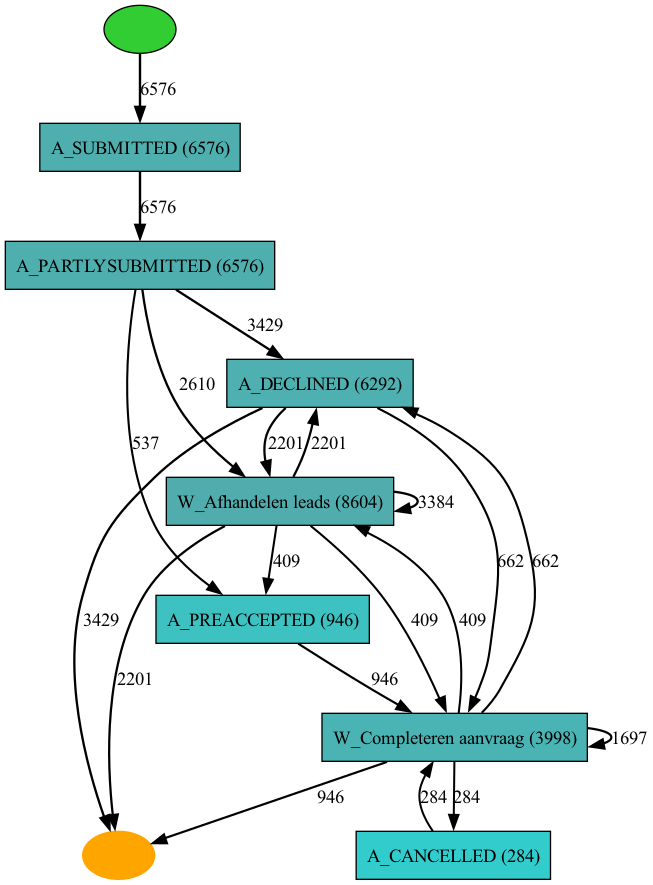

In [100]:
# Apply the Heuristics Miner to the filtered log to discover a process model based on heuristics.
# Parameters are set to configure the mining process:
# - DEPENDENCY_THRESH: Minimum threshold for dependency to consider in the model.
# - AND_MEASURE_THRESH: Minimum threshold for the AND measure in the model.
# - MIN_DFG_OCCURRENCES: Minimum number of occurrences required for a direct-follower graph edge.
# - DFG_PRE_CLEANING_NOISE_THRESH: Threshold to remove noise before creating the direct-follower graph.
heu_net = heuristics_miner.apply_heu(filtered_log, parameters={
    heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.92, 
    heuristics_miner.Variants.CLASSIC.value.Parameters.AND_MEASURE_THRESH: 0.95, 
    heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_DFG_OCCURRENCES: 40,
    heuristics_miner.Variants.CLASSIC.value.Parameters.DFG_PRE_CLEANING_NOISE_THRESH: 0.02
})

# Visualize the discovered process model using the Heuristics Miner.
# The visualization shows the discovered process model, which can help in understanding the process flows and dependencies.
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

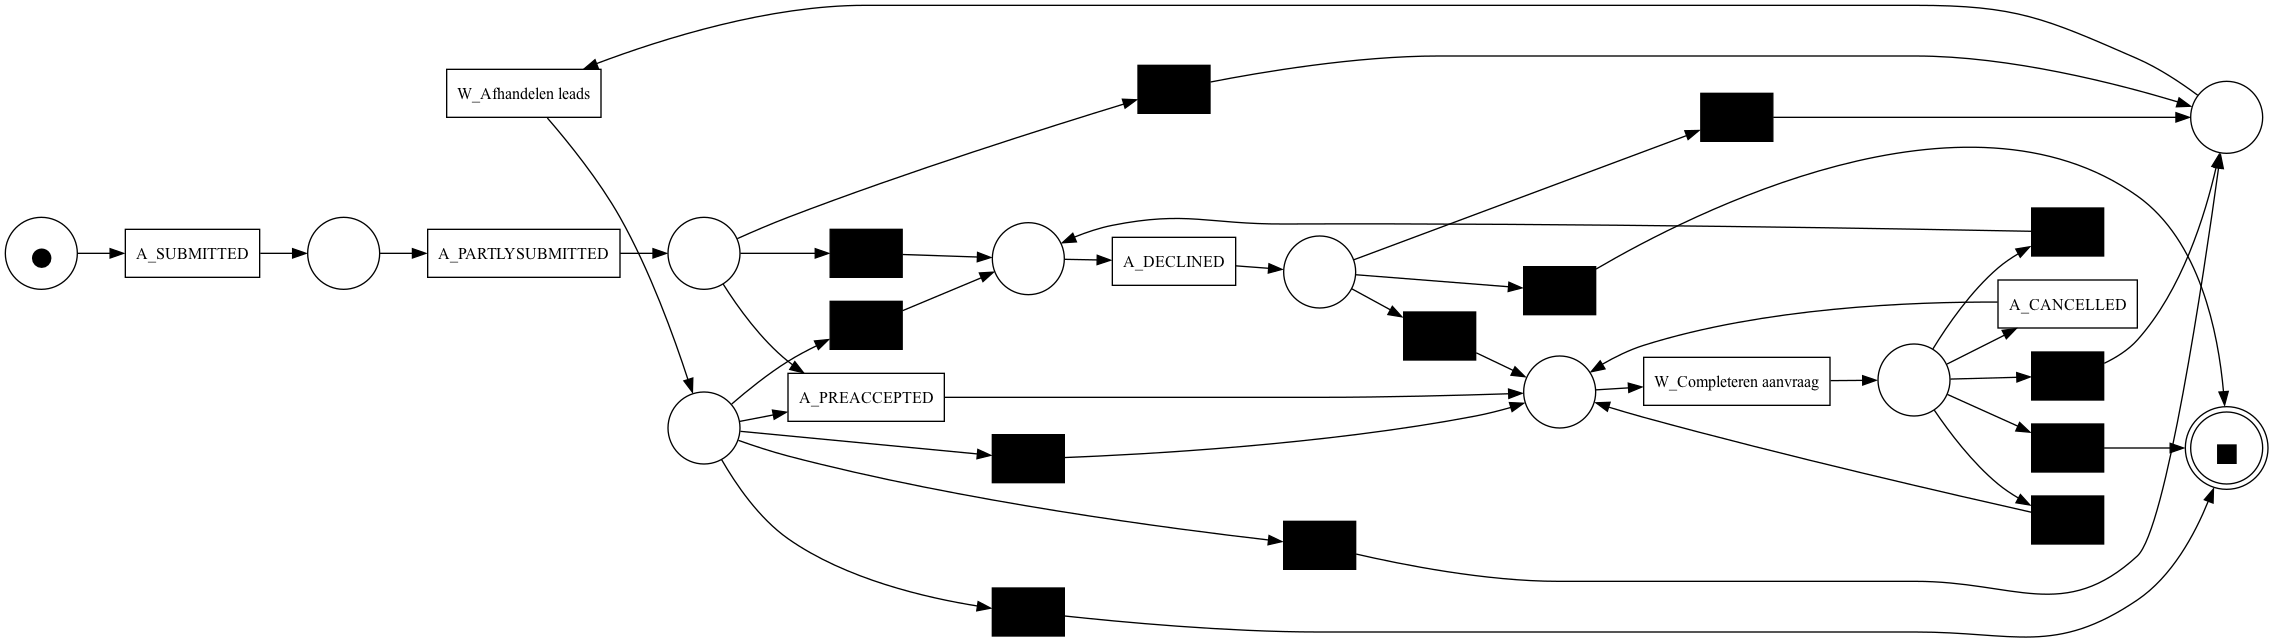

In [101]:
# Apply the Heuristics Miner to the filtered log to discover a Petri net model.
# Parameters are set to configure the mining process:
# - DEPENDENCY_THRESH: Minimum threshold for dependency to consider in the model.
# - AND_MEASURE_THRESH: Minimum threshold for the AND measure in the model.
# - MIN_DFG_OCCURRENCES: Minimum number of occurrences required for a direct-follower graph edge.
# - DFG_PRE_CLEANING_NOISE_THRESH: Threshold to remove noise before creating the direct-follower graph.
net, im, fm = heuristics_miner.apply(filtered_log, parameters={
    heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.92,
    heuristics_miner.Variants.CLASSIC.value.Parameters.AND_MEASURE_THRESH: 0.95,
    heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_DFG_OCCURRENCES: 40,
    heuristics_miner.Variants.CLASSIC.value.Parameters.DFG_PRE_CLEANING_NOISE_THRESH: 0.02
})

# Visualize the discovered Petri net model using the Petri net visualizer.
# The visualization helps to understand the process model, showing places, transitions, and arcs of the Petri net.
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)

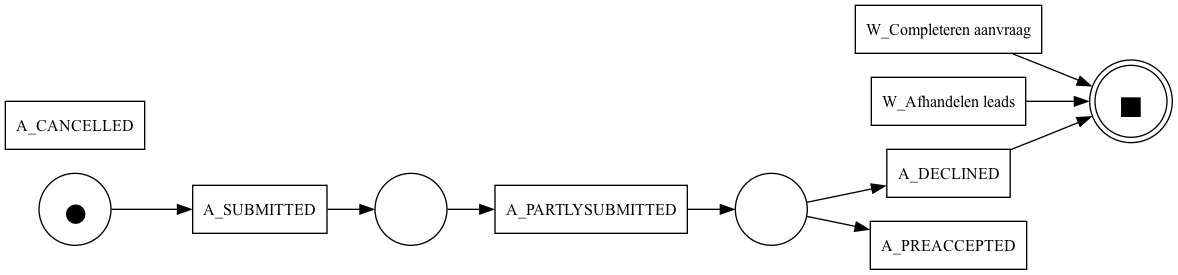

In [102]:
# Discover a Petri net model using the Alpha Miner algorithm on the filtered event log.
# The Alpha Miner algorithm is a classical approach for discovering process models from event logs.
net2, im2, fm2 = pm4py.discover_petri_net_alpha(filtered_log)

# Visualize the discovered Petri net model.
# This visualization provides insight into the discovered process model using places, transitions, and arcs.
pm4py.view_petri_net(net2, im2, fm2)

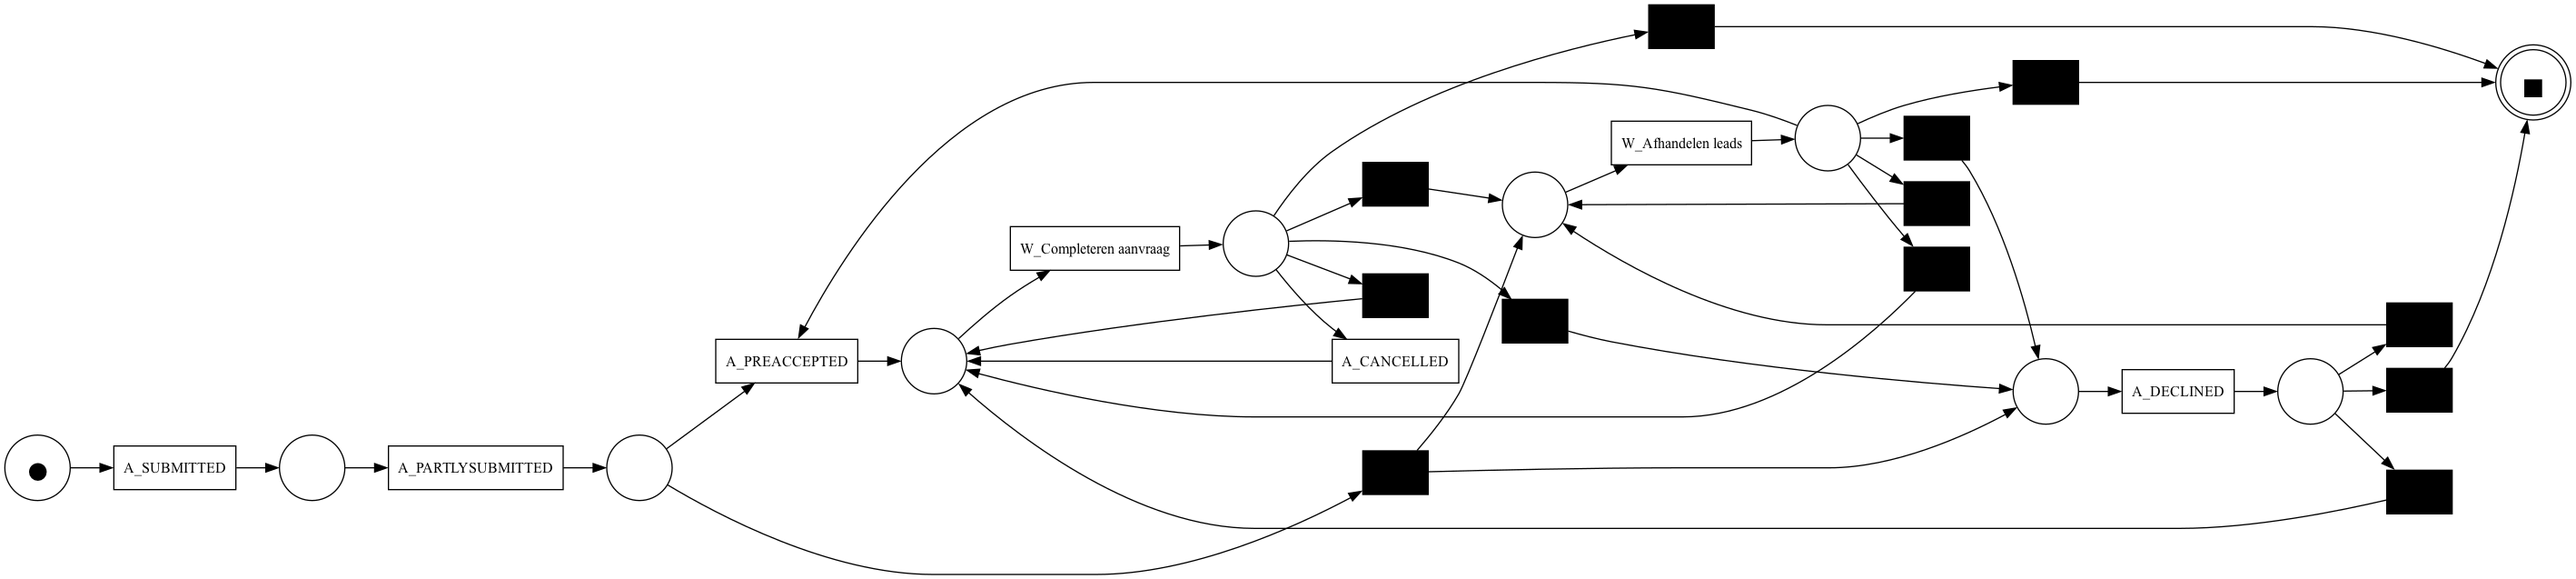

In [103]:
# Discover a Petri net model using the Heuristics Miner algorithm on the filtered event log.
# The Heuristics Miner algorithm is used to discover process models by identifying relationships and patterns between activities.
# The dependency_threshold parameter is set to 0.99 to include high-confidence dependencies between activities.
net3, im3, fm3 = pm4py.discover_petri_net_heuristics(filtered_log, dependency_threshold=0.99)

# Visualize the discovered Petri net model.
# This visualization shows the Petri net with places, transitions, and arcs, representing the process model derived from the filtered event log.
pm4py.view_petri_net(net3, im3, fm3)

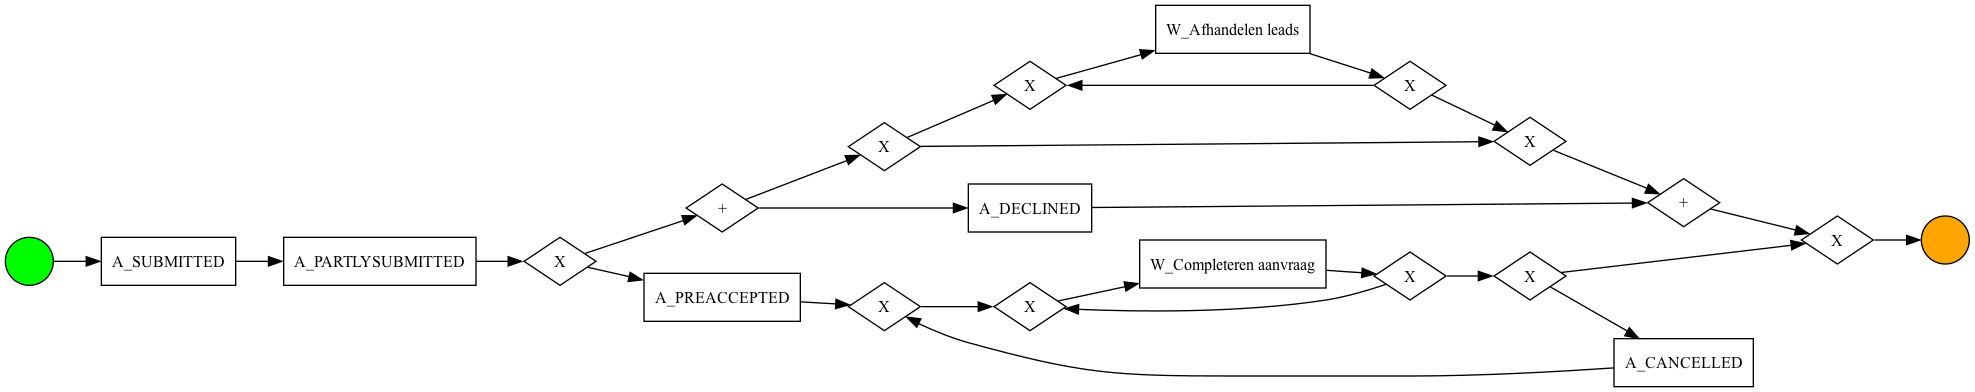

In [104]:
# Discover a BPMN model using the Inductive Miner algorithm on the filtered event log.
# The Inductive Miner algorithm is used to discover process models that fit the given event log, capturing the flow of activities in a BPMN (Business Process Model and Notation) format.
# The parameter 0.4 controls the level of abstraction for the model, with lower values resulting in more detailed models.
BPMN_model = pm4py.discover_bpmn_inductive(filtered_log, 0.4)

# Visualize the discovered BPMN model.
# This visualization displays the BPMN diagram, which includes elements such as tasks, gateways, and events, representing the business process flow derived from the filtered event log.
pm4py.view_bpmn(BPMN_model)

**Heuristics Miner**

In [112]:
# Compute the fitness of the Petri net model with respect to the filtered event log.
# Fitness measures how well the model (Petri net) aligns with the actual behavior observed in the event log.
# It indicates how well the model can reproduce the traces in the log, with higher values indicating better alignment.
fitness = pm4py.fitness_alignments(filtered_log, net, im, fm)

# Output the fitness measure.
# This will display the fitness score, providing an assessment of the model's accuracy in reflecting the observed process behavior.
fitness

aligning log, completed variants ::   0%|          | 0/12 [00:00<?, ?it/s]

{'percFitTraces': 85.61435523114355,
 'averageFitness': 0.9807436337814276,
 'percentage_of_fitting_traces': 85.61435523114355,
 'average_trace_fitness': 0.9807436337814276,
 'log_fitness': 0.9719731446856862}

In [113]:
# Compute the precision of the Petri net model with respect to the filtered event log.
# Precision measures the degree to which the model is able to avoid generating behavior that is not present in the event log.
# It indicates how well the model conforms to the observed traces, with higher values suggesting fewer deviations.
precision = pm4py.precision_alignments(filtered_log, net, im, fm)

# Output the precision measure.
# This will display the precision score, providing insight into how accurately the model represents the observed process without overgeneralizing.
precision

computing precision with alignments, completed variants ::   0%|          | 0/34 [00:00<?, ?it/s]

0.7689369043706868

In [114]:
# Evaluate the generalization of the Petri net model with respect to the filtered event log.
# Generalization measures how well the model can handle unseen or new cases. 
# It assesses the model's ability to generalize beyond the specific traces observed in the log.
# A higher generalization score indicates that the model can capture a broader range of possible behaviors.
generalization = generalization_evaluator.apply(filtered_log, net, im, fm)

# Output the generalization measure.
# This will display the generalization score, giving an indication of how well the model can generalize to new or unseen cases.
generalization

replaying log with TBR, completed variants ::   0%|          | 0/12 [00:00<?, ?it/s]

0.9738001972334686

In [115]:
# Evaluate the simplicity of the Petri net model.
# Simplicity measures how complex or simple the model is. 
# A simpler model is usually preferred as it is easier to understand and interpret, 
# while a more complex model may capture more details but can be harder to analyze and explain.
simplicity = simplicity_evaluator.apply(net)

# Output the simplicity measure.
# This will display the simplicity score of the Petri net model, indicating how complex or simple the model is.
simplicity

0.5769230769230769

**Alpha Miner**

In [117]:
# Evaluate the fitness of the Petri net model (net2) with respect to the filtered event log.
# Fitness measures how well the model aligns with the log data, i.e., how well the model fits the actual observed behavior.
# It assesses the extent to which the log's execution traces can be replayed on the model.
fitness = pm4py.fitness_alignments(filtered_log, net2, im2, fm2)

# Output the fitness measure.
# This will display the fitness score of the Petri net model (net2), indicating how well the model matches the log data.
fitness

aligning log, completed variants ::   0%|          | 0/12 [00:00<?, ?it/s]

{'percFitTraces': 52.144160583941606,
 'averageFitness': 0.8243379656875319,
 'percentage_of_fitting_traces': 52.144160583941606,
 'average_trace_fitness': 0.8243379656875319,
 'log_fitness': 0.7676024450984831}

In [118]:
# Evaluate the precision of the Petri net model (net2) with respect to the filtered event log.
# Precision measures how well the model avoids allowing traces that are not present in the log, i.e., it evaluates how well the model excludes traces not observed in the log.
# This metric indicates the model's ability to only generate the behaviors that are actually seen in the log.
precision = pm4py.precision_alignments(filtered_log, net2, im2, fm2)

# Output the precision measure.
# This will display the precision score of the Petri net model (net2), indicating how well the model prevents unexpected behaviors not found in the log data.
precision

computing precision with alignments, completed variants ::   0%|          | 0/34 [00:00<?, ?it/s]

0.38213084167070677

In [121]:
# Evaluate the generalization of the Petri net model (net2) using the generalization evaluator.
# Generalization measures how well the model is capable of handling unseen traces. It assesses whether the model is too specific to the training log or if it generalizes well to new, unseen data.
# A higher generalization score indicates that the model can handle new cases effectively, without overfitting to the specific traces seen in the training log.
generalization = generalization_evaluator.apply(filtered_log, net2, im2, fm2)

# Output the generalization measure.
# This will display the generalization score of the Petri net model (net2), showing how well the model performs on new or unseen data.
generalization

replaying log with TBR, completed variants ::   0%|          | 0/12 [00:00<?, ?it/s]

0.9777545708200884

In [123]:
# Evaluate the simplicity of the Petri net model (net2) using the simplicity evaluator.
# Simplicity measures how complex or simple the Petri net model is. A simpler model with fewer places and transitions is generally preferred, as it is easier to understand and maintain.
# The simplicity evaluator provides a metric that reflects how straightforward the model is, which can be useful for assessing whether the model is overly complex or appropriately simple.
simplicity = simplicity_evaluator.apply(net2)

# Output the simplicity measure.
# This will display the simplicity score of the Petri net model (net2), indicating how simple or complex the model is based on the evaluation criteria.
simplicity

1.0

**Petri Net Heuristic Miner**

In [125]:
# Evaluate the generalization of the Petri net model (net3) using the generalization evaluator.
# Generalization assesses how well the model can handle unseen or new cases compared to the cases it was trained on.
# A high generalization score indicates that the model can handle new cases effectively, while a low score may suggest that the model is overfitting to the training data.
# This metric helps determine whether the model is robust and adaptable to various scenarios beyond the specific cases in the filtered log.
generalization = generalization_evaluator.apply(filtered_log, net3, im3, fm3)

# Output the generalization measure.
# This will display the generalization score of the Petri net model (net3), providing insight into how well the model generalizes to new or unseen cases.
generalization

replaying log with TBR, completed variants ::   0%|          | 0/12 [00:00<?, ?it/s]

0.9208999376605815

In [126]:
# Evaluate the simplicity of the Petri net model (net3) using the simplicity evaluator.
# Simplicity measures how easy it is to understand and interpret the model. 
# Simpler models are generally preferred because they are easier to analyze and explain.
# This metric helps determine whether the Petri net is too complex or if it maintains a level of simplicity that is manageable and comprehensible.
simplicity = simplicity_evaluator.apply(net3)

# Output the simplicity measure.
# This will display the simplicity score of the Petri net model (net3), which indicates how simple and interpretable the model is.
simplicity

0.5686274509803921

### Process Performance Indicators

In [70]:
# Import the XES file containing the event log data into a PM4PY event log object.
# The "BPI_Challenge_2012.xes" file is a well-known event log used for process mining.
log = xes_importer.apply("BPI_Challenge_2012.xes")

# Convert the PM4PY event log object into a pandas DataFrame for easier manipulation and analysis.
# This DataFrame will have columns representing various event attributes such as case IDs, timestamps, activities, and resources.
df = log_converter.apply(log, variant=log_converter.Variants.TO_DATA_FRAME)

# Display the first 5 rows of the DataFrame to understand its structure and the data it contains.
df.head(5)

parsing log, completed traces ::   0%|          | 0/13087 [00:00<?, ?it/s]

org:resource lifecycle:transition            concept:name  \
0          112             COMPLETE             A_SUBMITTED   
1          112             COMPLETE       A_PARTLYSUBMITTED   
2          112             COMPLETE           A_PREACCEPTED   
3          112             SCHEDULE  W_Completeren aanvraag   
4          NaN                START  W_Completeren aanvraag   

                    time:timestamp                    case:REG_DATE  \
0 2011-10-01 00:38:44.546000+00:00 2011-10-01 00:38:44.546000+00:00   
1 2011-10-01 00:38:44.880000+00:00 2011-10-01 00:38:44.546000+00:00   
2 2011-10-01 00:39:37.906000+00:00 2011-10-01 00:38:44.546000+00:00   
3 2011-10-01 00:39:38.875000+00:00 2011-10-01 00:38:44.546000+00:00   
4 2011-10-01 11:36:46.437000+00:00 2011-10-01 00:38:44.546000+00:00   

  case:concept:name case:AMOUNT_REQ  
0            173688           20000  
1            173688           20000  
2            173688           20000  
3            173688           20000  
4            173688           20000

In [71]:
# Iterate over each unique activity name in the DataFrame.
# The column "concept:name" contains the names of activities in the event log.
for activity in df["concept:name"].unique():
    # Print the name of each unique activity to the console.
    # This helps to understand the different activities present in the log.
    print(activity)

A_SUBMITTED
A_PARTLYSUBMITTED
A_PREACCEPTED
W_Completeren aanvraag
A_ACCEPTED
O_SELECTED
A_FINALIZED
O_CREATED
O_SENT
W_Nabellen offertes
O_SENT_BACK
W_Valideren aanvraag
A_REGISTERED
A_APPROVED
O_ACCEPTED
A_ACTIVATED
O_CANCELLED
W_Wijzigen contractgegevens
A_DECLINED
A_CANCELLED
W_Afhandelen leads
O_DECLINED
W_Nabellen incomplete dossiers
W_Beoordelen fraude


In [72]:
# Define a mapping dictionary to rename activity names in the DataFrame.
# The keys are the original activity names, and the values are the new names.
mapping = {
    'O_CREATED': 'O_Offer_Sent',
    'O_SELECTED': 'O_Offer_Sent',
    'O_SENT': 'O_Offer_Sent',
    'A_SUBMITTED': 'A_Start_Application',
    'A_PARTLYSUBMITTED': 'A_Start_Application',
    'A_APPROVED': 'A_Credit_Approved',
    'A_ACTIVATED': 'A_Credit_Approved',
    'A_REGISTERED': 'A_Credit_Approved'
}

# Replace the values in the 'concept:name' column of the DataFrame using the mapping dictionary.
# This standardizes the activity names by grouping similar activities under a common name.
df['concept:name'] = df['concept:name'].replace(mapping)

In [73]:
# Filter the DataFrame to exclude rows where the 'concept:name' is 'W_Wijzigen contractgegevens'.
# This removes specific activities from the DataFrame that are not of interest.
df_filtered = df[df['concept:name'] != 'W_Wijzigen contractgegevens']

In [74]:
# Convert the filtered DataFrame back to an event log format
# This allows the processed data to be used for further process mining analysis.
filtered_log = pm4py.convert_to_event_log(df_filtered)

/Users/shahriyar/miniconda3/envs/tensorflow/lib/python3.10/site-packages/pm4py/utils.py:538: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


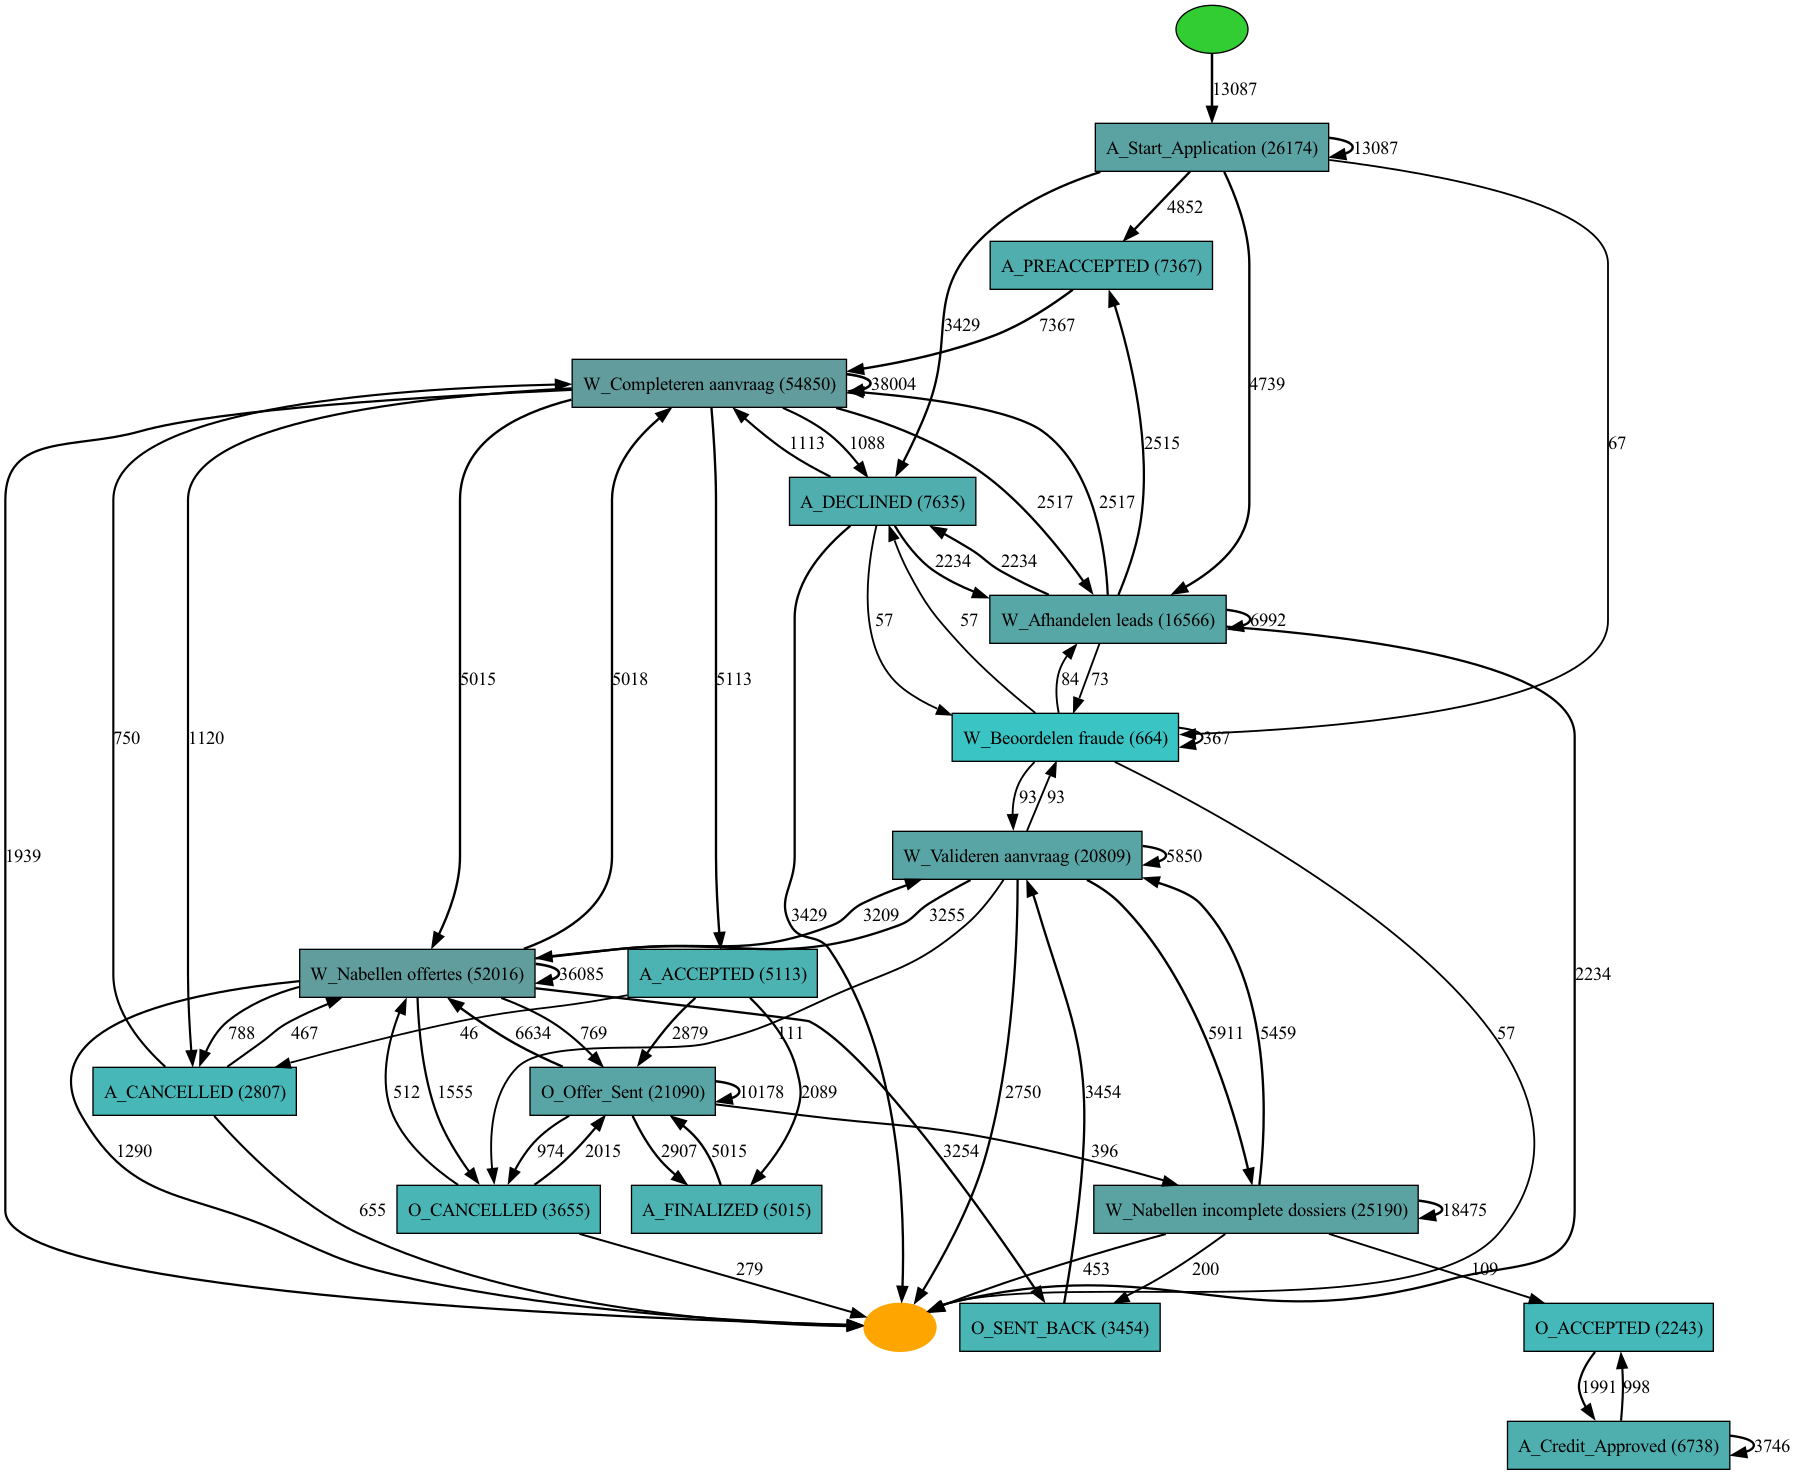

In [75]:
# Apply the Heuristics Miner algorithm to the filtered event log to discover a process model.
# Parameters are set to control the mining process, such as:
# - DEPENDENCY_THRESH: Threshold for dependency measure
# - AND_MEASURE_THRESH: Threshold for AND measure
# - MIN_DFG_OCCURRENCES: Minimum number of occurrences for an edge in the Directly-Follows Graph (DFG)
# - DFG_PRE_CLEANING_NOISE_THRESH: Threshold for noise removal in the DFG

heu_net = heuristics_miner.apply_heu(filtered_log, parameters={
    heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.92, 
    heuristics_miner.Variants.CLASSIC.value.Parameters.AND_MEASURE_THRESH: 0.95, 
    heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_DFG_OCCURRENCES: 40,
    heuristics_miner.Variants.CLASSIC.value.Parameters.DFG_PRE_CLEANING_NOISE_THRESH: 0.02
})

# Visualize the resulting process model using the Heuristics Miner visualization tool
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

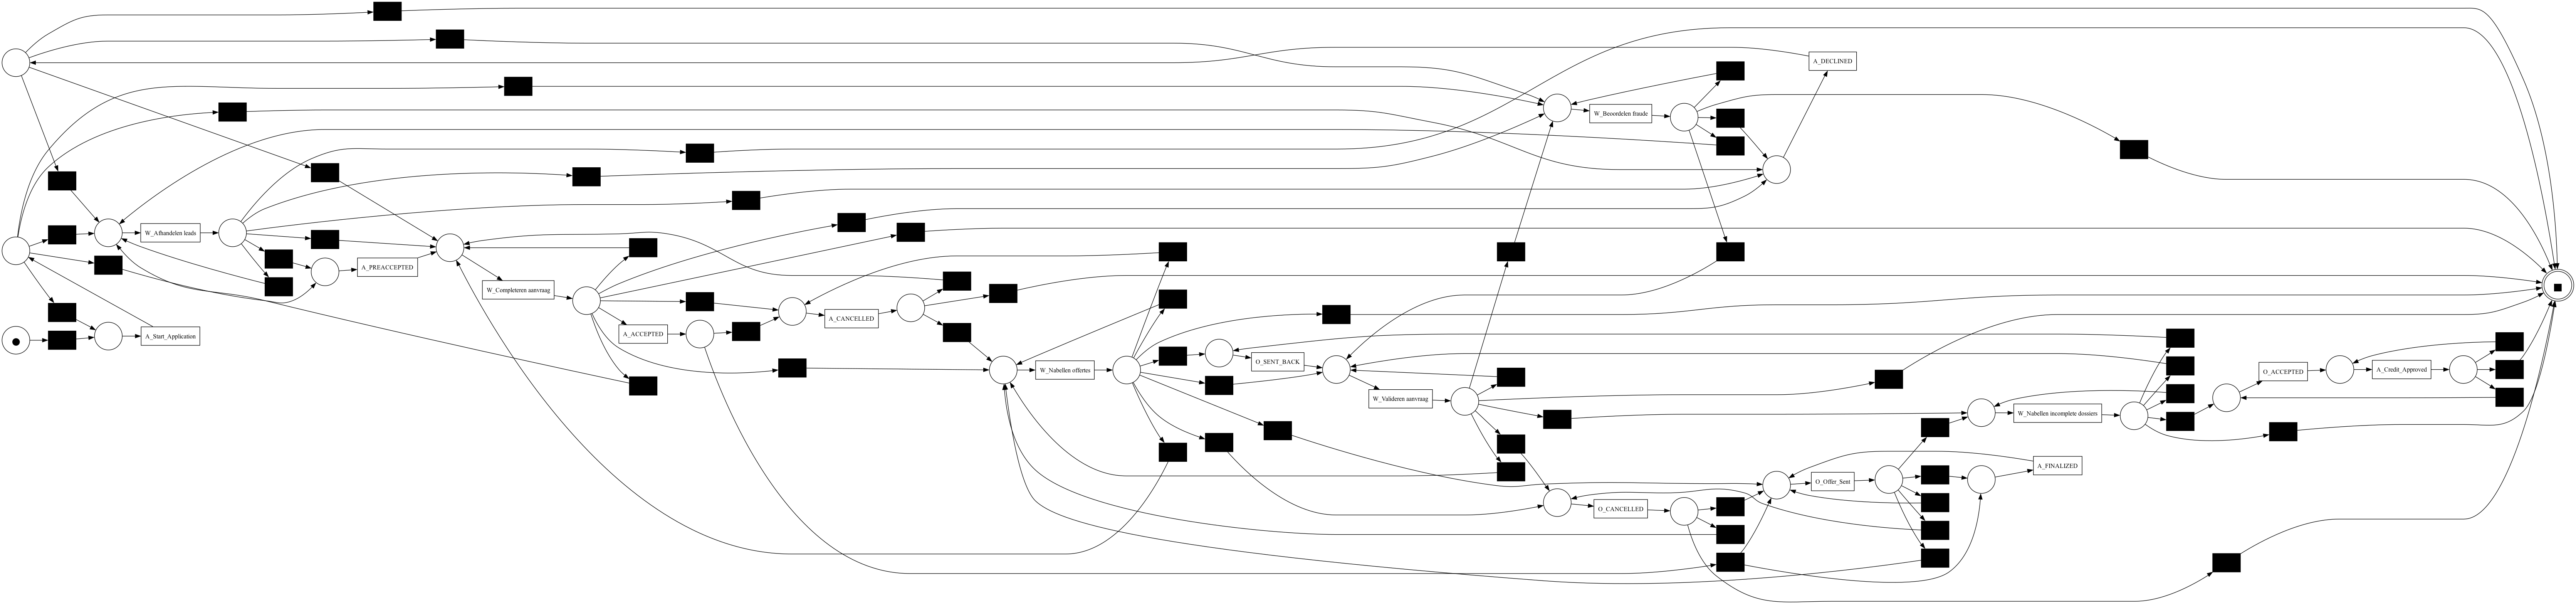

In [76]:
# Apply the Heuristics Miner algorithm to the filtered event log to discover a process model.
# The parameters control the mining process similarly to the previous code:
# - DEPENDENCY_THRESH: Threshold for dependency measure
# - AND_MEASURE_THRESH: Threshold for AND measure
# - MIN_DFG_OCCURRENCES: Minimum number of occurrences for an edge in the Directly-Follows Graph (DFG)
# - DFG_PRE_CLEANING_NOISE_THRESH: Threshold for noise removal in the DFG

net, im, fm = heuristics_miner.apply(filtered_log, parameters={
    heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.92,
    heuristics_miner.Variants.CLASSIC.value.Parameters.AND_MEASURE_THRESH: 0.95,
    heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_DFG_OCCURRENCES: 40,
    heuristics_miner.Variants.CLASSIC.value.Parameters.DFG_PRE_CLEANING_NOISE_THRESH: 0.02
})

# Visualize the resulting process model using the Petri Net visualization tool
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)

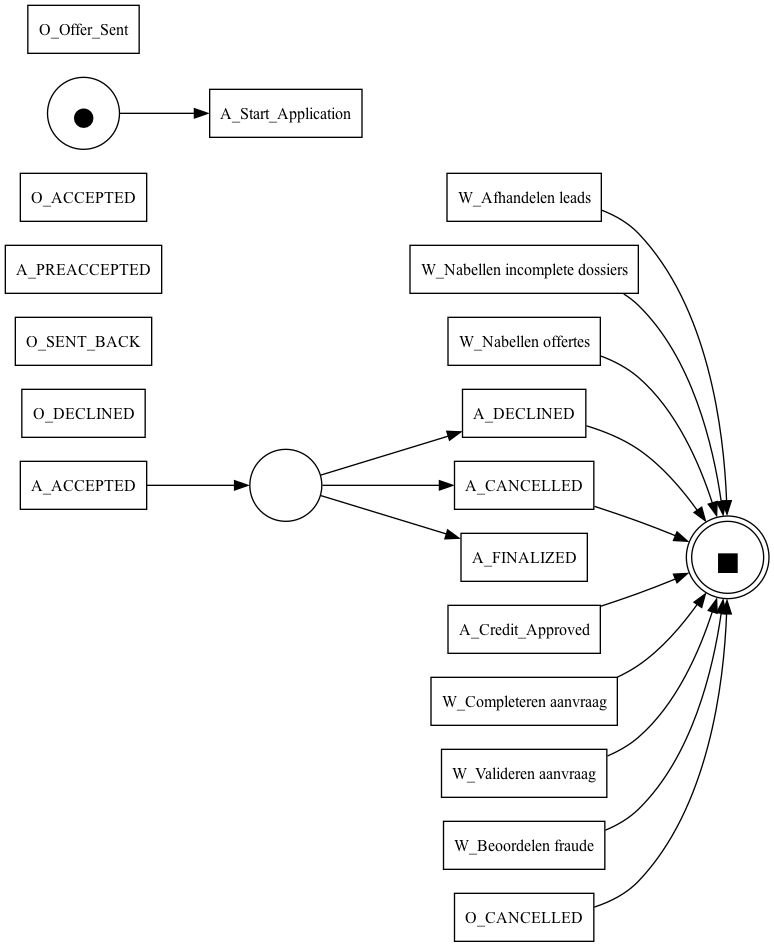

In [77]:
# Discover a Petri net using the Alpha algorithm from the filtered event log
# The Alpha algorithm is a classical approach for process discovery that generates a Petri net model
net2, im2, fm2 = pm4py.discover_petri_net_alpha(filtered_log)

# Visualize the discovered Petri net
# This will display a graphical representation of the Petri net to understand the process model
pm4py.view_petri_net(net2, im2, fm2)

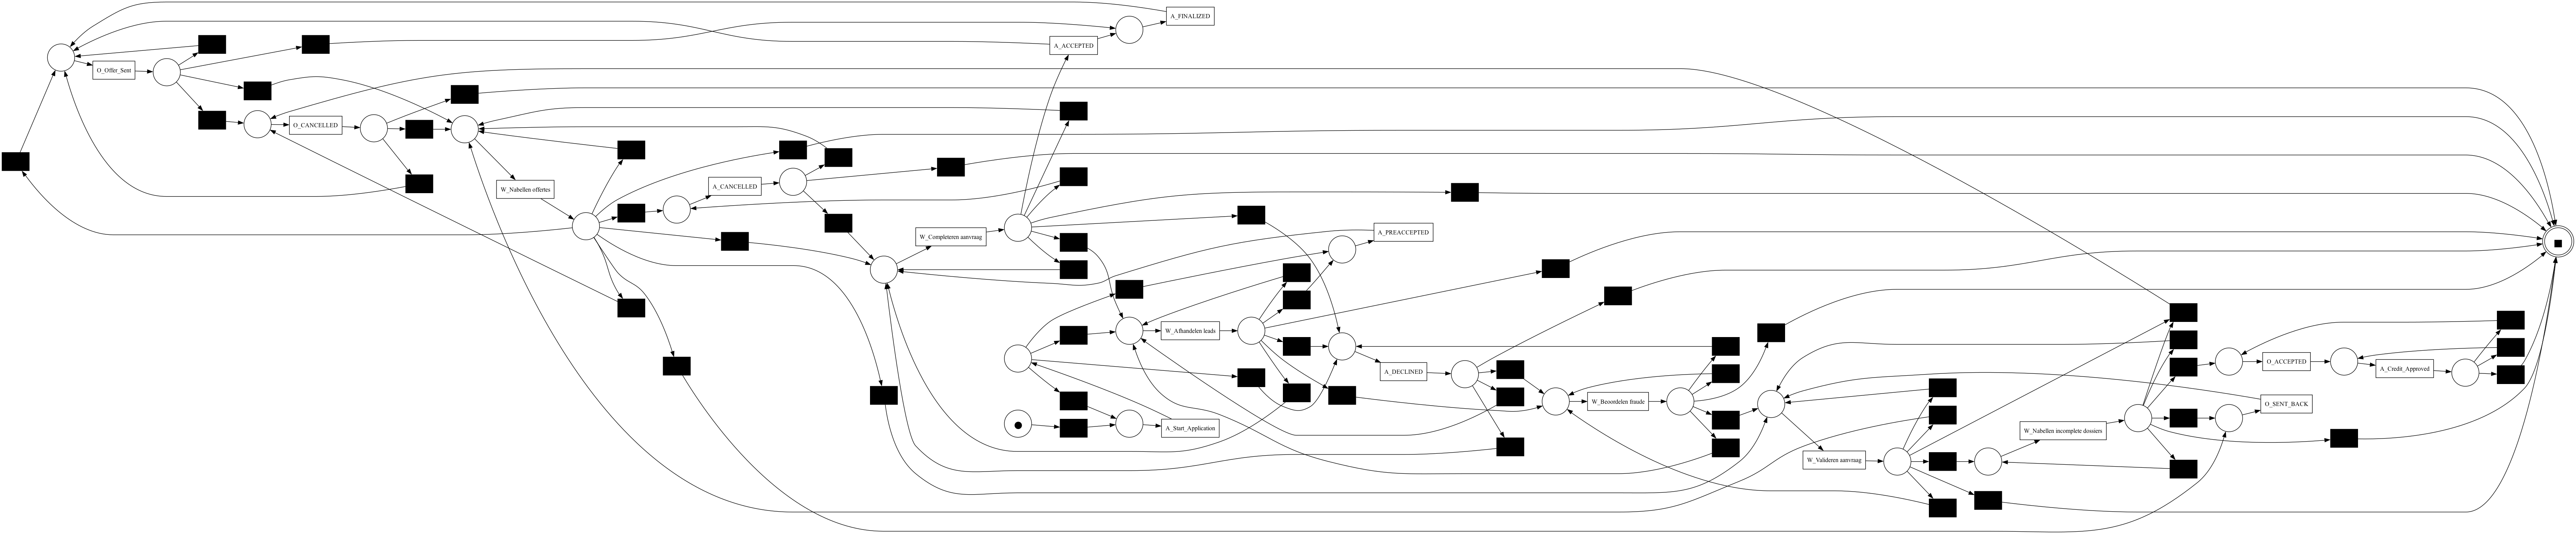

In [78]:
# Discover a Petri net using the Heuristics Miner algorithm from the filtered event log
# The Heuristics Miner algorithm is used for discovering process models from event logs and is particularly
# useful for handling noise and incomplete data. The `dependency_threshold` parameter helps in filtering out
# less frequent dependencies.
net3, im3, fm3 = pm4py.discover_petri_net_heuristics(filtered_log, dependency_threshold=0.99)

# Visualize the discovered Petri net
# This will display a graphical representation of the Petri net to understand the process model
pm4py.view_petri_net(net3, im3, fm3)

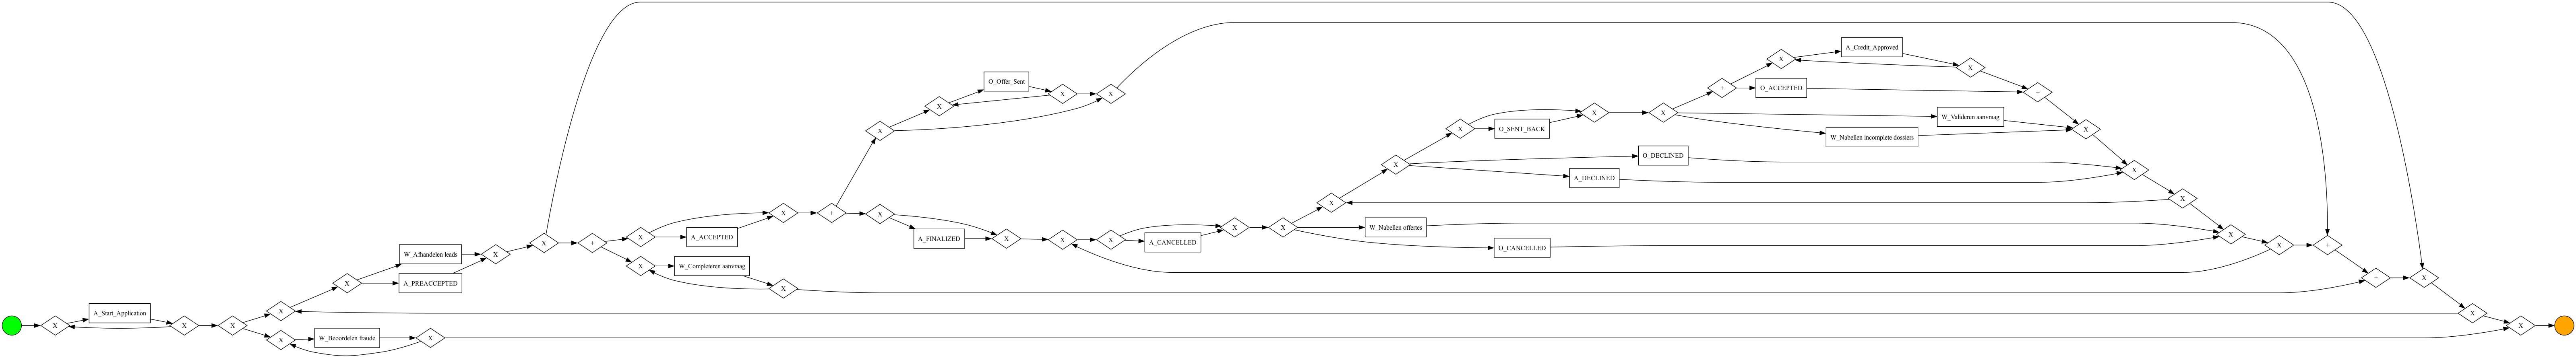

In [79]:
# Discover a BPMN model using the inductive miner algorithm from the filtered event log
# The inductive miner is used to discover BPMN models which provide a high-level view of the process.
# The parameter 0.4 is the noise threshold, which helps in filtering out less frequent patterns.
BPMN_model = pm4py.discover_bpmn_inductive(filtered_log, 0.4)

# Visualize the discovered BPMN model
# This will display a graphical representation of the BPMN model, allowing for an understanding of the business process
pm4py.view_bpmn(BPMN_model)

**Heuristics Miner**

In [163]:
# Calculate the fitness of the Petri net model against the filtered event log.
# Fitness measures how well the model fits the event log. 
# It compares the behavior recorded in the event log with the behavior allowed by the Petri net.
fitness = pm4py.fitness_alignments(filtered_log, net, im, fm)

# Output the fitness score.
# The result will indicate how well the Petri net aligns with the events in the log, 
# where higher values generally represent better alignment.
fitness

aligning log, completed variants ::   0%|          | 0/4128 [00:00<?, ?it/s]

{'percFitTraces': 61.26690609001299,
 'averageFitness': 0.9551550709194809,
 'percentage_of_fitting_traces': 61.26690609001299,
 'average_trace_fitness': 0.9551550709194809,
 'log_fitness': 0.9252023576720356}

# **Bottleneck Identification**

## **Advanced Process Analysis**

### Conformance Checking

In [81]:
# Create a copy of the original `variant_df` DataFrame to work with.
# This prevents any modifications to the original DataFrame.
reworks_df = variant_df.copy()

# Select only the columns of interest for the new DataFrame:
# - 'Case_ID': Identifier for each case
# - 'Variant': Variant of the case
# - 'Amount_Request': The amount requested in the case
reworks_df = reworks_df[["Case_ID", "Variant", "Amount_Request"]]

# Display the first 5 rows of the new DataFrame to verify the selected columns and data.
reworks_df.head(5)

Case_ID                                            Variant  Amount_Request
0  173688                         abcssdkelmtstttttnutugfohu         20000.0
1  173691            abcssssdeklmtstttkplmtttttnutuuuuuofghu          5000.0
2  173694  abcssssssssdeklmtstkplmtttttttttkplmtttttttttt...          7000.0
3  173697                                                abj         15000.0
4  173700                                                abj          5000.0

In [82]:
# Iterate over the list of activity names from the activities_map values.
# This assumes activities_map.values() contains a list of activity names.
for char in list(activities_map.values()):
    # Add a new column to the `reworks_df` DataFrame for each activity name.
    # Initialize these new columns with missing values (pd.NA).
    reworks_df[char] = pd.NA

# Display the first 5 rows of the updated DataFrame to verify the addition of new columns.
reworks_df.head(5)

Case_ID                                            Variant  Amount_Request  \
0  173688                         abcssdkelmtstttttnutugfohu         20000.0   
1  173691            abcssssdeklmtstttkplmtttttnutuuuuuofghu          5000.0   
2  173694  abcssssssssdeklmtstkplmtttttttttkplmtttttttttt...          7000.0   
3  173697                                                abj         15000.0   
4  173700                                                abj          5000.0   

      a     b     c     d     e     f     g  ...     o     p     q     r  \
0  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  ...  <NA>  <NA>  <NA>  <NA>   
1  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  ...  <NA>  <NA>  <NA>  <NA>   
2  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  ...  <NA>  <NA>  <NA>  <NA>   
3  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  ...  <NA>  <NA>  <NA>  <NA>   
4  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  ...  <NA>  <NA>  <NA>  <NA>   

      s     t     u     v     w     x  
0  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  
1  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  
2  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  
3  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  
4  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  

[5 rows x 27 columns]

In [83]:
# Iterate over the list of activity names from the activities_map values.
# This assumes activities_map.values() contains a list of activity names.
for char in list(activities_map.values()):
    # For each activity name, count its occurrences in the 'Variant' column of reworks_df.
    # The count is calculated using a lambda function applied to each row of the 'Variant' column.
    # The result is assigned to the corresponding new column in the reworks_df DataFrame.
    reworks_df[char] = reworks_df['Variant'].apply(lambda x: x.count(char))

# Display the first 5 rows of the updated DataFrame to verify the counts in the new columns.
reworks_df.head(5)

Case_ID                                            Variant  Amount_Request  \
0  173688                         abcssdkelmtstttttnutugfohu         20000.0   
1  173691            abcssssdeklmtstttkplmtttttnutuuuuuofghu          5000.0   
2  173694  abcssssssssdeklmtstkplmtttttttttkplmtttttttttt...          7000.0   
3  173697                                                abj         15000.0   
4  173700                                                abj          5000.0   

   a  b  c  d  e  f  g  ...  o  p  q  r  s   t  u  v  w  x  
0  1  1  1  1  1  1  1  ...  1  0  0  0  3   7  3  0  0  0  
1  1  1  1  1  1  1  1  ...  1  1  0  0  5  10  7  0  0  0  
2  1  1  1  1  1  1  1  ...  1  2  0  0  9  25  3  0  0  1  
3  1  1  0  0  0  0  0  ...  0  0  0  0  0   0  0  0  0  0  
4  1  1  0  0  0  0  0  ...  0  0  0  0  0   0  0  0  0  0  

[5 rows x 27 columns]

In [84]:
# Create a new column 'Activities_with_Reworks' in the reworks_df DataFrame.
# This column will contain lists of activity names that appear more than once in the 'Variant' column.
# For each row, check which columns (representing activities) have a count greater than 1.
# Use .index[row > 1] to get the names of these columns where the count is greater than 1.
# Convert these names into a list and assign it to the 'Activities_with_Reworks' column.
reworks_df['Activities_with_Reworks'] = reworks_df[list(activities_map.values())].apply(lambda row: row.index[row > 1].tolist(), axis=1)

# Display the first 5 rows of the updated DataFrame to verify the 'Activities_with_Reworks' column.
reworks_df.head(5)

Case_ID                                            Variant  Amount_Request  \
0  173688                         abcssdkelmtstttttnutugfohu         20000.0   
1  173691            abcssssdeklmtstttkplmtttttnutuuuuuofghu          5000.0   
2  173694  abcssssssssdeklmtstkplmtttttttttkplmtttttttttt...          7000.0   
3  173697                                                abj         15000.0   
4  173700                                                abj          5000.0   

   a  b  c  d  e  f  g  ...  p  q  r  s   t  u  v  w  x  \
0  1  1  1  1  1  1  1  ...  0  0  0  3   7  3  0  0  0   
1  1  1  1  1  1  1  1  ...  1  0  0  5  10  7  0  0  0   
2  1  1  1  1  1  1  1  ...  2  0  0  9  25  3  0  0  1   
3  1  1  0  0  0  0  0  ...  0  0  0  0   0  0  0  0  0   
4  1  1  0  0  0  0  0  ...  0  0  0  0   0  0  0  0  0   

   Activities_with_Reworks  
0                [s, t, u]  
1       [k, l, m, s, t, u]  
2    [k, l, m, p, s, t, u]  
3                       []  
4                       []  

[5 rows x 28 columns]

In [85]:
# Create a new column 'Number_of_Activities_with_Reworks' in the reworks_df DataFrame.
# This column will contain the count of activities that appear more than once in the 'Variant' column.
# For each row, check which columns (representing activities) have a count greater than 1.
# Use .index[row > 1] to get the names of these columns where the count is greater than 1.
# Convert these names into a list and calculate the length of this list to get the count of reworked activities.
# Assign this count to the 'Number_of_Activities_with_Reworks' column.
reworks_df['Number_of_Activities_with_Reworks'] = reworks_df[list(activities_map.values())].apply(lambda row: len(row.index[row > 1].tolist()), axis=1)

# Display the first 5 rows of the updated DataFrame to verify the 'Number_of_Activities_with_Reworks' column.
reworks_df.head(5)

Case_ID                                            Variant  Amount_Request  \
0  173688                         abcssdkelmtstttttnutugfohu         20000.0   
1  173691            abcssssdeklmtstttkplmtttttnutuuuuuofghu          5000.0   
2  173694  abcssssssssdeklmtstkplmtttttttttkplmtttttttttt...          7000.0   
3  173697                                                abj         15000.0   
4  173700                                                abj          5000.0   

   a  b  c  d  e  f  g  ...  q  r  s   t  u  v  w  x  Activities_with_Reworks  \
0  1  1  1  1  1  1  1  ...  0  0  3   7  3  0  0  0                [s, t, u]   
1  1  1  1  1  1  1  1  ...  0  0  5  10  7  0  0  0       [k, l, m, s, t, u]   
2  1  1  1  1  1  1  1  ...  0  0  9  25  3  0  0  1    [k, l, m, p, s, t, u]   
3  1  1  0  0  0  0  0  ...  0  0  0   0  0  0  0  0                       []   
4  1  1  0  0  0  0  0  ...  0  0  0   0  0  0  0  0                       []   

   Number_of_Activities_with_Reworks  
0                                  3  
1                                  6  
2                                  7  
3                                  0  
4                                  0  

[5 rows x 29 columns]

In [86]:
# Sort the 'reworks_df' DataFrame by the 'Number_of_Activities_with_Reworks' column in descending order.
# This will place the rows with the highest number of activities that have been reworked at the top.
# Select specific columns to display: 'Case_ID', 'Amount_Request', 'Activities_with_Reworks', and 'Number_of_Activities_with_Reworks'.
# Show the top 20 rows of the sorted DataFrame to review cases with the highest rework counts.
reworks_df.sort_values("Number_of_Activities_with_Reworks", ascending=False)[["Case_ID", "Amount_Request", "Activities_with_Reworks", "Number_of_Activities_with_Reworks"]].head(20)

Case_ID  Amount_Request            Activities_with_Reworks  \
1634   178843         10000.0  [k, l, m, n, p, r, s, t, u, v, x]   
1968   179885         35000.0     [k, l, m, n, p, r, s, t, u, v]   
5003   189280          7500.0     [k, l, m, n, p, r, s, t, u, v]   
10005  204859         32000.0     [k, l, m, n, p, r, s, t, u, v]   
3327   184087          7000.0     [k, l, m, n, p, r, s, t, u, v]   
1970   179899          3500.0     [k, l, m, n, r, s, t, u, v, w]   
4299   187076          7500.0     [k, l, m, n, p, r, s, t, u, v]   
9320   202740          3500.0     [k, l, m, n, p, r, s, t, u, v]   
10408  206135         10000.0     [k, l, m, n, p, r, s, t, u, v]   
3128   183471         25000.0     [k, l, m, n, p, r, s, t, u, v]   
7356   196623         23500.0     [k, l, m, n, p, r, s, t, u, v]   
9866   204442          6000.0     [k, l, m, n, p, r, s, t, u, v]   
5540   190956         15000.0     [k, l, m, n, p, r, s, t, u, v]   
9470   203206         15500.0     [k, l, m, n, p, r, s, t, u, v]   
1118   177206         21000.0     [k, l, m, p, r, s, t, u, v, w]   
5915   192115         30000.0     [k, l, m, n, p, r, s, t, u, v]   
8184   199165         30000.0     [k, l, m, n, p, r, s, t, u, v]   
10672  206937         13500.0     [k, l, m, n, p, r, s, t, u, v]   
9966   204742         15000.0     [k, l, m, n, p, r, s, t, u, v]   
12875  213738         10000.0     [k, l, m, n, p, r, s, t, u, v]   

       Number_of_Activities_with_Reworks  
1634                                  11  
1968                                  10  
5003                                  10  
10005                                 10  
3327                                  10  
1970                                  10  
4299                                  10  
9320                                  10  
10408                                 10  
3128                                  10  
7356                                  10  
9866                                  10  
5540                                  10  
9470                                  10  
1118                                  10  
5915                                  10  
8184                                  10  
10672                                 10  
9966                                  10  
12875                                 10

### Model Alignment

In [87]:
# Explode the 'Activities_with_Reworks' column to create a long-format list of individual activities.
# Drop any NA values that might be present.
# Convert the exploded list into a regular Python list for further processing.
merged_activities_list = reworks_df['Activities_with_Reworks'].explode().dropna().tolist()

# Initialize an empty dictionary to keep track of the count of each feature (activity).
feature_counts = {}

# Iterate over the list of activities, updating the count for each feature in the dictionary.
# If the feature (activity) is not already in the dictionary, initialize its count to 1.
# If it is already present, increment its count by 1.
for feature in merged_activities_list:
    feature_counts[feature] = feature_counts.get(feature, 0) + 1

# Convert the dictionary into a DataFrame for better readability and analysis.
# Each entry in the dictionary is turned into a row in the DataFrame with columns 'Feature' and 'Count'.
features_df = pd.DataFrame(list(feature_counts.items()), columns=['Feature', 'Count'])

# Sort the DataFrame by the 'Count' column in descending order.
# This will place the most frequently occurring features at the top.
features_df.sort_values("Count", ascending=False)

Feature  Count
0        s   7367
1        t   5011
7        r   4755
2        u   3210
8        v   1647
3        k   1438
4        l   1438
5        m   1438
6        p    749
9        n    197
10       w    108
11       x      4

## **Compliance Analysis**

### Process Enhancement

In [88]:
# Create a DataFrame containing only the columns 'Amount_Request' and 'Throughput_Float' from variant_df.
# This DataFrame is intended for correlation analysis between these two variables.
correlation_analysis = variant_df[["Amount_Request", "Throughput_Float"]]

# Display the first 5 rows of the DataFrame to inspect its contents.
correlation_analysis.head(5)

Amount_Request  Throughput_Float
0         20000.0         12.415885
1          5000.0          9.255977
2          7000.0        137.179815
3         15000.0          0.000435
4          5000.0          0.000476

In [89]:
# Calculate the Pearson correlation coefficient between 'Amount_Request' and 'Throughput_Float'
# This coefficient measures the linear relationship between the two variables.
correlation = correlation_analysis['Amount_Request'].corr(correlation_analysis['Throughput_Float'])

# Output the correlation coefficient to understand the strength and direction of the relationship.
correlation

0.13343028149532923

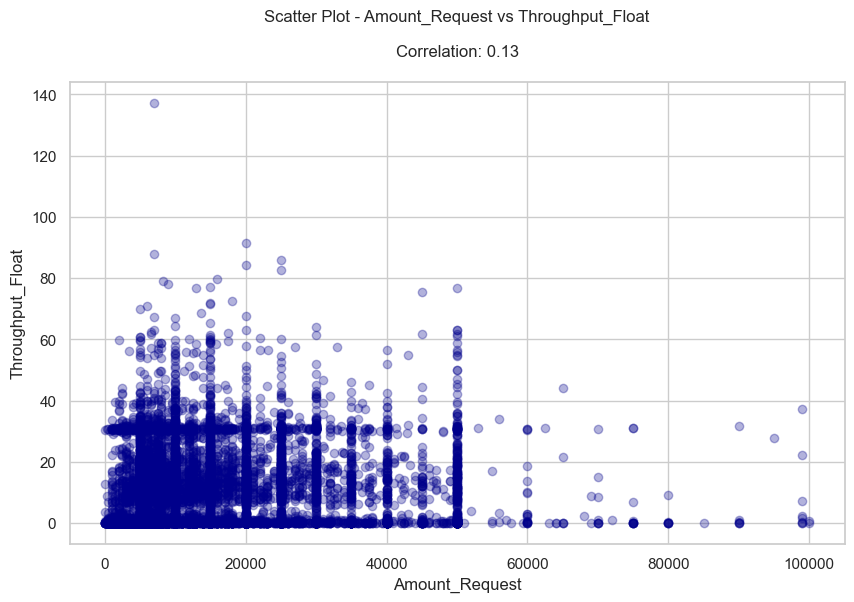

In [90]:
# Set up the figure for the scatter plot with a specified size
plt.figure(figsize=(10, 6))

# Create a scatter plot to visualize the relationship between 'Amount_Request' and 'Throughput_Float'
# 'alpha' parameter controls the transparency of the points, and 'color' specifies the color of the points
plt.scatter(correlation_analysis['Amount_Request'], correlation_analysis['Throughput_Float'], alpha=0.3, color="darkblue")

# Add a title to the scatter plot, including the computed correlation coefficient
plt.title(f'Scatter Plot - Amount_Request vs Throughput_Float\n\nCorrelation: {correlation:.2f}\n')

# Label the x-axis and y-axis
plt.xlabel('Amount_Request')
plt.ylabel('Throughput_Float')

# Enable the grid to make it easier to read the plot
plt.grid(True)

# Display the scatter plot
plt.show()

## **Optimization Suggestions**

### Future Process Improvement Strategies

In [91]:
# Create a copy of the variant_df DataFrame for further analysis
more_than_mean_df = variant_df.copy()

In [92]:
# Create an empty DataFrame to store unique resources per case
unique_resources_df = pd.DataFrame(columns=['Case_ID', 'Unique_Resources'])

# Group by 'Case_ID' and count the number of unique resources for each case
grouped_df = cat_df.groupby('Case_ID')['Resource'].nunique().reset_index()

# Add the number of unique resources to the 'more_than_mean_df' DataFrame
more_than_mean_df["Number_of_Unique_Resources"] = grouped_df["Resource"]

# Display the first 5 rows of the updated 'more_than_mean_df' DataFrame
more_than_mean_df.head(5)

Case_ID                                            Variant Start_Event  \
0  173688                         abcssdkelmtstttttnutugfohu           a   
1  173691            abcssssdeklmtstttkplmtttttnutuuuuuofghu           a   
2  173694  abcssssssssdeklmtstkplmtttttttttkplmtttttttttt...           a   
3  173697                                                abj           a   
4  173700                                                abj           a   

  End_Event  Amount_Request  Accepted  Declined  Cancelled  No_Decision  \
0         u         20000.0      True     False      False        False   
1         u          5000.0      True     False      False        False   
2         x          7000.0      True     False      False        False   
3         j         15000.0     False      True      False        False   
4         j          5000.0     False      True      False        False   

           Throughput_Time  Throughput_Float  Number_of_Unique_Resources  
0  12 days 09:58:52.480000         12.415885                           5  
1   9 days 06:08:36.377000          9.255977                           5  
2 137 days 04:18:56.012000        137.179815                          10  
3   0 days 00:00:37.555000          0.000435                           1  
4   0 days 00:00:41.143000          0.000476                           1

In [93]:
# Filter 'more_than_mean_df' to include only rows where 'Throughput_Float' is greater than its mean
more_than_mean_df = more_than_mean_df[more_than_mean_df["Throughput_Float"] > more_than_mean_df["Throughput_Float"].mean()]

# Display the first 5 rows of the filtered 'more_than_mean_df' DataFrame
more_than_mean_df.head(5)

Case_ID                                            Variant Start_Event  \
0  173688                         abcssdkelmtstttttnutugfohu           a   
1  173691            abcssssdeklmtstttkplmtttttnutuuuuuofghu           a   
2  173694  abcssssssssdeklmtstkplmtttttttttkplmtttttttttt...           a   
7  173709                                       abcssssssssi           a   
9  173715                           abcssssdkelmtstttnutujqu           a   

  End_Event  Amount_Request  Accepted  Declined  Cancelled  No_Decision  \
0         u         20000.0      True     False      False        False   
1         u          5000.0      True     False      False        False   
2         x          7000.0      True     False      False        False   
7         i         11000.0     False     False       True        False   
9         u         45000.0     False      True      False        False   

           Throughput_Time  Throughput_Float  Number_of_Unique_Resources  
0  12 days 09:58:52.480000         12.415885                           5  
1   9 days 06:08:36.377000          9.255977                           5  
2 137 days 04:18:56.012000        137.179815                          10  
7  30 days 23:17:25.393000         30.970433                           3  
9  12 days 01:06:17.581000         12.046037                           5

In [94]:
# Select specific columns from 'more_than_mean_df' to include in the resulting DataFrame
more_than_mean_df = more_than_mean_df[["End_Event", "Amount_Request", "Accepted", "Declined", "Cancelled", "No_Decision", "Throughput_Float", "Number_of_Unique_Resources"]]

# Display the first 5 rows of the updated 'more_than_mean_df' DataFrame
more_than_mean_df.head(5)

End_Event  Amount_Request  Accepted  Declined  Cancelled  No_Decision  \
0         u         20000.0      True     False      False        False   
1         u          5000.0      True     False      False        False   
2         x          7000.0      True     False      False        False   
7         i         11000.0     False     False       True        False   
9         u         45000.0     False      True      False        False   

   Throughput_Float  Number_of_Unique_Resources  
0         12.415885                           5  
1          9.255977                           5  
2        137.179815                          10  
7         30.970433                           3  
9         12.046037                           5

In [95]:
# Create a new column 'Combined_Status' based on the conditions of existing status columns.
# It assigns 'Accepted', 'Declined', 'Cancelled', or 'No_Decision' based on which of these columns has a truthy value.
more_than_mean_df['Combined_Status'] = more_than_mean_df.apply(lambda row: 'Accepted' if row['Accepted']
                                                               else 'Declined' if row['Declined']
                                                               else 'Cancelled' if row['Cancelled']
                                                               else 'No_Decision' if row['No_Decision']
                                                               else None, axis=1)

# Drop the individual status columns as they are now combined into 'Combined_Status'.
more_than_mean_df = more_than_mean_df.drop(['Accepted', 'Declined', 'Cancelled', 'No_Decision'], axis=1)

# Display the first 5 rows of the updated 'more_than_mean_df' DataFrame
more_than_mean_df.head(5)

End_Event  Amount_Request  Throughput_Float  Number_of_Unique_Resources  \
0         u         20000.0         12.415885                           5   
1         u          5000.0          9.255977                           5   
2         x          7000.0        137.179815                          10   
7         i         11000.0         30.970433                           3   
9         u         45000.0         12.046037                           5   

  Combined_Status  
0        Accepted  
1        Accepted  
2        Accepted  
7       Cancelled  
9        Declined

In [96]:
# Initialize a StandardScaler object for normalizing the data
scaler = StandardScaler()

# Reshape the 'Amount_Request' values to be a 2D array (required for scaler)
amount_request_values = more_than_mean_df["Amount_Request"].values.reshape(-1, 1)

# Scale the 'Amount_Request' column using the StandardScaler and update the DataFrame with the transformed values
more_than_mean_df["Amount_Request"] = scaler.fit_transform(amount_request_values)

# Reshape the 'Throughput_Float' values to be a 2D array (required for scaler)
throughput_values = more_than_mean_df["Throughput_Float"].values.reshape(-1, 1)

# Scale the 'Throughput_Float' column using the StandardScaler and update the DataFrame with the transformed values
more_than_mean_df["Throughput_Float"] = scaler.fit_transform(throughput_values)

# Display the updated DataFrame
more_than_mean_df

End_Event  Amount_Request  Throughput_Float  Number_of_Unique_Resources  \
0             u        0.355763         -0.822526                           5   
1             u       -0.892359         -1.110520                           5   
2             x       -0.725942         10.548458                          10   
7             i       -0.393110          0.868536                           3   
9             u        2.435965         -0.856233                           5   
...         ...             ...               ...                         ...   
13065         t        2.852005         -1.077981                           4   
13078         u       -0.642734         -0.710484                           4   
13080         t       -1.017171         -1.140189                           4   
13081         u       -0.892359         -0.814218                           7   
13085         t       -0.601130         -1.083991                           4   

      Combined_Status  
0            Accepted  
1            Accepted  
2            Accepted  
7           Cancelled  
9            Declined  
...               ...  
13065       Cancelled  
13078     No_Decision  
13080     No_Decision  
13081        Declined  
13085     No_Decision  

[4924 rows x 5 columns]

In [97]:
# Define the numeric and categorical features to be used in the preprocessing
numeric_features = ["Amount_Request", "Throughput_Float", "Number_of_Unique_Resources"]
categorical_features = ["End_Event", "Combined_Status"]

# Define a transformer for numeric features using StandardScaler (standardizes features by removing the mean and scaling to unit variance)
numeric_transformer = StandardScaler()

# Define a transformer for categorical features using OneHotEncoder (converts categorical variables into a form that could be provided to ML algorithms to do a better job in prediction)
categorical_transformer = OneHotEncoder()

# Create a ColumnTransformer that applies the appropriate transformation to each type of feature (numeric or categorical)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),  # Apply scaling to numeric features
        ("cat", categorical_transformer, categorical_features)  # Apply one-hot encoding to categorical features
    ])

# Create a pipeline that first applies the preprocessor and then applies KMeans clustering with 3 clusters
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Step 1: Apply the preprocessing
    ('kmeans', KMeans(n_clusters=3, n_init=10))  # Step 2: Apply KMeans clustering
])

# Fit the pipeline to the data (perform scaling, encoding, and clustering in sequence)
pipeline.fit(more_than_mean_df)

# Assign the cluster labels generated by KMeans to a new column 'Cluster' in the DataFrame
more_than_mean_df['Cluster'] = pipeline.named_steps['kmeans'].labels_

# Display the first few rows of the updated DataFrame
more_than_mean_df.head()

End_Event  Amount_Request  Throughput_Float  Number_of_Unique_Resources  \
0         u        0.355763         -0.822526                           5   
1         u       -0.892359         -1.110520                           5   
2         x       -0.725942         10.548458                          10   
7         i       -0.393110          0.868536                           3   
9         u        2.435965         -0.856233                           5   

  Combined_Status  Cluster  
0        Accepted        0  
1        Accepted        0  
2        Accepted        1  
7       Cancelled        1  
9        Declined        2